<font size="5"><p  style="text-align: center;"><b>Pt 1. Group by regulation type (dlbc or laml)</b></font>

# Preparation

In [1]:
import pandas as pd
import numpy as np

# df_name = 'dlbc'
df_name = 'laml'  
df_expr = pd.read_csv(f'{df_name}/expr.csv',index_col=0)
df_prom = pd.read_csv(f'{df_name}/prom.csv',index_col=0)
df_cnv = pd.read_csv(f'{df_name}/cnv.csv',index_col=0)
df_snv = pd.read_csv(f'{df_name}/snv.csv',index_col=0)

# for lm and nlm results together
all_groups = {} 

In [2]:
df_expr

,TCGA-AB-2910-03A,TCGA-AB-2871-03A,TCGA-AB-2893-03A,TCGA-AB-2873-03A,TCGA-AB-2936-03A,TCGA-AB-2915-03A,TCGA-AB-2901-03A,TCGA-AB-2885-03A,TCGA-AB-2927-03A,TCGA-AB-2935-03A,...,TCGA-AB-2913-03A,TCGA-AB-2943-03A,TCGA-AB-2881-03A,TCGA-AB-2950-03A,TCGA-AB-2897-03A,TCGA-AB-2895-03A,TCGA-AB-2933-03A,TCGA-AB-2944-03A,TCGA-AB-2877-03A,TCGA-AB-2875-03A
AURKAIP1,10.353147,8.487840,10.252665,9.008429,8.679480,9.426265,8.625709,8.724514,9.451211,9.411511,...,7.531381,9.113742,9.184875,8.778077,8.939579,7.960002,8.392317,8.784635,8.573647,9.319672
GNB1,14.142107,12.998943,14.354043,13.493480,13.498351,14.074141,13.568312,13.577547,13.432933,13.299351,...,12.773139,13.907736,13.782486,13.760408,12.970106,13.010178,13.373001,13.451340,13.292034,13.989927
PRDM16,1.000000,11.080818,1.000000,4.459432,4.087463,2.000000,3.321928,11.464546,3.321928,9.103288,...,10.733863,11.352595,2.584963,1.584963,1.584963,11.954560,6.303781,6.392317,3.584963,1.584963
RNF207,5.727920,7.357552,7.426265,5.643856,5.754888,6.357552,6.942515,5.523562,6.614710,9.430453,...,4.906891,6.807355,5.554589,5.584963,5.169925,5.672425,3.807355,6.754888,7.087463,5.857981
GPR153,11.363040,6.954196,8.483816,7.000000,5.882643,5.954196,6.918863,3.807355,6.629357,7.748193,...,6.523562,6.658211,5.832890,10.126704,10.578373,6.087463,5.000000,5.727920,9.525521,9.652845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLNA,17.962529,16.106706,16.621866,15.886816,15.270587,15.915202,15.175394,15.922329,14.487777,15.682995,...,14.367210,15.179482,15.646981,14.355970,15.220643,15.208196,15.032691,15.685953,14.648301,16.041873
G6PD,12.130249,10.688250,12.299208,12.829525,11.111136,12.509528,11.028597,11.389094,11.335390,11.175550,...,10.099348,11.323618,11.309476,10.257388,10.648358,11.068106,10.932953,12.207624,10.139551,11.203348
GAB3,10.754888,11.169299,10.993646,11.502832,11.914011,11.951649,11.833285,12.038233,11.522091,11.888743,...,10.757390,11.961088,11.146569,11.194141,10.844706,11.450696,10.698705,11.798472,11.660887,11.101319
F8,9.529431,6.870365,9.276124,8.139551,6.906891,7.774787,6.942515,7.392317,7.864186,6.857981,...,8.134426,8.066089,7.515700,7.523562,6.754888,7.607330,7.622052,6.507795,5.554589,7.108524


## Drop genes with no expression

In [3]:
pd.set_option('display.max_columns', 50)
drop_column_names = df_expr[(df_expr<=0).all(axis=1)].axes[0]
print(drop_column_names)
df_expr = df_expr.drop(drop_column_names)
df_prom = df_prom.drop(drop_column_names)
df_cnv = df_cnv.drop(drop_column_names)
df_snv = df_snv.drop(drop_column_names)
gene_count = df_expr.shape[0]
df_expr

Index(['PCDHA1', 'SERINC4', 'CST11'], dtype='object')


,TCGA-AB-2910-03A,TCGA-AB-2871-03A,TCGA-AB-2893-03A,TCGA-AB-2873-03A,TCGA-AB-2936-03A,TCGA-AB-2915-03A,TCGA-AB-2901-03A,TCGA-AB-2885-03A,TCGA-AB-2927-03A,TCGA-AB-2935-03A,TCGA-AB-2919-03A,TCGA-AB-2942-03A,TCGA-AB-2912-03A,TCGA-AB-2934-03A,TCGA-AB-2883-03A,TCGA-AB-2956-03A,TCGA-AB-2939-03A,TCGA-AB-2874-03A,TCGA-AB-2959-03A,TCGA-AB-2937-03A,TCGA-AB-2916-03A,TCGA-AB-2917-03A,TCGA-AB-2872-03A,TCGA-AB-2911-03A,TCGA-AB-2884-03A,...,TCGA-AB-2882-03A,TCGA-AB-2914-03A,TCGA-AB-2890-03A,TCGA-AB-2908-03A,TCGA-AB-2869-03A,TCGA-AB-2924-03A,TCGA-AB-2878-03A,TCGA-AB-2940-03A,TCGA-AB-2938-03A,TCGA-AB-2941-03A,TCGA-AB-2929-03A,TCGA-AB-2921-03A,TCGA-AB-2925-03A,TCGA-AB-2886-03A,TCGA-AB-2880-03A,TCGA-AB-2913-03A,TCGA-AB-2943-03A,TCGA-AB-2881-03A,TCGA-AB-2950-03A,TCGA-AB-2897-03A,TCGA-AB-2895-03A,TCGA-AB-2933-03A,TCGA-AB-2944-03A,TCGA-AB-2877-03A,TCGA-AB-2875-03A
AURKAIP1,10.353147,8.487840,10.252665,9.008429,8.679480,9.426265,8.625709,8.724514,9.451211,9.411511,8.854868,8.894818,7.864186,9.605480,8.451211,10.052568,8.888743,8.417853,7.539159,9.068778,7.994353,7.700440,9.005625,8.596190,9.247928,...,9.197217,7.707359,8.640245,9.645658,8.636625,8.927778,9.116344,9.228819,8.918863,9.076816,8.870365,9.677720,10.200899,9.381543,8.933691,7.531381,9.113742,9.184875,8.778077,8.939579,7.960002,8.392317,8.784635,8.573647,9.319672
GNB1,14.142107,12.998943,14.354043,13.493480,13.498351,14.074141,13.568312,13.577547,13.432933,13.299351,13.367688,13.657542,13.410716,13.579787,12.238106,13.833977,14.051719,13.498101,13.096386,14.039862,13.271901,13.320801,13.015067,13.069618,13.714568,...,13.876421,13.333295,13.303067,13.612293,13.207319,13.902564,13.907360,13.362766,13.622509,13.872290,13.650266,14.209758,13.659327,13.768391,13.700440,12.773139,13.907736,13.782486,13.760408,12.970106,13.010178,13.373001,13.451340,13.292034,13.989927
PRDM16,1.000000,11.080818,1.000000,4.459432,4.087463,2.000000,3.321928,11.464546,3.321928,9.103288,5.459432,1.584963,2.000000,10.543998,2.321928,1.000000,2.321928,2.000000,3.807355,1.000000,0.000000,6.672425,2.807355,4.584963,11.075479,...,8.027906,2.584963,1.584963,10.181152,10.802516,10.414685,9.888743,3.000000,5.321928,1.000000,5.357552,11.814182,9.865733,2.584963,1.584963,10.733863,11.352595,2.584963,1.584963,1.584963,11.954560,6.303781,6.392317,3.584963,1.584963
RNF207,5.727920,7.357552,7.426265,5.643856,5.754888,6.357552,6.942515,5.523562,6.614710,9.430453,5.954196,4.321928,6.044394,5.392317,7.118941,9.377211,3.584963,6.044394,4.906891,5.727920,5.554589,4.523562,5.321928,7.118941,8.209453,...,8.219169,4.807355,6.247928,6.000000,6.700440,6.857981,6.658211,5.700440,6.714246,9.368506,6.988685,6.149747,6.392317,4.087463,5.832890,4.906891,6.807355,5.554589,5.584963,5.169925,5.672425,3.807355,6.754888,7.087463,5.857981
GPR153,11.363040,6.954196,8.483816,7.000000,5.882643,5.954196,6.918863,3.807355,6.629357,7.748193,9.335390,4.584963,7.636625,6.303781,7.189825,8.909893,4.643856,4.321928,5.426265,10.833681,6.569856,4.247928,10.156083,6.754888,6.266787,...,8.022368,5.129283,6.870365,6.228819,8.954196,6.832890,5.672425,6.507795,6.754888,9.649256,5.044394,6.686501,8.400879,9.791163,5.129283,6.523562,6.658211,5.832890,10.126704,10.578373,6.087463,5.000000,5.727920,9.525521,9.652845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLNA,17.962529,16.106706,16.621866,15.886816,15.270587,15.915202,15.175394,15.922329,14.487777,15.682995,15.046016,14.825158,14.643236,15.809869,14.245850,16.131978,16.175647,16.248576,13.876709,15.656955,15.406205,14.700386,15.375345,15.477727,15.990503,...,17.100724,14.120319,15.524572,14.622795,15.181308,16.516470,14.317201,15.347552,16.102222,15.925184,16.023516,16.082336,16.414355,15.012755,15.951262,14.367210,15.179482,15.646981,14.355970,15.220643,15.208196,15.032691,15.685953,14.648301,16.041873
G6PD,12.130249,10.688250,12.299208,12.829525,11.11113

In [4]:
#number of genes where any sample in gene has snv >=1
len(df_snv[(df_snv>=1).any(axis=1)].axes[0])

182

## IDA (graphics+stats)

(array([ 4.,  3.,  0., 10., 12., 12.,  7.,  3.,  1.,  3.]),
 array([ 7.53138146,  7.813558  ,  8.09573453,  8.37791107,  8.66008761,
         8.94226414,  9.22444068,  9.50661722,  9.78879375, 10.07097029,
        10.35314683]),
 <BarContainer object of 10 artists>)

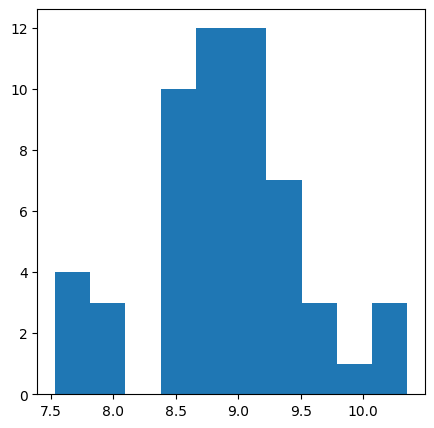

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5,5))
plt.hist(df_expr.iloc[0,:])

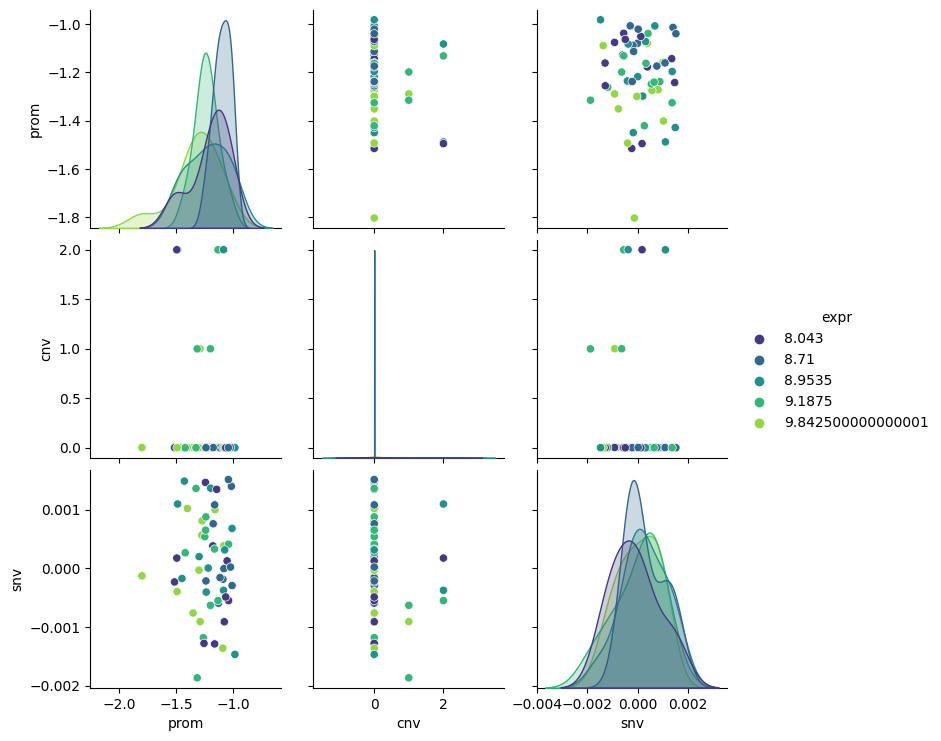

In [6]:
import seaborn as sns
gene_index = 0
subset = np.array([df_expr.values[gene_index,:],df_prom.values[gene_index,:],df_cnv.values[gene_index,:],df_snv.values[gene_index,:]]).T
subset = pd.DataFrame(subset)
subset.columns = ['expr','prom','cnv','snv']
subset['expr'] = pd.qcut(subset['expr'], 5, retbins=False)
subset['expr'] = subset['expr'].apply(lambda x: x.mid)

sns.pairplot(data=subset, hue='expr', palette="viridis")

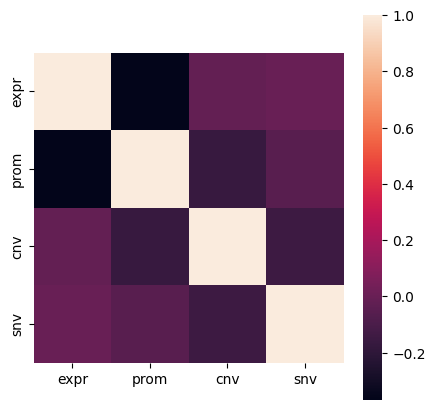

In [7]:
subset = np.array([df_expr.values[gene_index,:],df_prom.values[gene_index,:],df_cnv.values[gene_index,:],df_snv.values[gene_index,:]]).T
subset = pd.DataFrame(subset)
subset.columns = ['expr','prom','cnv','snv']
C_mat = subset.corr() 
fig = plt.figure(figsize = (5,5))

sns.heatmap(C_mat, square = True)
plt.show()

## Example 1st gene lm

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
aic= 103.71803649854054


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     2.850
Date:                Fri, 05 May 2023   Prob (F-statistic):             0.0464
Time:                        19:35:54   Log-Likelihood:                -47.859
No. Observations:                  55   AIC:                             103.7
Df Residuals:                      51   BIC:                             111.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1325      0.617     11.552      0.000       5.893       8.372
x1            -1.4835      0.508     -2.920      0.005      -2.503      -0.464
x2            -0.0992      0.150     -0.659      0.513      -0.401       0.203
x3           -27.7729     97.115     -0.286      0.776    -222.739     167.194
==============================================================================
Omnibus:                        3.004   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                2.546
Skew:                          -0.527   Prob(JB):                        0.280
Kurtosis:                       2.988   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

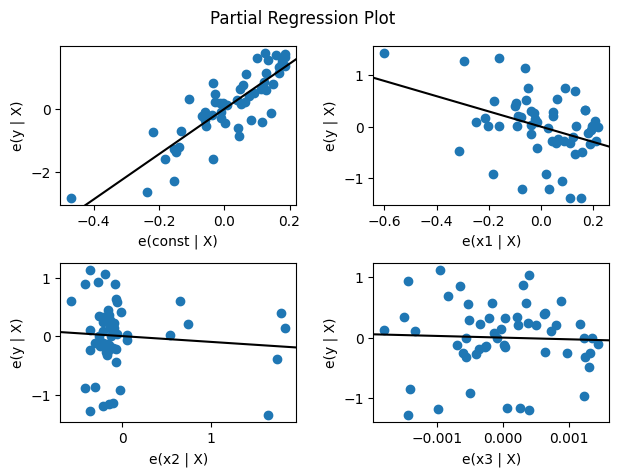

In [8]:
import statsmodels.api as sm
gene_idx=0
X = np.array([df_prom.values[gene_idx,:],df_cnv.values[gene_idx,:],df_snv.values[gene_idx,:]]).T
y = df_expr.values[gene_idx,:]

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
res = est.fit()
fig = sm.graphics.plot_partregress_grid(res)
fig.tight_layout(pad=1.0)
print("aic=",res.aic)
res.summary()

## Example 1st gene glm gauss log link

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
aic= 103.71438559536051


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   55
Model:                            GLM   Df Residuals:                       51
Model Family:                Gaussian   Df Model:                            3
Link Function:                    Log   Scale:                         0.35884
Method:                          IRLS   Log-Likelihood:                -47.857
Date:                Fri, 05 May 2023   Deviance:                       18.301
Time:                        19:36:00   Pearson chi2:                     18.3
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1466
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9874      0.068     29.383      0.000       1.855       2.120
x1            -0.1665      0.055     -3.016      0.003      -0.275      -0.058
x2            -0.0120      0.017     -0.711      0.477      -0.045       0.021
x3            -3.1729     10.879     -0.292      0.771     -24.496      18.150
==============================================================================
"""

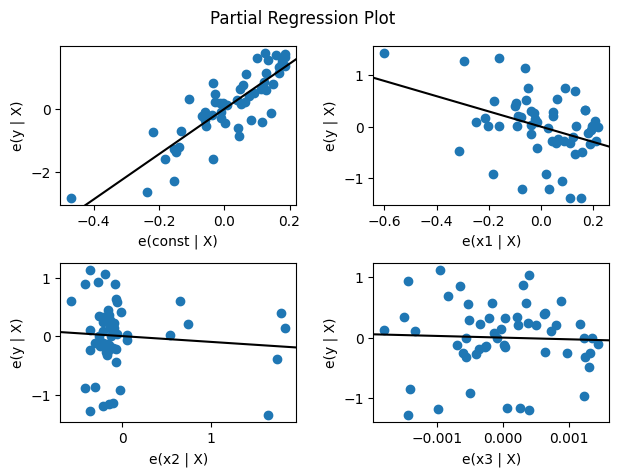

In [9]:
est = sm.GLM(y, X2, family=sm.families.Gaussian(sm.genmod.families.links.Log()))
res = est.fit()
fig = sm.graphics.plot_partregress_grid(res)
fig.tight_layout(pad=1.0)
print("aic=",res.aic)
res.summary()

## Example 1st gene glm gauss inverse power link

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
aic= 103.55153522240366


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   55
Model:                            GLM   Df Residuals:                       51
Model Family:                Gaussian   Df Model:                            3
Link Function:          inverse_power   Scale:                         0.35778
Method:                          IRLS   Log-Likelihood:                -47.776
Date:                Fri, 05 May 2023   Deviance:                       18.247
Time:                        19:36:04   Pearson chi2:                     18.2
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1493
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1346      0.007     18.263      0.000       0.120       0.149
x1             0.0187      0.006      3.127      0.002       0.007       0.030
x2             0.0014      0.002      0.759      0.448      -0.002       0.005
x3             0.3590      1.218      0.295      0.768      -2.028       2.746
==============================================================================
"""

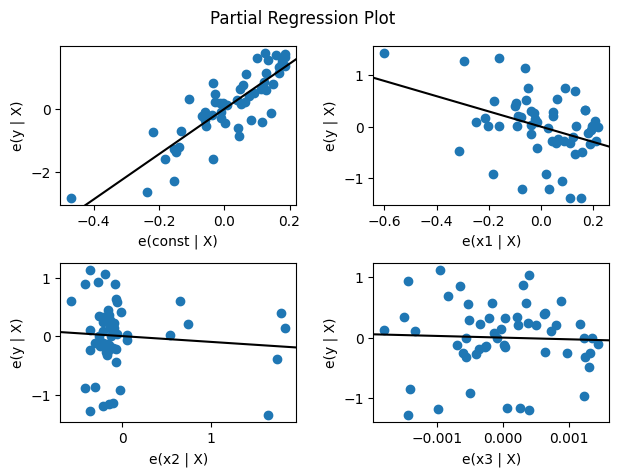

In [10]:
est = sm.GLM(y, X2, family=sm.families.Gaussian(sm.genmod.families.links.inverse_power()))
res = est.fit()
fig = sm.graphics.plot_partregress_grid(res)
fig.tight_layout(pad=1.0)
print("aic=",res.aic)
res.summary()

# Linear regression

## Main class

In [11]:
from itertools import *
import statsmodels.api as sm

class RegressionModel:
    
    def __init__(self, model_name):
        if model_name in ['ols','glm_log', 'glm_inv_pwr']:
            self.model_name = model_name
        else:
            raise Exception('Not a valid model name. model_name should be one of: ols, glm_log, glm_inv_pwr.')
        self.params = []
        self.pvalues = []
        self.scores = []
        self.significant_params = []
    
    def fit(self, df_expr, df_prom, df_cnv, df_snv):
        self.df_expr = df_expr
        self.df_prom = df_prom
        self.df_cnv = df_cnv
        self.df_snv = df_snv
        
        self.gene_count = df_expr.shape[0]
        self.gene_names = df_expr.axes[0].to_numpy()
        for i in range(self.gene_count):
            X = np.array([df_prom.values[i,:],df_cnv.values[i,:],df_snv.values[i,:]]).T
            y = df_expr.values[i,:]

            X2 = sm.add_constant(X)
            est = None
            match self.model_name:
                case 'ols':
                    est = sm.OLS(y, X2)
                case 'glm_log':
                    est = sm.GLM(y, X2, family=sm.families.Gaussian(sm.genmod.families.links.Log())) 
                case 'glm_inv_pwr':
                    est = sm.GLM(y, X2, family=sm.families.Gaussian(sm.genmod.families.links.inverse_power())) 
            
            res = est.fit()
            self.params.append(res.params[1:])
            self.pvalues.append(res.pvalues[1:])
            if self.model_name == 'ols':
                self.scores.append(res.rsquared)
            else:
                self.scores.append(res.pseudo_rsquared())

        self.params = np.array(self.params)
        self.pvalues = np.array(self.pvalues)
        self.scores = np.array(self.scores)
        self.significant_params = np.where(self.pvalues < 0.05, self.params, 0)
        self.__sign_params_mask = self.significant_params != 0
    
    def get_not_fitted_idxs(self, R_indexes=False):
        genes_no_fit = [all(self.__sign_params_mask[i]==[0,0,0]) for i in  range(self.gene_count)]
        genes_idx_no_fit = [i for i, x in enumerate(genes_no_fit) if x] 
        if R_indexes:
            return np.array(genes_idx_no_fit) + 1
        return genes_idx_no_fit

    def get_all_groups(self, drop_not_fitted=True):
        filters = self.__get_filters()
        gene_groups_all = {}
        for filter in filters:
            genes = self.__get_genes_by_mask(filter, self.gene_names)
            filter_name = ''.join(['+' if num==1 else '-' if num==-1 else '0' for num in filter])
            gene_groups_all[filter_name] = genes

        if drop_not_fitted:
            gene_groups_all.pop('000', None)
        return gene_groups_all
        
    def __get_filters(self):
        filters = []
        omics_predictors_count = 3 #prom,cnv,snv
        for i in product([0,-1,1], repeat=omics_predictors_count):
            filters.append(i)
        return np.array(filters)
    
    def __get_genes_by_mask(self, mask, gene_names_list):
        mask_bool=mask.astype(bool)
        group_idxs = []
        for i in  range(self.gene_count):
            if (all(self.__sign_params_mask[i]==mask_bool) and all(self.significant_params[i]*mask>=0)):
                group_idxs.append(i)
        return list(gene_names_list[group_idxs])
    
    def get_not_fitted_dataset(self):
        idxs = np.array(self.get_not_fitted_idxs())
        expr_no_fit = self.df_expr.iloc[idxs, :]
        prom_no_fit = self.df_prom.iloc[idxs, :]
        cnv_no_fit = self.df_cnv.iloc[idxs, :]
        snv_no_fit = self.df_snv.iloc[idxs, :]
        return (expr_no_fit, prom_no_fit, cnv_no_fit, snv_no_fit)


## Write files class

In [12]:
import json
class ResultsWriter:
    def write_not_fitted_idxs(self, not_fitted_idxs):
        #genes no fit indexes for later analysis
        with open(f'{df_name}/no_fit.csv', 'w') as file:
            file.write(','.join(map(str, not_fitted_idxs))) 
            
    def write_grouped_genes(self, gene_groups_all, suffix=''):
        #grouped genes
        with open(f'{df_name}/gene_groups{suffix}.txt', 'w') as convert_file:
            convert_file.write(json.dumps(gene_groups_all, indent=4))

## Merge dicts function

In [13]:
def merge_dicts(dol1, dol2):
    result = dict(dol1, **dol2)
    result.update((k, dol1[k] + dol2[k])
                    for k in set(dol1).intersection(dol2))
    return result

In [14]:
dict1={"1":[1,2,3],"2":[2,3]}
dict2={"3":[1,2,3],"2":[5]}
merge_dicts(dict1,dict2)

{'1': [1, 2, 3], '2': [2, 3, 5], '3': [1, 2, 3]}

## Fit LR & Calculate significant parameters

In [15]:
lm = RegressionModel('ols')
lm.fit(df_expr,df_prom,df_cnv,df_snv)
print(lm.params[:5])
print(lm.pvalues[:5])
print(lm.scores[:5])
print(lm.significant_params[:5])

[[-1.48349965e+00 -9.91714907e-02 -2.77729147e+01]
 [-4.66619598e-01  5.73401138e-02  5.50309247e+01]
 [-3.49958071e+00  1.33694418e+00  3.12488537e+00]
 [ 8.93484862e-02  3.09544859e-01 -1.19203743e+02]
 [-2.30134141e+00 -4.82538693e-01  2.93991419e+00]]
[[5.19438036e-03 5.12582266e-01 7.76052221e-01]
 [9.76882403e-02 5.68130846e-01 2.32950782e-01]
 [4.11773061e-02 1.94092676e-01 4.64252769e-01]
 [7.34272939e-01 3.45452755e-01 5.25670298e-01]
 [5.84457986e-04 2.43188891e-01 8.49899740e-02]]
[0.14355974 0.10358031 0.14805683 0.02623226 0.24599187]
[[-1.48349965  0.          0.        ]
 [ 0.          0.          0.        ]
 [-3.49958071  0.          0.        ]
 [ 0.          0.          0.        ]
 [-2.30134141  0.          0.        ]]


## Not fitted genes

In [16]:
len(lm.get_not_fitted_idxs())

1716

## Filter genes

In [17]:
rw = ResultsWriter()

lm_groups = lm.get_all_groups()
all_groups = merge_dicts(all_groups, lm_groups)
print(lm_groups)
rw.write_grouped_genes(lm_groups, suffix='_lm')

{'00-': ['CCDC24', 'PKN2', 'CLCC1', 'MOV10', 'ADAR', 'PEX19', 'ATP1B1', 'IAH1', 'ROCK2', 'ASXL2', 'SNRNP200', 'TTN', 'MEGF10', 'KIAA1191', 'BTN2A2', 'VNN3', 'MYB', 'OPRM1', 'SGCE', 'CREB3L2', 'DCTN3', 'VWA2', 'EXT2', 'FADD', 'PDE3A', 'RND1', 'ACVR1B', 'TRPV4', 'C14orf119', 'MAP3K9', 'EIF2AK4', 'SHC4', 'ARNT2', 'COG7', 'RPGRIP1L', 'C16orf70', 'YWHAE', 'GGNBP2', 'KLHL11', 'SHKBP1', 'ZNF574', 'KIR3DX1', 'GPRASP1', 'ALG13', 'BCORL1', 'GPC4'], '00+': ['MASP2', 'CTSK', 'GNPAT', 'STAT4', 'HTR2B', 'MYD88', 'ROBO2', 'NIT2', 'SLC12A8', 'PPARGC1A', 'CENPE', 'ANKRD50', 'GRM1', 'NOBOX', 'GALNTL5', 'GOT1L1', 'CSMD3', 'IPO7', 'CTR9', 'OVOL1', 'PIWIL4', 'NRXN3', 'CHST6', 'CD68', 'CASKIN2', 'MIB1', 'ZNF24', 'TCF4', 'ZNF556', 'CALR', 'ZNF776', 'DONSON', 'ITSN1', 'PRDX4'], '0-0': ['ANKRD34A', 'SLC38A11', 'HDAC4', 'DGKG', 'GRM8', 'DOK2', 'DIXDC1', 'RXFP2', 'PLA2G4F', 'MYH4', 'SIRPB2', 'KCNG1'], '0--': [], '0-+': [], '0+0': ['NOL9', 'HSPG2', 'NIPAL3', 'SPOCD1', 'MACF1', 'AKR1A1', 'ZRANB2', 'ABCD3', 'SLC44A

# Non linear regression

## Prepare not fitted genes dataset

In [18]:
expr_nlr, prom_nlr, cnv_nlr, snv_nlr = lm.get_not_fitted_dataset()
expr_nlr

,TCGA-AB-2910-03A,TCGA-AB-2871-03A,TCGA-AB-2893-03A,TCGA-AB-2873-03A,TCGA-AB-2936-03A,TCGA-AB-2915-03A,TCGA-AB-2901-03A,TCGA-AB-2885-03A,TCGA-AB-2927-03A,TCGA-AB-2935-03A,TCGA-AB-2919-03A,TCGA-AB-2942-03A,TCGA-AB-2912-03A,TCGA-AB-2934-03A,TCGA-AB-2883-03A,TCGA-AB-2956-03A,TCGA-AB-2939-03A,TCGA-AB-2874-03A,TCGA-AB-2959-03A,TCGA-AB-2937-03A,TCGA-AB-2916-03A,TCGA-AB-2917-03A,TCGA-AB-2872-03A,TCGA-AB-2911-03A,TCGA-AB-2884-03A,...,TCGA-AB-2882-03A,TCGA-AB-2914-03A,TCGA-AB-2890-03A,TCGA-AB-2908-03A,TCGA-AB-2869-03A,TCGA-AB-2924-03A,TCGA-AB-2878-03A,TCGA-AB-2940-03A,TCGA-AB-2938-03A,TCGA-AB-2941-03A,TCGA-AB-2929-03A,TCGA-AB-2921-03A,TCGA-AB-2925-03A,TCGA-AB-2886-03A,TCGA-AB-2880-03A,TCGA-AB-2913-03A,TCGA-AB-2943-03A,TCGA-AB-2881-03A,TCGA-AB-2950-03A,TCGA-AB-2897-03A,TCGA-AB-2895-03A,TCGA-AB-2933-03A,TCGA-AB-2944-03A,TCGA-AB-2877-03A,TCGA-AB-2875-03A
GNB1,14.142107,12.998943,14.354043,13.493480,13.498351,14.074141,13.568312,13.577547,13.432933,13.299351,13.367688,13.657542,13.410716,13.579787,12.238106,13.833977,14.051719,13.498101,13.096386,14.039862,13.271901,13.320801,13.015067,13.069618,13.714568,...,13.876421,13.333295,13.303067,13.612293,13.207319,13.902564,13.907360,13.362766,13.622509,13.872290,13.650266,14.209758,13.659327,13.768391,13.700440,12.773139,13.907736,13.782486,13.760408,12.970106,13.010178,13.373001,13.451340,13.292034,13.989927
RNF207,5.727920,7.357552,7.426265,5.643856,5.754888,6.357552,6.942515,5.523562,6.614710,9.430453,5.954196,4.321928,6.044394,5.392317,7.118941,9.377211,3.584963,6.044394,4.906891,5.727920,5.554589,4.523562,5.321928,7.118941,8.209453,...,8.219169,4.807355,6.247928,6.000000,6.700440,6.857981,6.658211,5.700440,6.714246,9.368506,6.988685,6.149747,6.392317,4.087463,5.832890,4.906891,6.807355,5.554589,5.584963,5.169925,5.672425,3.807355,6.754888,7.087463,5.857981
TAS1R1,5.169925,3.700440,4.392317,5.129283,3.000000,5.491853,3.700440,4.459432,5.285402,4.584963,4.000000,2.807355,3.321928,3.000000,5.209453,3.459432,3.000000,4.523562,3.000000,3.169925,4.087463,3.807355,5.930737,3.459432,5.044394,...,4.857981,4.000000,4.000000,4.523562,4.584963,5.044394,4.392317,3.169925,4.523562,3.906891,3.459432,4.247928,5.491853,3.459432,3.700440,4.247928,4.392317,4.247928,3.459432,7.076816,4.754888,2.000000,3.000000,5.129283,2.321928
DNAJC11,10.740624,10.406205,10.215533,9.935165,10.452241,10.241983,10.267957,10.316282,10.025140,10.246741,10.652845,10.053926,10.091435,10.388017,9.398744,10.579316,9.432542,10.072803,9.861087,10.454299,9.567956,10.167418,10.202124,9.914385,10.435670,...,10.678600,10.166163,10.027906,10.401946,10.483816,10.463524,11.082149,10.615630,10.927778,11.237807,10.337622,10.651949,10.682995,10.726218,10.484823,10.163650,10.802516,10.302639,10.429407,9.874981,10.167418,9.703904,10.176173,10.388017,10.684749
CAMTA1,10.232421,8.625709,10.178665,8.467606,8.774787,8.717676,8.727920,8.467606,9.271463,9.216746,9.113742,9.162391,9.049849,8.829723,8.906891,9.483816,8.388017,8.383704,9.550747,9.252665,8.625709,10.502832,8.625709,9.142107,8.873444,...,8.611025,8.823367,8.829723,9.174926,8.774787,8.864186,10.100662,8.686501,9.339850,9.463524,8.721099,9.440869,9.390169,8.888743,8.665336,8.507795,9.027906,9.108524,9.142107,8.503826,8.661778,9.567956,8.882643,9.044394,8.807355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCFC1,14.193679,13.520496,14.060274,13.188589,13.313875,13.326289,13.572582,13.820777,12.944529,13.159714,13.995326,13.086468,12.970645,12.606405,11.838416,13.406338,13.772418,13.629812,12.715319,13.650154,12.476240,12.696968,13.069953,12.498351,13.619074,...,13.730470,12.701523,13.390303,13.179754,13.690325,13.355213,13.032218,13.772108,13.610679,13.430975,13.784533,13.400613,14.029201,13.826151,13.879009,12.799686,12.903694,13.291315,13.465184,13.076148,13.219622,13.059851,13.225659,13.420881,13.934059
FLNA,17.962529,16.106706,16

## Generalized linear model gauss log link

In [19]:
glm_log = RegressionModel('glm_log')
glm_log.fit(expr_nlr, prom_nlr, cnv_nlr, snv_nlr)
# print(glm_log.params[:5])
# print(glm_log.pvalues[:5])
# print(glm_log.scores[:5])
# print(glm_log.significant_params[:5])

glm_log_groups = glm_log.get_all_groups()
all_groups = merge_dicts(all_groups, glm_log_groups)
print(glm_log_groups)
rw.write_grouped_genes(glm_log_groups, suffix='_glm_log')

{'00-': ['RPTN', 'SCN1A', 'MRPS2', 'GRID1', 'APOA5', 'ATP2A2', 'TSSK4', 'KRT37'], '00+': ['HPCA', 'TTC4', 'B4GALT3', 'PRELP', 'PROS1', 'RHO', 'CHRD', 'SORBS2', 'CSMD1', 'DLC1', 'SLCO5A1', 'SMG1', 'MYH1', 'MZF1'], '0-0': ['NEU2'], '0--': [], '0-+': [], '0+0': ['ZNF436', 'KCND3', 'SH2D2A', 'PLEKHA6', 'KCNH1', 'XIRP2', 'TRPM8', 'SETD5', 'CAMP', 'SHROOM3', 'OPN5', 'GSTA4', 'FOXP2', 'FBP2', 'KIAA1217', 'ADAM12', 'MRGPRX3', 'APLNR', 'RBM4B', 'FAT3', 'ARHGAP20', 'PPP2R1B', 'NCAM1', 'KRT74', 'KRT79', 'BTBD11', 'ABCB9', 'ZMYM5', 'LINGO1', 'SEC14L5', 'RHBDL3', 'TNS4', 'CACNG4', 'QRICH2', 'ZNF236', 'NRTN', 'C3P1', 'WIZ', 'GAPDHS', 'PLEKHA4', 'ZNF160', 'PCSK2', 'ZNF335', 'BMP7', 'APP', 'CRYZL1', 'PDE9A', 'TNRC6B', 'MEI1', 'TCEANC', 'PIM2', 'TRO'], '0+-': ['SLIT3', 'HEY1', 'RGL3'], '0++': ['PLA2G2A', 'KCNA4'], '-00': ['RNASEL', 'ADD2', 'PLXNB1', 'CD47', 'AHSG', 'POU4F2', 'IPCEF1', 'GFRA2', 'PAPSS2', 'HABP2', 'ATRNL1', 'MRPL11', 'FOLR2', 'SIDT2', 'ANKRD33', 'SYT1', 'CAMKK2', 'LMO7', 'GABRG3', 'KRT34

## Not fitted

In [20]:
expr_nlr, prom_nlr, cnv_nlr, snv_nlr = glm_log.get_not_fitted_dataset()
expr_nlr

,TCGA-AB-2910-03A,TCGA-AB-2871-03A,TCGA-AB-2893-03A,TCGA-AB-2873-03A,TCGA-AB-2936-03A,TCGA-AB-2915-03A,TCGA-AB-2901-03A,TCGA-AB-2885-03A,TCGA-AB-2927-03A,TCGA-AB-2935-03A,TCGA-AB-2919-03A,TCGA-AB-2942-03A,TCGA-AB-2912-03A,TCGA-AB-2934-03A,TCGA-AB-2883-03A,TCGA-AB-2956-03A,TCGA-AB-2939-03A,TCGA-AB-2874-03A,TCGA-AB-2959-03A,TCGA-AB-2937-03A,TCGA-AB-2916-03A,TCGA-AB-2917-03A,TCGA-AB-2872-03A,TCGA-AB-2911-03A,TCGA-AB-2884-03A,...,TCGA-AB-2882-03A,TCGA-AB-2914-03A,TCGA-AB-2890-03A,TCGA-AB-2908-03A,TCGA-AB-2869-03A,TCGA-AB-2924-03A,TCGA-AB-2878-03A,TCGA-AB-2940-03A,TCGA-AB-2938-03A,TCGA-AB-2941-03A,TCGA-AB-2929-03A,TCGA-AB-2921-03A,TCGA-AB-2925-03A,TCGA-AB-2886-03A,TCGA-AB-2880-03A,TCGA-AB-2913-03A,TCGA-AB-2943-03A,TCGA-AB-2881-03A,TCGA-AB-2950-03A,TCGA-AB-2897-03A,TCGA-AB-2895-03A,TCGA-AB-2933-03A,TCGA-AB-2944-03A,TCGA-AB-2877-03A,TCGA-AB-2875-03A
GNB1,14.142107,12.998943,14.354043,13.493480,13.498351,14.074141,13.568312,13.577547,13.432933,13.299351,13.367688,13.657542,13.410716,13.579787,12.238106,13.833977,14.051719,13.498101,13.096386,14.039862,13.271901,13.320801,13.015067,13.069618,13.714568,...,13.876421,13.333295,13.303067,13.612293,13.207319,13.902564,13.907360,13.362766,13.622509,13.872290,13.650266,14.209758,13.659327,13.768391,13.700440,12.773139,13.907736,13.782486,13.760408,12.970106,13.010178,13.373001,13.451340,13.292034,13.989927
RNF207,5.727920,7.357552,7.426265,5.643856,5.754888,6.357552,6.942515,5.523562,6.614710,9.430453,5.954196,4.321928,6.044394,5.392317,7.118941,9.377211,3.584963,6.044394,4.906891,5.727920,5.554589,4.523562,5.321928,7.118941,8.209453,...,8.219169,4.807355,6.247928,6.000000,6.700440,6.857981,6.658211,5.700440,6.714246,9.368506,6.988685,6.149747,6.392317,4.087463,5.832890,4.906891,6.807355,5.554589,5.584963,5.169925,5.672425,3.807355,6.754888,7.087463,5.857981
TAS1R1,5.169925,3.700440,4.392317,5.129283,3.000000,5.491853,3.700440,4.459432,5.285402,4.584963,4.000000,2.807355,3.321928,3.000000,5.209453,3.459432,3.000000,4.523562,3.000000,3.169925,4.087463,3.807355,5.930737,3.459432,5.044394,...,4.857981,4.000000,4.000000,4.523562,4.584963,5.044394,4.392317,3.169925,4.523562,3.906891,3.459432,4.247928,5.491853,3.459432,3.700440,4.247928,4.392317,4.247928,3.459432,7.076816,4.754888,2.000000,3.000000,5.129283,2.321928
DNAJC11,10.740624,10.406205,10.215533,9.935165,10.452241,10.241983,10.267957,10.316282,10.025140,10.246741,10.652845,10.053926,10.091435,10.388017,9.398744,10.579316,9.432542,10.072803,9.861087,10.454299,9.567956,10.167418,10.202124,9.914385,10.435670,...,10.678600,10.166163,10.027906,10.401946,10.483816,10.463524,11.082149,10.615630,10.927778,11.237807,10.337622,10.651949,10.682995,10.726218,10.484823,10.163650,10.802516,10.302639,10.429407,9.874981,10.167418,9.703904,10.176173,10.388017,10.684749
CAMTA1,10.232421,8.625709,10.178665,8.467606,8.774787,8.717676,8.727920,8.467606,9.271463,9.216746,9.113742,9.162391,9.049849,8.829723,8.906891,9.483816,8.388017,8.383704,9.550747,9.252665,8.625709,10.502832,8.625709,9.142107,8.873444,...,8.611025,8.823367,8.829723,9.174926,8.774787,8.864186,10.100662,8.686501,9.339850,9.463524,8.721099,9.440869,9.390169,8.888743,8.665336,8.507795,9.027906,9.108524,9.142107,8.503826,8.661778,9.567956,8.882643,9.044394,8.807355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCFC1,14.193679,13.520496,14.060274,13.188589,13.313875,13.326289,13.572582,13.820777,12.944529,13.159714,13.995326,13.086468,12.970645,12.606405,11.838416,13.406338,13.772418,13.629812,12.715319,13.650154,12.476240,12.696968,13.069953,12.498351,13.619074,...,13.730470,12.701523,13.390303,13.179754,13.690325,13.355213,13.032218,13.772108,13.610679,13.430975,13.784533,13.400613,14.029201,13.826151,13.879009,12.799686,12.903694,13.291315,13.465184,13.076148,13.219622,13.059851,13.225659,13.420881,13.934059
FLNA,17.962529,16.106706,16

## Generalized linear model gauss inverse_power link

In [21]:
glm_inv_pwr = RegressionModel('glm_inv_pwr')
glm_inv_pwr.fit(expr_nlr, prom_nlr, cnv_nlr, snv_nlr)
# print(glm_inv_pwr.params[:5])
# print(glm_inv_pwr.pvalues[:5])
# print(glm_inv_pwr.scores[:5])
# print(glm_inv_pwr.significant_params[:5])

glm_inv_pwr_groups = glm_inv_pwr.get_all_groups()
all_groups = merge_dicts(all_groups, glm_inv_pwr_groups)
print(glm_inv_pwr_groups)
rw.write_grouped_genes(glm_inv_pwr_groups, suffix='_glm_inv_pwr')

{'00-': ['GPR78', 'PCDHGA2', 'NIPAL4', 'GLIS3', 'ADAMTSL1', 'NRAP', 'TGM7', 'CSHL1', 'TEX19'], '00+': ['MUC13', 'VCAN', 'EDIL3', 'PCDHA2', 'DMRT2', 'PAH', 'DUOXA2', 'PRM2'], '0-0': ['FBXO6', 'FLG', 'FMO3', 'TMEM163', 'COL3A1', 'MYO1B', 'DCLK3', 'MYL3', 'PTH1R', 'NLGN1', 'SPARCL1', 'NOTCH4', 'ZBTB22', 'COL21A1', 'LPAL2', 'CLIP2', 'SVEP1', 'ITIH5', 'TCERG1L', 'CUL5', 'GRIK4', 'CACNA1C', 'ACADS', 'TEP1', 'SV2B', 'FKBP10', 'MEIS3', 'BRSK1', 'ZNF835', 'ISX'], '0--': ['DCHS2', 'FBN1'], '0-+': [], '0+0': ['BMPER', 'ASB10', 'MYH2'], '0+-': [], '0++': [], '-00': ['NMUR2', 'DCDC2', 'PAMR1', 'MTUS2', 'KRT33A'], '-0-': ['ACTL8', 'CTNNA2', 'ESM1'], '-0+': ['RUNX1T1'], '--0': ['C2orf80'], '---': ['LILRB5'], '--+': [], '-+0': [], '-+-': ['PDE11A'], '-++': [], '+00': ['C2orf78', 'ECEL1', 'CAMK1', 'CFTR', 'CLCN1', 'SLC24A2', 'ARMC4', 'ANKRD30A', 'ANO3', 'SDSL', 'TMCO3', 'HCN4', 'ABCC12', 'GGA3', 'ST6GALNAC1', 'MYOM1', 'AURKC', 'MAGEB16'], '+0-': ['NOX4'], '+0+': ['GALNT13', 'ERBB4', 'LRIT2', 'CYP26A1']

## Not fitted

In [22]:
expr_nlr, prom_nlr, cnv_nlr, snv_nlr = glm_inv_pwr.get_not_fitted_dataset()
expr_nlr

,TCGA-AB-2910-03A,TCGA-AB-2871-03A,TCGA-AB-2893-03A,TCGA-AB-2873-03A,TCGA-AB-2936-03A,TCGA-AB-2915-03A,TCGA-AB-2901-03A,TCGA-AB-2885-03A,TCGA-AB-2927-03A,TCGA-AB-2935-03A,TCGA-AB-2919-03A,TCGA-AB-2942-03A,TCGA-AB-2912-03A,TCGA-AB-2934-03A,TCGA-AB-2883-03A,TCGA-AB-2956-03A,TCGA-AB-2939-03A,TCGA-AB-2874-03A,TCGA-AB-2959-03A,TCGA-AB-2937-03A,TCGA-AB-2916-03A,TCGA-AB-2917-03A,TCGA-AB-2872-03A,TCGA-AB-2911-03A,TCGA-AB-2884-03A,...,TCGA-AB-2882-03A,TCGA-AB-2914-03A,TCGA-AB-2890-03A,TCGA-AB-2908-03A,TCGA-AB-2869-03A,TCGA-AB-2924-03A,TCGA-AB-2878-03A,TCGA-AB-2940-03A,TCGA-AB-2938-03A,TCGA-AB-2941-03A,TCGA-AB-2929-03A,TCGA-AB-2921-03A,TCGA-AB-2925-03A,TCGA-AB-2886-03A,TCGA-AB-2880-03A,TCGA-AB-2913-03A,TCGA-AB-2943-03A,TCGA-AB-2881-03A,TCGA-AB-2950-03A,TCGA-AB-2897-03A,TCGA-AB-2895-03A,TCGA-AB-2933-03A,TCGA-AB-2944-03A,TCGA-AB-2877-03A,TCGA-AB-2875-03A
GNB1,14.142107,12.998943,14.354043,13.493480,13.498351,14.074141,13.568312,13.577547,13.432933,13.299351,13.367688,13.657542,13.410716,13.579787,12.238106,13.833977,14.051719,13.498101,13.096386,14.039862,13.271901,13.320801,13.015067,13.069618,13.714568,...,13.876421,13.333295,13.303067,13.612293,13.207319,13.902564,13.907360,13.362766,13.622509,13.872290,13.650266,14.209758,13.659327,13.768391,13.700440,12.773139,13.907736,13.782486,13.760408,12.970106,13.010178,13.373001,13.451340,13.292034,13.989927
RNF207,5.727920,7.357552,7.426265,5.643856,5.754888,6.357552,6.942515,5.523562,6.614710,9.430453,5.954196,4.321928,6.044394,5.392317,7.118941,9.377211,3.584963,6.044394,4.906891,5.727920,5.554589,4.523562,5.321928,7.118941,8.209453,...,8.219169,4.807355,6.247928,6.000000,6.700440,6.857981,6.658211,5.700440,6.714246,9.368506,6.988685,6.149747,6.392317,4.087463,5.832890,4.906891,6.807355,5.554589,5.584963,5.169925,5.672425,3.807355,6.754888,7.087463,5.857981
TAS1R1,5.169925,3.700440,4.392317,5.129283,3.000000,5.491853,3.700440,4.459432,5.285402,4.584963,4.000000,2.807355,3.321928,3.000000,5.209453,3.459432,3.000000,4.523562,3.000000,3.169925,4.087463,3.807355,5.930737,3.459432,5.044394,...,4.857981,4.000000,4.000000,4.523562,4.584963,5.044394,4.392317,3.169925,4.523562,3.906891,3.459432,4.247928,5.491853,3.459432,3.700440,4.247928,4.392317,4.247928,3.459432,7.076816,4.754888,2.000000,3.000000,5.129283,2.321928
DNAJC11,10.740624,10.406205,10.215533,9.935165,10.452241,10.241983,10.267957,10.316282,10.025140,10.246741,10.652845,10.053926,10.091435,10.388017,9.398744,10.579316,9.432542,10.072803,9.861087,10.454299,9.567956,10.167418,10.202124,9.914385,10.435670,...,10.678600,10.166163,10.027906,10.401946,10.483816,10.463524,11.082149,10.615630,10.927778,11.237807,10.337622,10.651949,10.682995,10.726218,10.484823,10.163650,10.802516,10.302639,10.429407,9.874981,10.167418,9.703904,10.176173,10.388017,10.684749
CAMTA1,10.232421,8.625709,10.178665,8.467606,8.774787,8.717676,8.727920,8.467606,9.271463,9.216746,9.113742,9.162391,9.049849,8.829723,8.906891,9.483816,8.388017,8.383704,9.550747,9.252665,8.625709,10.502832,8.625709,9.142107,8.873444,...,8.611025,8.823367,8.829723,9.174926,8.774787,8.864186,10.100662,8.686501,9.339850,9.463524,8.721099,9.440869,9.390169,8.888743,8.665336,8.507795,9.027906,9.108524,9.142107,8.503826,8.661778,9.567956,8.882643,9.044394,8.807355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCFC1,14.193679,13.520496,14.060274,13.188589,13.313875,13.326289,13.572582,13.820777,12.944529,13.159714,13.995326,13.086468,12.970645,12.606405,11.838416,13.406338,13.772418,13.629812,12.715319,13.650154,12.476240,12.696968,13.069953,12.498351,13.619074,...,13.730470,12.701523,13.390303,13.179754,13.690325,13.355213,13.032218,13.772108,13.610679,13.430975,13.784533,13.400613,14.029201,13.826151,13.879009,12.799686,12.903694,13.291315,13.465184,13.076148,13.219622,13.059851,13.225659,13.420881,13.934059
FLNA,17.962529,16.106706,16

In [23]:
# write all groups
rw.write_grouped_genes(all_groups)

# write gene names for R arules
rw.write_not_fitted_idxs(expr_nlr.axes[0].to_numpy())

In [24]:
# Get lengths of all lists in dictionary
lengths = [len(lst) for lst in all_groups.values()]
print('total sum of grouped genes = ', sum(lengths)) #todo

total sum of grouped genes =  1082


# Arules

## Run Rscript

In [ ]:
# !pip install rpy2

In [26]:
%reload_ext rpy2.ipython

C:\Users\Arr\anaconda3\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [27]:
%Rpush df_name

In [28]:
%%R
# df_name
system(paste("Rscript arules_script.R", df_name), intern=TRUE)

 [1] "$`+0+`"                                                                                  
 [2] " [1] \"DNAJC11\" \"WNT10A\"  \"BSN\"     \"TRIO\"    \"AGGF1\"   \"CMYA5\"   \"TTC26\"  "
 [3] " [8] \"DOCK8\"   \"UHRF2\"   \"RPP38\"   \"OPALIN\"  \"ZNF195\"  \"KDM5A\"   \"HEATR4\" "
 [4] "[15] \"ABCC11\"  \"MYO18A\"  \"SCN1B\"   \"CCDC97\"  \"ZNF350\"  \"PCDH19\" "            
 [5] ""                                                                                        
 [6] "$`0-0`"                                                                                  
 [7] "[1] \"PGD\"     \"SLAMF9\"  \"HSD11B1\" \"HAT1\"    \"ADAM22\"  \"CCNA1\"  "             
 [8] ""                                                                                        
 [9] "$`+0-`"                                                                                  
[10] " [1] \"CASZ1\"     \"RPL5\"      \"KCNA2\"     \"KCNN3\"     \"SPTBN1\"    \"LTF\"      "
[11] " [7] \"SLC15A2\"   \"ZNF148\"    \

## Merge dicts after arules

In [29]:
import json

all_groups = {}
groups_arules = {}

with open(f'{df_name}/gene_groups.txt', 'r') as file:
    all_groups = json.load(file)
with open(f'{df_name}/gene_groups_arules.txt', 'r') as file:
    groups_arules = json.load(file)

all_groups = merge_dicts(all_groups, groups_arules)
# print(all_groups)

In [30]:
# Get lengths of all lists in dictionary
lengths = [len(lst) for lst in all_groups.values()]
print('total sum of grouped genes = ', sum(lengths)) #todo

total sum of grouped genes =  1271


# Correlation

## Read not fitted genes after arules and subset

In [31]:
import csv
gene_idxs = []
with open(f'{df_name}/no_fit_arules.csv', newline='') as f:
    reader = csv.reader(f)
    gene_idxs = [item for sublist in reader for item in sublist]

cor_expr_df = df_expr.loc[df_expr.index.isin(gene_idxs)]
cor_prom_df = df_prom.loc[df_prom.index.isin(gene_idxs)]
cor_cnv_df = df_cnv.loc[df_cnv.index.isin(gene_idxs)]
cor_snv_df = df_snv.loc[df_snv.index.isin(gene_idxs)]

In [32]:
cor_expr_df

,TCGA-AB-2910-03A,TCGA-AB-2871-03A,TCGA-AB-2893-03A,TCGA-AB-2873-03A,TCGA-AB-2936-03A,TCGA-AB-2915-03A,TCGA-AB-2901-03A,TCGA-AB-2885-03A,TCGA-AB-2927-03A,TCGA-AB-2935-03A,TCGA-AB-2919-03A,TCGA-AB-2942-03A,TCGA-AB-2912-03A,TCGA-AB-2934-03A,TCGA-AB-2883-03A,TCGA-AB-2956-03A,TCGA-AB-2939-03A,TCGA-AB-2874-03A,TCGA-AB-2959-03A,TCGA-AB-2937-03A,TCGA-AB-2916-03A,TCGA-AB-2917-03A,TCGA-AB-2872-03A,TCGA-AB-2911-03A,TCGA-AB-2884-03A,...,TCGA-AB-2882-03A,TCGA-AB-2914-03A,TCGA-AB-2890-03A,TCGA-AB-2908-03A,TCGA-AB-2869-03A,TCGA-AB-2924-03A,TCGA-AB-2878-03A,TCGA-AB-2940-03A,TCGA-AB-2938-03A,TCGA-AB-2941-03A,TCGA-AB-2929-03A,TCGA-AB-2921-03A,TCGA-AB-2925-03A,TCGA-AB-2886-03A,TCGA-AB-2880-03A,TCGA-AB-2913-03A,TCGA-AB-2943-03A,TCGA-AB-2881-03A,TCGA-AB-2950-03A,TCGA-AB-2897-03A,TCGA-AB-2895-03A,TCGA-AB-2933-03A,TCGA-AB-2944-03A,TCGA-AB-2877-03A,TCGA-AB-2875-03A
GNB1,14.142107,12.998943,14.354043,13.493480,13.498351,14.074141,13.568312,13.577547,13.432933,13.299351,13.367688,13.657542,13.410716,13.579787,12.238106,13.833977,14.051719,13.498101,13.096386,14.039862,13.271901,13.320801,13.015067,13.069618,13.714568,...,13.876421,13.333295,13.303067,13.612293,13.207319,13.902564,13.907360,13.362766,13.622509,13.872290,13.650266,14.209758,13.659327,13.768391,13.700440,12.773139,13.907736,13.782486,13.760408,12.970106,13.010178,13.373001,13.451340,13.292034,13.989927
RNF207,5.727920,7.357552,7.426265,5.643856,5.754888,6.357552,6.942515,5.523562,6.614710,9.430453,5.954196,4.321928,6.044394,5.392317,7.118941,9.377211,3.584963,6.044394,4.906891,5.727920,5.554589,4.523562,5.321928,7.118941,8.209453,...,8.219169,4.807355,6.247928,6.000000,6.700440,6.857981,6.658211,5.700440,6.714246,9.368506,6.988685,6.149747,6.392317,4.087463,5.832890,4.906891,6.807355,5.554589,5.584963,5.169925,5.672425,3.807355,6.754888,7.087463,5.857981
TAS1R1,5.169925,3.700440,4.392317,5.129283,3.000000,5.491853,3.700440,4.459432,5.285402,4.584963,4.000000,2.807355,3.321928,3.000000,5.209453,3.459432,3.000000,4.523562,3.000000,3.169925,4.087463,3.807355,5.930737,3.459432,5.044394,...,4.857981,4.000000,4.000000,4.523562,4.584963,5.044394,4.392317,3.169925,4.523562,3.906891,3.459432,4.247928,5.491853,3.459432,3.700440,4.247928,4.392317,4.247928,3.459432,7.076816,4.754888,2.000000,3.000000,5.129283,2.321928
CAMTA1,10.232421,8.625709,10.178665,8.467606,8.774787,8.717676,8.727920,8.467606,9.271463,9.216746,9.113742,9.162391,9.049849,8.829723,8.906891,9.483816,8.388017,8.383704,9.550747,9.252665,8.625709,10.502832,8.625709,9.142107,8.873444,...,8.611025,8.823367,8.829723,9.174926,8.774787,8.864186,10.100662,8.686501,9.339850,9.463524,8.721099,9.440869,9.390169,8.888743,8.665336,8.507795,9.027906,9.108524,9.142107,8.503826,8.661778,9.567956,8.882643,9.044394,8.807355
CA6,4.700440,5.491853,2.807355,5.044394,5.882643,4.000000,3.169925,2.807355,4.906891,4.169925,3.700440,3.321928,3.459432,4.169925,2.321928,2.807355,1.000000,3.000000,4.087463,3.459432,6.392317,4.392317,4.321928,5.523562,5.426265,...,6.022368,2.584963,4.392317,3.321928,5.554589,5.247928,3.700440,4.087463,3.906891,5.584963,3.000000,5.044394,2.000000,5.906891,2.807355,5.247928,7.569856,4.906891,4.000000,3.906891,3.169925,3.000000,2.584963,4.087463,5.044394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ARHGAP4,14.636058,13.239151,13.261213,12.893681,13.362903,13.211584,12.173989,13.046783,13.756661,13.070624,13.566886,13.100334,11.828930,13.974504,12.083147,13.088623,13.981300,12.615170,12.377211,12.625481,12.023754,11.512740,10.421013,12.441907,13.201971,...,13.446437,12.103943,13.063395,13.565816,12.860893,13.578137,11.163650,12.668220,11.605480,12.498849,13.392720,13.786065,13.785759,13.797054,13.257241,12.281351,12.817184,13.249854,12.649930,9.868823,13.182705,12.024793,13.206709,13.162234,13.501588
HCFC1,14.193679,13.520496,14.060274,13.188589,13.313875,13.326289,13.572

## Pearson correlation

In [33]:
from scipy import stats
from collections import defaultdict

def filter_statistic(result):
    if result.pvalue < 0.05:
        if result.statistic > 0:
            return '+'
        else:
            return '-'
    return '0'

gene_count = cor_expr_df.shape[0]
gene_names = cor_expr_df.axes[0].to_numpy()
k=0
cor_groups = defaultdict(list)
for gene_idx in range(gene_count):
    expr = cor_expr_df.values[gene_idx,:]
    prom = cor_prom_df.values[gene_idx,:]
    cnv = cor_cnv_df.values[gene_idx,:]
    snv = cor_snv_df.values[gene_idx,:]
    p = filter_statistic(stats.pearsonr(prom, expr))
    c = filter_statistic(stats.pearsonr(cnv, expr))
    s = filter_statistic(stats.pearsonr(snv, expr))
    key = ''.join([p,c,s])
    cor_groups[key].append(gene_names[gene_idx])
    
not_fitted_idxs = cor_groups.pop('000', None)
print('no fit genes count = ', len(not_fitted_idxs))
cor_groups = dict(cor_groups)

rw.write_grouped_genes(cor_groups, suffix='_pearson_cor')
cor_groups

no fit genes count =  1278


{'-00': ['TCEA3',
  'ADCY3',
  'TNFAIP6',
  'IRF1',
  'PRELID2',
  'BTN1A1',
  'GIMAP8',
  'NLRP6',
  'ATM',
  'ALDH1L2',
  'NDRG2',
  'TCL1A',
  'MRC2',
  'CCDC47',
  'CYP4F11',
  'OPA3',
  'SIRPG',
  'THOC2'],
 '-+0': ['PIK3C2B'],
 '0+0': ['MKRN2', 'PLCE1', 'FBXL19', 'EDC4', 'LPIN2', 'ZNF274'],
 '00+': ['KIT', 'RFC3', 'PRPS2'],
 '+00': ['LMBR1L', 'CCNB3'],
 '00-': ['RAB15']}

## Merge dicts

In [34]:
all_groups = merge_dicts(all_groups, cor_groups)
print(all_groups)

# write all groups
rw.write_grouped_genes(all_groups)

{'00-': ['CCDC24', 'PKN2', 'CLCC1', 'MOV10', 'ADAR', 'PEX19', 'ATP1B1', 'IAH1', 'ROCK2', 'ASXL2', 'SNRNP200', 'TTN', 'MEGF10', 'KIAA1191', 'BTN2A2', 'VNN3', 'MYB', 'OPRM1', 'SGCE', 'CREB3L2', 'DCTN3', 'VWA2', 'EXT2', 'FADD', 'PDE3A', 'RND1', 'ACVR1B', 'TRPV4', 'C14orf119', 'MAP3K9', 'EIF2AK4', 'SHC4', 'ARNT2', 'COG7', 'RPGRIP1L', 'C16orf70', 'YWHAE', 'GGNBP2', 'KLHL11', 'SHKBP1', 'ZNF574', 'KIR3DX1', 'GPRASP1', 'ALG13', 'BCORL1', 'GPC4', 'RPTN', 'SCN1A', 'MRPS2', 'GRID1', 'APOA5', 'ATP2A2', 'TSSK4', 'KRT37', 'GPR78', 'PCDHGA2', 'NIPAL4', 'GLIS3', 'ADAMTSL1', 'NRAP', 'TGM7', 'CSHL1', 'TEX19', 'CCDC150', 'RAB15'], '00+': ['MASP2', 'CTSK', 'GNPAT', 'STAT4', 'HTR2B', 'MYD88', 'ROBO2', 'NIT2', 'SLC12A8', 'PPARGC1A', 'CENPE', 'ANKRD50', 'GRM1', 'NOBOX', 'GALNTL5', 'GOT1L1', 'CSMD3', 'IPO7', 'CTR9', 'OVOL1', 'PIWIL4', 'NRXN3', 'CHST6', 'CD68', 'CASKIN2', 'MIB1', 'ZNF24', 'TCF4', 'ZNF556', 'CALR', 'ZNF776', 'DONSON', 'ITSN1', 'PRDX4', 'HPCA', 'TTC4', 'B4GALT3', 'PRELP', 'PROS1', 'RHO', 'CHRD',

In [35]:
# Get lengths of all lists in dictionary
lengths = [len(lst) for lst in all_groups.values()]
print('total sum of grouped genes = ', sum(lengths)) #todo

total sum of grouped genes =  1302


<font size="5"><p  style="text-align: center;"><b>Pt 2. EDA (both dlbc and laml)</b></font>

# All groups stats

## Read all groups from file

In [36]:
import json

all_groups_dlbc = {}
all_groups_laml = {}

with open(f'dlbc/gene_groups.txt', 'r') as file:
    all_groups_dlbc = json.load(file)
with open(f'laml/gene_groups.txt', 'r') as file:
    all_groups_laml = json.load(file)

## Sort and visualise

In [37]:
sorted_groups_dlbc = sorted(all_groups_dlbc.items(), key=lambda x: len(x[1]), reverse=True)
sorted_groups_laml = sorted(all_groups_laml.items(), key=lambda x: len(x[1]), reverse=True)

labels_dlbc = list(map(lambda x: x[0], sorted_groups_dlbc))
labels_laml = list(map(lambda x: x[0], sorted_groups_laml))

gene_lists_dlbc = list(map(lambda x: x[1], sorted_groups_dlbc))
gene_lists_laml = list(map(lambda x: x[1], sorted_groups_laml))

print(labels_dlbc)
print(labels_laml)

['-00', '0+0', '+00', '-+0', '00+', '00-', '-0-', '0-0', '-0+', '-+-', '0+-', '-++', '+0-', '+0+', '--0', '--+', '0++', '+--', '++0', '++-', '0--', '0-+', '---', '+-+', '+-0', '+++']
['-00', '0+0', '+00', '00-', '00+', '-+0', '0-0', '-0-', '-0+', '++0', '+0+', '+0-', '0+-', '-+-', '-++', '+++', '0++', '--+', '--0', '+--', '+-0', '+-+', '++-', '0--', '0-+', '---']


total number of grouped genes dlbc =  2014  58.44 %
total number of grouped genes laml =  1302  50.41 %


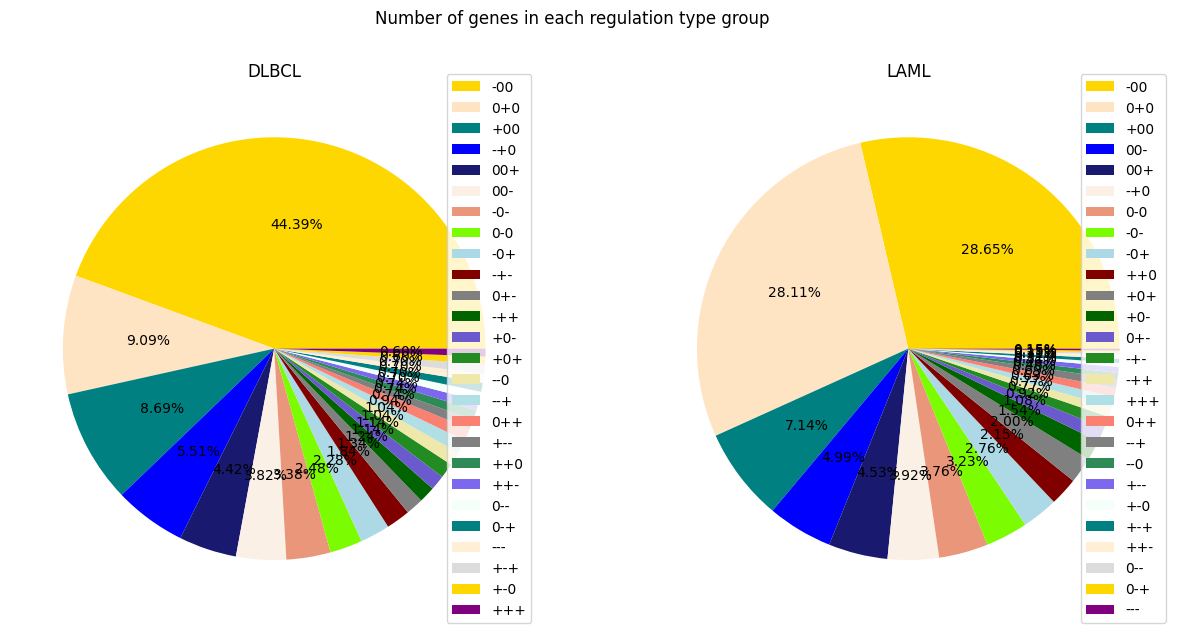

In [38]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
import random
# import collections

# Get lengths of all lists in dictionary
lengths_dlbc = [len(lst) for lst in gene_lists_dlbc] 
lengths_laml = [len(lst) for lst in gene_lists_laml] 
print('total number of grouped genes dlbc = ', sum(lengths_dlbc), " {:.2f}".format(sum(lengths_dlbc)/3446*100), '%')
print('total number of grouped genes laml = ', sum(lengths_laml), " {:.2f}".format(sum(lengths_laml)/2583*100), '%')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Number of genes in each regulation type group')
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(lengths_dlbc))
ax1.set_title('DLBCL')
ax1.pie(lengths_dlbc, autopct='%1.2f%%', radius=1, colors=colors)
ax1.legend(labels=labels_dlbc, loc="right")
ax2.set_title('LAML')
ax2.pie(lengths_laml, autopct='%1.2f%%', radius=1, colors=colors)
ax2.legend(labels=labels_laml, loc="right")

plt.show()

In [39]:
print("Lengths of each group dlbc -> ", lengths_dlbc)
print("Lengths of each group laml -> ", lengths_laml)

Lengths of each group dlbc ->  [894, 183, 175, 111, 89, 77, 68, 50, 46, 37, 27, 25, 23, 23, 21, 21, 19, 15, 15, 15, 14, 14, 14, 14, 12, 12]
Lengths of each group laml ->  [373, 366, 93, 65, 59, 51, 49, 42, 36, 28, 26, 20, 14, 12, 10, 10, 9, 9, 6, 6, 4, 4, 4, 2, 2, 2]


## Merge all regulation groups together

In [40]:
merged_groups_dlbc = set(sum(all_groups_dlbc.values(), []))
merged_groups_laml = set(sum(all_groups_laml.values(), []))

## Find common genes between LAML and DLBCL

In [41]:
import pandas as pd

dlbc_set = set(pd.read_csv(f'dlbc/expr.csv',index_col=0).axes[0].to_numpy())
laml_set = set(pd.read_csv(f'laml/expr.csv',index_col=0).axes[0].to_numpy())
common_genes = dlbc_set & laml_set
print('number of common genes between dlbc and laml = ', len(common_genes))

number of common genes between dlbc and laml =  889


In [42]:
n_fit_overlap_dlbc = len(merged_groups_dlbc & common_genes)
n_fit_overlap_laml = len(merged_groups_laml & common_genes)
print(f'number of fitted genes in DLBC overlapping with common = ', n_fit_overlap_dlbc,
      " {:.2f}".format(n_fit_overlap_dlbc/len(merged_groups_dlbc)*100), '%')
print(f'number of fitted genes in LAML overlapping with common = ', n_fit_overlap_laml, 
      " {:.2f}".format(n_fit_overlap_laml/len(merged_groups_laml)*100), '%')

number of fitted genes in DLBC overlapping with common =  530  26.32 %
number of fitted genes in LAML overlapping with common =  451  34.64 %


In [43]:
print('number of overlapping genes in fitted dlbc, laml')
len(merged_groups_dlbc & merged_groups_laml)

number of overlapping genes in fitted dlbc, laml


271

# Enrichr  
https://maayanlab.cloud/Enrichr/help#api  
enrichrpy   https://github.com/estorrs/enrichrpy

## Available libraries

In [44]:
import enrichrpy.enrichr as een
import enrichrpy.plotting as epl

sorted(een.get_enrichr_libraries(names_only=True)) 

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisGeNET',
 'Disease_

In [45]:
libs = ['GO_Biological_Process_2021',
        'GO_Cellular_Component_2021',
        'GO_Molecular_Function_2021',
        'Reactome_2022',
        'KEGG_2021_Human',
        'MAGMA_Drugs_and_Diseases',
        'TargetScan_microRNA_2017',
        'miRTarBase_2017'] 

## Example 1 group

In [46]:
genes_laml = all_groups_laml['-00']

df_laml = een.get_pathway_enrichment(genes_laml, gene_set_library='GO_Biological_Process_2021')
df_laml = df_laml[df_laml['Adjusted p-value']<0.05]
df_laml

,Rank,Term name,P-value,Z-score,Combined score,Overlapping genes,Adjusted p-value,Old p-value,Old adjusted p-value
0,1,cellular response to cytokine stimulus (GO:007...,0.000005,3.013469,37.046291,"[CCL14, ASAH2, CSF3R, SHC1, ITGB2, F13A1, PTPR...",0.005286,0,0
1,2,cytokine-mediated signaling pathway (GO:0019221),0.000006,2.710633,32.519193,"[IFITM3, CCL14, RNASEL, CSF3R, TRAF3IP2, TNFRS...",0.005286,0,0
2,3,phosphorylation (GO:0016310),0.000007,3.191773,37.936520,"[RNASEL, SYK, PRKCB, INSR, DGKA, STAT3, MINK1,...",0.005286,0,0
3,4,cellular protein modification process (GO:0006...,0.000009,2.273380,26.488755,"[PIGU, RNASEL, EPB42, CUL1, F13A1, COPS7A, PTP...",0.005286,0,0
4,5,regulation of phagocytosis (GO:0050764),0.000012,8.581699,97.575877,"[TUB, HCK, SYK, AHSG, SIRPG, DYSF, CD47, TGM2]",0.005527,0,0
5,6,regulation of small GTPase mediated signal tra...,0.000014,5.024287,56.279767,"[ARHGEF11, TIAM1, ARHGAP21, AKAP13, FGD4, RELN...",0.005527,0,0
6,7,regulation of tumor necrosis factor production...,0.000021,5.247494,56.493123,"[C1QTNF4, SPN, SYK, OAS2, STAT3, PTPRJ, PTPN6,...",0.006781,0,0
7,8,protein phosphorylation (GO:0006468),0.000022,2.790782,29.887573,"[EPHA4, RNASEL, SYK, PRKCB, INSR, MINK1, GDF2,...",0.006781,0,0
8,9,peptidyl-tyrosine phosphorylation (GO:0018108),0.000042,7.030227,70.832643,"[EPHA4, HCK, RELN, SYK, INSR, PTK2B, PTPN6, BMX]",0.011363,0,0
9,10,enzyme linked receptor protein signaling pathw...,0.000065,4.592873,44.284797,"[EPHA4, HCK, SHC3, SYK, SHC1, INSR, PTK2B, LCP...",0.015774,0,0


In [48]:
epl.enrichment_barplot(df_laml, n=20)

alt.LayerChart(...)

## Run for all groups & save

In [13]:
import json
import time

def run_enrich(all_groups_dict, libs, df_name, suffix=''):  
    all_groups_enrichr = {}
    for key, value in all_groups_dict.items():
        all_libs_terms = {}
        for gene_set_library in libs: 
            enrich_res = een.get_pathway_enrichment(value, gene_set_library=gene_set_library)
            if len(enrich_res) > 0:
                enrich_res = enrich_res[enrich_res['Adjusted p-value']<0.05]
                all_libs_terms[gene_set_library] = enrich_res[['Term name','Adjusted p-value']].to_numpy().tolist()
            else:
                all_libs_terms[gene_set_library] = []
            print('~~~~~~~~~~~',key,' ',gene_set_library)
            # print(enrich_res)
            time.sleep(1)
        all_groups_enrichr[key] = all_libs_terms
    with open(f'{df_name}/enrichr_results{suffix}.txt', 'w') as convert_file:
        convert_file.write(json.dumps(all_groups_enrichr, indent=4))
        # return all_groups_enrichr

# run_enrich(all_groups_dlbc, libs, 'dlbc')
# run_enrich(all_groups_laml, libs, 'laml')

## miRNA 

In [25]:
libs = ['TargetScan_microRNA_2017',
        'miRTarBase_2017'] 

In [21]:
len(list(dlbc_set - merged_groups_dlbc)) # with zero expressed genes + 3

1432

In [29]:
import json

mir_dict_dlbc = {}
mir_dict_dlbc['grouped'] = list(merged_groups_dlbc)
mir_dict_dlbc['not grouped'] = list(dlbc_set - merged_groups_dlbc)
# run_enrich(mir_dict_dlbc, libs, 'dlbc', '_mir')

mir_dict_laml = {}
mir_dict_laml['grouped'] = list(merged_groups_laml)
mir_dict_laml['not grouped'] = list(dlbc_set - merged_groups_laml)
# run_enrich(mir_dict_laml, libs, 'laml', '_mir')

~~~~~~~~~~~ grouped   TargetScan_microRNA_2017
~~~~~~~~~~~ grouped   miRTarBase_2017
~~~~~~~~~~~ not grouped   TargetScan_microRNA_2017
~~~~~~~~~~~ not grouped   miRTarBase_2017
~~~~~~~~~~~ grouped   TargetScan_microRNA_2017
~~~~~~~~~~~ grouped   miRTarBase_2017
~~~~~~~~~~~ not grouped   TargetScan_microRNA_2017
~~~~~~~~~~~ not grouped   miRTarBase_2017


## Read enrichr results

In [49]:
import json

enrichr_dlbc = {}
enrichr_laml = {}

with open(f'dlbc/enrichr_results.txt', 'r') as file:
    enrichr_dlbc = json.load(file)
with open(f'laml/enrichr_results.txt', 'r') as file:
    enrichr_laml = json.load(file)

len(enrichr_laml.keys())

26

# Function mining

## DLBC & LAML comparison

In [50]:
libs = ['GO_Biological_Process_2021',
        'GO_Cellular_Component_2021',
        'GO_Molecular_Function_2021',
        'Reactome_2022',
        'KEGG_2021_Human',
        'MAGMA_Drugs_and_Diseases'] 

### Common genes by regulation group

In [51]:
for key in labels_dlbc: 
    lst_dlbc = set(all_groups_dlbc[key]) 
    lst_laml = set(all_groups_laml[key]) 
    common = lst_dlbc & lst_laml
    if len(common)>0:
        print(key)
        print('number of common ->', len(common))
        print('----------------------------')

-00
number of common -> 50
----------------------------
0+0
number of common -> 8
----------------------------
+00
number of common -> 4
----------------------------
-+0
number of common -> 1
----------------------------
00+
number of common -> 1
----------------------------


### Common functions by regulation group

In [52]:
for key in labels_dlbc: 
    print(key)
    for lib in libs:
        lst_dlbc = set([term_list[0] for term_list in enrichr_dlbc[key][lib]]) 
        lst_laml = set([term_list[0] for term_list in enrichr_laml[key][lib]]) 
        common = lst_dlbc & lst_laml
        if len(common)>0:
            print('~~~ ', lib, 'common ->')
            print(common)
    print('----------------------------')

-00
~~~  GO_Biological_Process_2021 common ->
{'enzyme linked receptor protein signaling pathway (GO:0007167)', 'cellular protein modification process (GO:0006464)', 'protein phosphorylation (GO:0006468)', 'positive regulation of cellular process (GO:0048522)', 'transmembrane receptor protein tyrosine kinase signaling pathway (GO:0007169)', 'phosphorylation (GO:0016310)'}
~~~  Reactome_2022 common ->
{'Signal Transduction R-HSA-162582', 'Signaling By Receptor Tyrosine Kinases R-HSA-9006934', 'RHOA GTPase Cycle R-HSA-8980692', 'RHO GTPase Cycle R-HSA-9012999', 'RAC1 GTPase Cycle R-HSA-9013149', 'CDC42 GTPase Cycle R-HSA-9013148'}
~~~  KEGG_2021_Human common ->
{'Growth hormone synthesis, secretion and action', 'Rap1 signaling pathway'}
~~~  MAGMA_Drugs_and_Diseases common ->
{'Paclitaxel'}
----------------------------
0+0
----------------------------
+00
----------------------------
-+0
----------------------------
00+
----------------------------
00-
----------------------------
-0-
--

## Common & unique functions (between each pair of regulation types)  
Note: Keys are sorted by number of genes in group (ascending). Every other key is compared to the consequent keys (but not to the already compared to avoid multiple places with the same pair already compared)

In [62]:
# Helper - optputs colored text
from IPython.display import Markdown, display
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

### DLBC  

In [86]:
def compare_regulation_groups(enrichr_dict):   
    print('COLOR CODES:')
    printmd('common functions', color="blue")
    printmd('unique functions', color="black")
    print()

    enrichr_dict_copy = enrichr_dict.copy()
    for key in labels_dlbc: 
        printmd(f'~~~~~~~ KEY {key} with others', color="red")
        cur_key_dict = enrichr_dict_copy.pop(key, None)
        for lib in libs:
            printmd(f'~~ {lib}', color="orange")
            all_groups_common = set()
            cur_key_funcs = set([term_list[0] for term_list in cur_key_dict[lib]])
            for subkey in enrichr_dict_copy.keys():
                sub_key_funcs = set([term_list[0] for term_list in enrichr_dict_copy[subkey][lib]])
                common = cur_key_funcs & sub_key_funcs
                if len(common)>0:
                    printmd(subkey, color="blue")
                    printmd(common, color="blue")
                    all_groups_common = all_groups_common | common
            unique = cur_key_funcs - all_groups_common
            if len(unique)>0:
                printmd(unique, color="black") 
            # printmd(f'total common in all groups for this key and lib = {len(all_groups_common)}', color='grey')
        print('----------------------')

compare_regulation_groups(enrichr_dlbc)

COLOR CODES:


<span style='color:blue'>common functions</span>

<span style='color:black'>unique functions</span>

<span style='color:red'>~~~~~~~ KEY -00 with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:blue'>+--</span>

<span style='color:blue'>{'positive regulation of transcription, DNA-templated (GO:0045893)'}</span>

<span style='color:black'>{'enzyme linked receptor protein signaling pathway (GO:0007167)', 'liver development (GO:0001889)', 'brain development (GO:0007420)', "3'-UTR-mediated mRNA destabilization (GO:0061158)", 'positive regulation of cellular process (GO:0048522)', 'interleukin-35-mediated signaling pathway (GO:0070757)', 'defense response to tumor cell (GO:0002357)', 'positive regulation of developmental process (GO:0051094)', 'axonal fasciculation (GO:0007413)', 'negative regulation of stress fiber assembly (GO:0051497)', 'nervous system development (GO:0007399)', 'regulation of phosphorylation (GO:0042325)', 'axonogenesis (GO:0007409)', 'regulation of epithelial to mesenchymal transition (GO:0010717)', 'membrane depolarization during cardiac muscle cell action potential (GO:0086012)', 'regulation of anatomical structure morphogenesis (GO:0022603)', 'protein autophosphorylation (GO:0046777)', 'postsynaptic density organization (GO:0097106)', 'chordate embryonic development (GO:0043009)', 'positive regulation of kinase activity (GO:0033674)', 'pharyngeal system development (GO:0060037)', 'negative regulation of actin filament bundle assembly (GO:0032232)', 'phosphatidylinositol 3-kinase signaling (GO:0014065)', 'positive regulation of macromolecule metabolic process (GO:0010604)', 'regulation of intracellular signal transduction (GO:1902531)', 'transmembrane receptor protein tyrosine kinase signaling pathway (GO:0007169)', 'regulation of endothelial cell proliferation (GO:0001936)', 'regulation of heart rate by cardiac conduction (GO:0086091)', 'mesonephros development (GO:0001823)', 'regulation of cardiac muscle cell action potential (GO:0098901)', 'regulation of transcription by RNA polymerase II (GO:0006357)', 'regulation of gene silencing by miRNA (GO:0060964)', 'regulation of RNA splicing (GO:0043484)', 'neuron projection fasciculation (GO:0106030)', 'negative regulation of transcription, DNA-templated (GO:0045892)', 'regulation of cyclin-dependent protein serine/threonine kinase activity (GO:0000079)', 'regulation of transcription, DNA-templated (GO:0006355)', 'regulation of gene silencing by RNA (GO:0060966)', 'neurotransmitter secretion (GO:0007269)', 'central nervous system development (GO:0007417)', 'regulation of posttranscriptional gene silencing (GO:0060147)', 'regulation of nucleic acid-templated transcription (GO:1903506)', 'positive regulation of signal transduction (GO:0009967)', 'ephrin receptor signaling pathway (GO:0048013)', 'peptidyl-serine phosphorylation (GO:0018105)', 'positive regulation of osteoblast differentiation (GO:0045669)', 'regulation of canonical Wnt signaling pathway (GO:0060828)', 'regulation of MAPK cascade (GO:0043408)', 'protein kinase C-activating G protein-coupled receptor signaling pathway (GO:0007205)', 'negative regulation of cell cycle (GO:0045786)', 'positive regulation of nucleic acid-templated transcription (GO:1903508)', 'regulation of glomerular mesangial cell proliferation (GO:0072124)', 'positive regulation of developmental growth (GO:0048639)', 'regulation of protein kinase B signaling (GO:0051896)', 'cell-cell junction maintenance (GO:0045217)', 'negative regulation of transcription by RNA polymerase II (GO:0000122)', 'gland development (GO:0048732)', 'smooth muscle tissue development (GO:0048745)', 'positive regulation of cardiac muscle cell proliferation (GO:0060045)', 'peptidyl-serine modification (GO:0018209)', 'positive regulation of cardiac muscle tissue growth (GO:0055023)', 'regulation of pri-miRNA transcription by RNA polymerase II (GO:1902893)', 'neuron projection morphogenesis (GO:0048812)', 'regulation of kinase activity (GO:0043549)', 'regulation of cartilage development (GO:0061035)', 'regulation of dendrite extension (GO:1903859)', 'membrane depolarization during action potential (GO:0086010)', 'regulation of mammary gland epithelial cell proliferation (GO:0033599)', 'positive regulation of transferase activity (GO:0051347)', 'neuron projection development (GO:0031175)', 'regulation of angiogenesis (GO:0045765)', 'cellular protein modification process (GO:0006464)', 'negative regulation of epithelial cell proliferation (GO:0050680)', 'heart development (GO:0007507)', 'regulation of axonogenesis (GO:0050770)', 'axon development (GO:0061564)', 'positive regulation of transcription by RNA polymerase II (GO:0045944)', 'vesicle cytoskeletal trafficking (GO:0099518)', 'skeletal system development (GO:0001501)', 'positive regulation of intracellular signal transduction (GO:1902533)', 'axon guidance (GO:0007411)', 'homophilic cell adhesion via plasma membrane adhesion molecules (GO:0007156)', 'regulation of neuron projection development (GO:0010975)', 'sinoatrial node cell differentiation (GO:0060921)', 'positive regulation of cell population proliferation (GO:0008284)', 'positive regulation of gene expression (GO:0010628)', 'regulation of gene expression (GO:0010468)', 'regulation of cell cycle (GO:0051726)', 'regulation of cellular macromolecule biosynthetic process (GO:2000112)', 'positive regulation of dendrite extension (GO:1903861)', 'synapse organization (GO:0050808)', 'steroid hormone mediated signaling pathway (GO:0043401)', 'hepaticobiliary system development (GO:0061008)', 'positive regulation of cell migration (GO:0030335)', 'protein phosphorylation (GO:0006468)', 'phosphorylation (GO:0016310)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:blue'>00-</span>

<span style='color:blue'>{'integral component of plasma membrane (GO:0005887)'}</span>

<span style='color:blue'>00+</span>

<span style='color:blue'>{'neuron projection (GO:0043005)', 'integral component of plasma membrane (GO:0005887)'}</span>

<span style='color:blue'>0-0</span>

<span style='color:blue'>{'cell-cell junction (GO:0005911)'}</span>

<span style='color:blue'>0+0</span>

<span style='color:blue'>{'intracellular membrane-bounded organelle (GO:0043231)', 'nucleus (GO:0005634)'}</span>

<span style='color:blue'>-+0</span>

<span style='color:blue'>{'intracellular membrane-bounded organelle (GO:0043231)', 'nucleus (GO:0005634)'}</span>

<span style='color:black'>{'axon (GO:0030424)', 'dendrite (GO:0030425)', 'actin cytoskeleton (GO:0015629)', 'GABA-ergic synapse (GO:0098982)', 'cytoskeleton (GO:0005856)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:blue'>0--</span>

<span style='color:blue'>{'transmembrane-ephrin receptor activity (GO:0005005)', 'hydrolase activity, acting on carbon-nitrogen (but not peptide) bonds, in cyclic amides (GO:0016812)', 'ephrin receptor activity (GO:0005003)'}</span>

<span style='color:blue'>0++</span>

<span style='color:blue'>{'cadherin binding (GO:0045296)'}</span>

<span style='color:blue'>++0</span>

<span style='color:blue'>{'transcription cis-regulatory region binding (GO:0000976)'}</span>

<span style='color:black'>{'cis-regulatory region sequence-specific DNA binding (GO:0000987)', 'GTPase activator activity (GO:0005096)', 'protein serine/threonine kinase activity (GO:0004674)', 'DNA-binding transcription activator activity, RNA polymerase II-specific (GO:0001228)', 'RNA polymerase II transcription regulatory region sequence-specific DNA binding (GO:0000977)', 'DNA-binding transcription repressor activity, RNA polymerase II-specific (GO:0001227)', 'voltage-gated cation channel activity (GO:0022843)', 'cell-cell adhesion mediator activity (GO:0098632)', 'sequence-specific DNA binding (GO:0043565)', 'neuropeptide receptor activity (GO:0008188)', 'protein kinase binding (GO:0019901)', 'RNA polymerase II cis-regulatory region sequence-specific DNA binding (GO:0000978)', 'protein tyrosine kinase activity (GO:0004713)', 'voltage-gated calcium channel activity involved in cardiac muscle cell action potential (GO:0086007)', 'transmembrane receptor protein kinase activity (GO:0019199)', 'transmembrane receptor protein tyrosine kinase activity (GO:0004714)', 'kinase binding (GO:0019900)', 'protein binding involved in heterotypic cell-cell adhesion (GO:0086080)', 'cell adhesive protein binding involved in bundle of His cell-Purkinje myocyte communication (GO:0086083)', 'double-stranded DNA binding (GO:0003690)', 'GPI-linked ephrin receptor activity (GO:0005004)', 'sequence-specific double-stranded DNA binding (GO:1990837)', 'tubulin binding (GO:0015631)', 'DNA binding (GO:0003677)', 'protein serine/threonine kinase activator activity (GO:0043539)', 'protein kinase activator activity (GO:0030295)', 'BMP receptor binding (GO:0070700)', 'GTPase regulator activity (GO:0030695)', 'adenyl ribonucleotide binding (GO:0032559)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:blue'>-+-</span>

<span style='color:blue'>{'Axon Guidance R-HSA-422475', 'Nervous System Development R-HSA-9675108'}</span>

<span style='color:black'>{'CDC42 GTPase Cycle R-HSA-9013148', 'Integration Of Energy Metabolism R-HSA-163685', 'Generic Transcription Pathway R-HSA-212436', 'Diseases Of DNA Repair R-HSA-9675135', 'RHOBTB GTPase Cycle R-HSA-9706574', 'Transmission Across Chemical Synapses R-HSA-112315', 'Neurexins And Neuroligins R-HSA-6794361', 'Interleukin-35 Signaling R-HSA-8984722', 'RAC3 GTPase Cycle R-HSA-9013423', 'RAC1 GTPase Cycle R-HSA-9013149', 'RHO GTPase Cycle R-HSA-9012999', 'Signal Transduction R-HSA-162582', 'RAC2 GTPase Cycle R-HSA-9013404', 'Presynaptic Phase Of Homologous DNA Pairing And Strand Exchange R-HSA-5693616', 'HDR Thru Homologous Recombination (HRR) R-HSA-5685942', 'Diseases Of Signal Transduction By Growth Factor Receptors And Second Messengers R-HSA-5663202', 'Gene Expression (Transcription) R-HSA-74160', 'RNA Polymerase II Transcription R-HSA-73857', 'Oncogenic MAPK Signaling R-HSA-6802957', 'SUMO E3 Ligases SUMOylate Target Proteins R-HSA-3108232', 'Signaling By Receptor Tyrosine Kinases R-HSA-9006934', 'Defective Homologous Recombination Repair (HRR) Due To BRCA2 Loss Of Function R-HSA-9701190', 'ISG15 Antiviral Mechanism R-HSA-1169408', 'Protein-protein Interactions At Synapses R-HSA-6794362', 'CLEC7A (Dectin-1) Induces NFAT Activation R-HSA-5607763', 'Cell Cycle, Mitotic R-HSA-69278', 'Signaling By B Cell Receptor (BCR) R-HSA-983705', 'Depolymerisation Of Nuclear Lamina R-HSA-4419969', 'Netrin-1 Signaling R-HSA-373752', 'Cell Cycle R-HSA-1640170', 'RHOA GTPase Cycle R-HSA-8980692', 'Signaling By Rho GTPases R-HSA-194315', 'Resolution Of D-loop Structures Thru Synthesis-Dependent Strand Annealing (SDSA) R-HSA-5693554', 'Homologous DNA Pairing And Strand Exchange R-HSA-5693579', 'RHOG GTPase Cycle R-HSA-9013408', 'Impaired BRCA2 Binding To PALB2 R-HSA-9709603', 'EPH-ephrin Mediated Repulsion Of Cells R-HSA-3928665', 'RHOBTB2 GTPase Cycle R-HSA-9013418', 'Signaling By BRAF And RAF1 Fusions R-HSA-6802952', 'Resolution Of D-Loop Structures R-HSA-5693537', 'Neuronal System R-HSA-112316', 'RHOC GTPase Cycle R-HSA-9013106', 'Nuclear Envelope Breakdown R-HSA-2980766', 'Defective HDR Thru Homologous Recombination (HRR) Due To BRCA1 Loss-Of-Function R-HSA-9701192', 'EPH-Ephrin Signaling R-HSA-2682334', 'Developmental Biology R-HSA-1266738', 'Signaling By Rho GTPases, Miro GTPases And RHOBTB3 R-HSA-9716542'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:blue'>-++</span>

<span style='color:blue'>{'Oxytocin signaling pathway'}</span>

<span style='color:black'>{'Rap1 signaling pathway', 'Insulin secretion', 'GnRH secretion', 'Signaling pathways regulating pluripotency of stem cells', 'Glioma', 'cAMP signaling pathway', 'Inflammatory bowel disease', 'Cellular senescence', 'FoxO signaling pathway', 'Proteoglycans in cancer', 'Thyroid hormone signaling pathway', 'PD-L1 expression and PD-1 checkpoint pathway in cancer', 'Calcium signaling pathway', 'Non-small cell lung cancer', 'Th1 and Th2 cell differentiation', 'Aldosterone-regulated sodium reabsorption', 'C-type lectin receptor signaling pathway', 'Parathyroid hormone synthesis, secretion and action', 'Adherens junction', 'Long-term potentiation', 'Central carbon metabolism in cancer', 'Arrhythmogenic right ventricular cardiomyopathy', 'MAPK signaling pathway', 'Axon guidance', 'Growth hormone synthesis, secretion and action', 'Cholinergic synapse', 'PI3K-Akt signaling pathway', 'AGE-RAGE signaling pathway in diabetic complications', 'Pathways in cancer', 'Gap junction', 'Pancreatic cancer', 'Fanconi anemia pathway', 'Bladder cancer', 'Wnt signaling pathway', 'Hippo signaling pathway', 'Small cell lung cancer', 'Melanoma', 'Hepatitis B', 'Herpes simplex virus 1 infection', 'GABAergic synapse', 'Regulation of actin cytoskeleton', 'Glutamatergic synapse', 'MicroRNAs in cancer'}</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>0--</span>

<span style='color:blue'>{'Vandetanib'}</span>

<span style='color:blue'>0-+</span>

<span style='color:blue'>{'Restless Leg Syndrome', 'Gabapentin', 'Virus Herpes Simplex HSV'}</span>

<span style='color:blue'>-0+</span>

<span style='color:blue'>{'Ponatinib'}</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'Sorafenib', 'Hepatocellular Carcinoma HCC'}</span>

<span style='color:blue'>++-</span>

<span style='color:blue'>{'Vemurafenib'}</span>

<span style='color:black'>{'KIT Inhibitor', 'Ephrin Inhibitor', 'Dipyridamole', 'Hypokalemia', 'Everolimus', 'EGFR Inhibitor', 'Cisplatin', 'Tuberous Sclerosis Complex TSC', 'PARP Inhibitor', 'Afatinib', 'Hyperaldosteronism', 'Gemcitabine', 'Thymidylate Synthase Inhibitor', 'Pemetrexed', 'Erlotinib', 'Niraparib', 'Colorectal Cancer', 'Quercetin', 'Dermatofibrosarcoma Protuberans DFSP', 'Talazoparib', 'Tyrosine Kinase Inhibitor', 'Gastric Adenocarcinoma', 'mTOR Inhibitor', 'Felodipine', 'Encorafenib', 'Olaparib', 'Neratinib', 'Neuroendocrine Tumors Of Pancreatic Origin PNET', 'Isradipine', 'Mesothelioma', 'Palbociclib', 'Primary Peritoneal Cancer PPC', 'Imatinib', 'Celecoxib', 'Gefitinib', 'Non Small Cell Lung Cancer NSCLC', 'Chronic Eosinophilic Leukemia CEL', 'Hypereosinophilic Syndrome HES', 'Paclitaxel', 'Pirarubicin', 'Breast Cancer', 'Bladder Cancer', 'Testicular Carcinoma', 'Nitrendipine', 'Pancreatic Cancer', 'Spironolactone', 'Renal Angiomyolipoma', 'Gastrointestinal Stromal Tumors GIST', 'Subependymal Giant Cell Astrocytoma SEGA', 'Osimertinib', 'Dasatinib', 'Caffeine', 'Ovarian Cancer', 'Midostaurin', 'Lapatinib', 'Primary Dysmenorrhea PD', '5 Fluorouracil', 'Capecitabine', 'Temozolomide', 'Polar Auxin Transport Inhibitor'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY 0+0 with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:blue'>-+0</span>

<span style='color:blue'>{'intracellular membrane-bounded organelle (GO:0043231)', 'nucleus (GO:0005634)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'Translation R-HSA-72766', 'Sema3A PAK Dependent Axon Repulsion R-HSA-399954', 'Eukaryotic Translation Termination R-HSA-72764', 'Metabolism Of RNA R-HSA-8953854', 'Formation Of A Pool Of Free 40S Subunits R-HSA-72689', 'L13a-mediated Translational Silencing Of Ceruloplasmin Expression R-HSA-156827', 'GTP Hydrolysis And Joining Of 60S Ribosomal Subunit R-HSA-72706', 'Cap-dependent Translation Initiation R-HSA-72737'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY +00 with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'sodium channel activity (GO:0005272)', 'oxidoreductase activity, acting on paired donors, with incorporation or reduction of molecular oxygen, NAD(P)H as one donor, and incorporation of one atom of oxygen (GO:0016709)', 'oxidoreductase activity, acting on paired donors, with incorporation or reduction of molecular oxygen, reduced iron-sulfur protein as one donor, and incorporation of one atom of oxygen (GO:0016713)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'Interaction Between L1 And Ankyrins R-HSA-445095'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:black'>{'Vitamin digestion and absorption', 'Carbohydrate digestion and absorption', 'ABC transporters', 'Taste transduction'}</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>00+</span>

<span style='color:blue'>{'Kainate Receptor Antagonist', 'Topiramate'}</span>

<span style='color:blue'>+--</span>

<span style='color:blue'>{'Phenytoin'}</span>

<span style='color:black'>{'Carbamazepine', 'Carboxamide Antiepileptic', 'ATC Code N03A', 'Nitric Oxide Donor', 'Nicorandil', 'Lidoflazine', 'Seizures', 'Fadrozole'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY -+0 with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:black'>{'nucleus (GO:0005634)', 'intracellular membrane-bounded organelle (GO:0043231)', 'condensed chromosome (GO:0000793)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'small GTPase binding (GO:0031267)', 'GTPase binding (GO:0051020)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'Chromatin Modifying Enzymes R-HSA-3247509', 'HDACs Deacetylate Histones R-HSA-3214815', 'Potential Therapeutics For SARS R-HSA-9679191'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY 00+ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:black'>{'sodium ion transport (GO:0006814)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:blue'>00-</span>

<span style='color:blue'>{'integral component of plasma membrane (GO:0005887)'}</span>

<span style='color:black'>{'neuron projection (GO:0043005)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'symporter activity (GO:0015293)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:black'>{'Kainate Receptor Antagonist', 'Flumazenil', 'Adrenergic Inhibitor', 'Etomidate', 'Glutamate Receptor Antagonist', 'Venlafaxine', 'Carbonic Anhydrase Inhibitor', 'Acamprosate', 'Abstinence From Alcohol', 'Benzodiazepine Receptor Antagonist', 'Duloxetine', 'Butalbital', 'Imipramine', 'Norepinephrine Reputake Inhibitor', 'Acetazolamide', 'Ethoxzolamide', 'ATC Code N07B', 'Topiramate', 'Amoxapine', 'Serotonin Reuptake Inhibitor', 'Metharbital', 'Peripheral Neuropathy', 'GABA Receptor Antagonist', 'General Anaesthetic'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY 00- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:black'>{'regulation of extracellular matrix organization (GO:1903053)', 'cation transport (GO:0006812)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:black'>{'lysosome (GO:0005764)', 'integral component of plasma membrane (GO:0005887)', 'phagocytic vesicle (GO:0045335)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'ligand-gated calcium channel activity (GO:0099604)', 'calcium channel activity (GO:0005262)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'Ion Channel Transport R-HSA-983712', 'TRP Channels R-HSA-3295583'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>0--</span>

<span style='color:blue'>{'RNA Synthesis Inhibitor', 'Daunorubicin'}</span>

<span style='color:blue'>+0-</span>

<span style='color:blue'>{'RNA Synthesis Inhibitor', 'Daunorubicin'}</span>

<span style='color:blue'>++-</span>

<span style='color:blue'>{'Graves Disease', 'Goiter', 'Thyroid Peroxidase Inhibitor', 'Propylthiouracil'}</span>

<span style='color:black'>{'Topotecan', 'Lorlatinib', 'PF 06463922', 'Tranilast', 'Cervical Cancer', 'Anisindione', 'Angiogenesis Inhibitor'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY -0- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY 0-0 with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:black'>{'cell-cell junction (GO:0005911)', 'intracellular vesicle (GO:0097708)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'Caspase Activation Via Dependence Receptors In Absence Of Ligand R-HSA-418889'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY -0+ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'Regulation Of Gene Expression In Late Stage (Branching Morphogenesis) Pancreatic Bud Precursor Cells R-HSA-210744', 'NOTCH4 Intracellular Domain Regulates Transcription R-HSA-9013695', 'Transcriptional Regulation By AP-2 (TFAP2) Family Of Transcription Factors R-HSA-8864260', 'RUNX3 Regulates NOTCH Signaling R-HSA-8941856', 'Activation Of TFAP2 (AP-2) Family Of Transcription Factors R-HSA-8866907'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:black'>{'Ponatinib', 'VEGFR Inhibitor', 'Axitinib', 'Cabozantinib', 'Renal Cell Carcinoma RCC', 'RET Tyrosine Kinase Inhibitor', 'Medullary Thyroid Cancer MTC', 'Regorafenib', 'PDGFR Tyrosine Kinase Receptor Inhibitor'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY -+- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'SLC-mediated Transmembrane Transport R-HSA-425407', 'RHO GTPases Activate ROCKs R-HSA-5627117', 'Axon Guidance R-HSA-422475', 'Nervous System Development R-HSA-9675108', 'Sema4D In Semaphorin Signaling R-HSA-400685', 'Sema4D Induced Cell Migration And Growth-Cone Collapse R-HSA-416572', 'EPHA-mediated Growth Cone Collapse R-HSA-3928663', 'RHO GTPases Activate CIT R-HSA-5625900', 'RHO GTPases Activate PAKs R-HSA-5627123'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY 0+- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:black'>{'COPII-coated vesicle cargo loading (GO:0090110)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY -++ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'metal ion transmembrane transporter activity (GO:0046873)', 'tau protein binding (GO:0048156)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:black'>{'cGMP-PKG signaling pathway', 'Oxytocin signaling pathway'}</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>++-</span>

<span style='color:blue'>{'Myeloma', 'Thalidomide', 'Tumor Necrosis Factor Production Inhibitor'}</span>

<span style='color:black'>{'Potassium Channel Activator', 'Diazoxide', 'Hypoglycemia', 'Glyburide', 'Chronic Myeloid Leukemia CML', 'Lenalidomide', 'Bosutinib', 'Bcr Abl Kinase Inhibitor', 'Kir6 Channel KATP Activator', 'Minoxidil', 'Anticancer Agent', 'Yohimbine', 'Tolbutamide', 'Abl Kinase Inhibitor', 'KATP Activator', 'Gliquidone', 'ATC Code C02D', 'SRC Inhibitor'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY +0- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>0--</span>

<span style='color:blue'>{'RNA Synthesis Inhibitor', 'Daunorubicin'}</span>

<span style='color:black'>{'Teniposide', 'Glutamate Receptor Modulator', 'Rabeprazole', 'Scleroderma', 'Vesnarinone', 'Thiopental', 'Halofuginone', 'Collagenase Inhibitor', 'Cyclothiazide', 'Pantoprazole', 'Esomeprazole'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY +0+ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:black'>{'regulation of endocytosis (GO:0030100)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY --0 with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY --+ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>+--</span>

<span style='color:blue'>{'ATC Code L01B', 'DNA Methyltransferase Inhibitor', 'Myelodysplastic Diseases MDS', 'Anemia', 'Azacitidine', 'Chronic Myelomonocytic Leukemia CMMoL'}</span>

<span style='color:black'>{'Hypoxia Inducible Factor Inhibitor', 'Gram Positive Bacterial Infections', 'Decitabine', 'Hexachlorophene', 'Acriflavine', 'ATC Code R02A', 'Fungal Infection'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY 0++ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:black'>{'positive regulation of DNA-dependent DNA replication (GO:2000105)', 'protein processing (GO:0016485)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'oxalate transmembrane transporter activity (GO:0019531)', 'sulfate transmembrane transporter activity (GO:0015116)', 'chromo shadow domain binding (GO:0070087)', 'poly(A)-specific ribonuclease activity (GO:0004535)', 'aspartic-type endopeptidase activity (GO:0004190)', 'cardiolipin binding (GO:1901612)', 'dipeptidyl-peptidase activity (GO:0008239)', 'chloride transmembrane transporter activity (GO:0015108)', 'protein geranylgeranyltransferase activity (GO:0004661)', 'peptide N-acetyltransferase activity (GO:0034212)', 'aspartic endopeptidase activity, intramembrane cleaving (GO:0042500)', 'cadherin binding (GO:0045296)', 'phosphatidylglycerol binding (GO:1901611)', 'aspartic-type peptidase activity (GO:0070001)', 'CoA carboxylase activity (GO:0016421)', 'solute:anion antiporter activity (GO:0140323)', 'bicarbonate transmembrane transporter activity (GO:0015106)', 'peptide alpha-N-acetyltransferase activity (GO:0004596)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY +-- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:black'>{'negative regulation of myeloid leukocyte differentiation (GO:0002762)', 'negative regulation of osteoclast differentiation (GO:0045671)', 'regulation of osteoclast differentiation (GO:0045670)', 'positive regulation of transcription, DNA-templated (GO:0045893)', 'negative regulation of metabolic process (GO:0009892)', 'negative regulation of cold-induced thermogenesis (GO:0120163)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'dynactin binding (GO:0034452)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'SARS-CoV-1 Genome Replication And Transcription R-HSA-9679514', 'Toll Like Receptor 7/8 (TLR7/8) Cascade R-HSA-168181', 'MyD88:MAL(TIRAP) Cascade Initiated On Plasma Membrane R-HSA-166058', 'MyD88-independent TLR4 Cascade R-HSA-166166', 'Toll Like Receptor 4 (TLR4) Cascade R-HSA-166016', 'MyD88 Dependent Cascade Initiated On Endosome R-HSA-975155', 'Toll Like Receptor 9 (TLR9) Cascade R-HSA-168138', 'SARS-CoV-2 Genome Replication And Transcription R-HSA-9694682', 'TRAF6 Mediated Induction Of NFkB And MAP Kinases Upon TLR7/8 Or 9 Activation R-HSA-975138', 'Choline Catabolism R-HSA-6798163', 'Attachment And Entry R-HSA-9678110'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>++-</span>

<span style='color:blue'>{'Epicondylitis', 'Prednisone', 'Dermatomyositis', 'Congenital Adrenal Hyperplasia'}</span>

<span style='color:black'>{'Cushings Syndrome', 'Anemia', 'Aminoglutethimide', 'Ritonavir', 'ATC Code C01B', 'Naloxone', 'Prednisolone', 'ATC Code D05A', 'Somatostatin Receptor Agonist', 'Retinoid Receptor Ligand', 'DNA Methyltransferase Inhibitor', 'Carcinoid Tumors', 'Iritis', 'Isotretinoin', 'Phenytoin', 'Potassium Channel Blocker', 'Nelfinavir', 'Raloxifene', 'Pravastatin', 'Octreotide', 'Tacrolimus', 'ATC Code L02B', 'Cyclitis', 'Retinol', 'Azacitidine', 'Hypocalcemia', 'Chronic Myelomonocytic Leukemia CMMoL', 'Glucocorticoid Receptor Antagonist', 'ATC Code L01B', 'Punctate Keratitis', 'Calcitriol', 'Myelodysplastic Diseases MDS', 'Saquinavir', 'Hypoparathyroidism', 'Amiodarone'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY ++0 with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'TAP1 binding (GO:0046978)', 'transcription cis-regulatory region binding (GO:0000976)', 'aryl hydrocarbon receptor binding (GO:0017162)', 'oligopeptide transmembrane transporter activity (GO:0035673)', 'carbon-nitrogen ligase activity, with glutamine as amido-N-donor (GO:0016884)', 'peptide transmembrane transporter activity (GO:1904680)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY ++- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:black'>{'membrane assembly (GO:0071709)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'Defects Of Contact Activation System (CAS) And Kallikrein/Kinin System (KKS) R-HSA-9651496', 'Platelet Adhesion To Exposed Collagen R-HSA-75892', 'Defective Factor VIII Causes Hemophilia A R-HSA-9662001', 'GRB2:SOS Provides Linkage To MAPK Signaling For Integrins R-HSA-354194', 'GPCR Downstream Signaling R-HSA-388396', 'Thyroxine Biosynthesis R-HSA-209968', 'Signaling By GPCR R-HSA-372790', 'p130Cas Linkage To MAPK Signaling For Integrins R-HSA-372708', 'Peptide Ligand-Binding Receptors R-HSA-375276', 'G Alpha (Q) Signaling Events R-HSA-416476', 'Metabolism Of Amine-Derived Hormones R-HSA-209776', 'GP1b-IX-V Activation Signaling R-HSA-430116'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>+++</span>

<span style='color:blue'>{'Warfarin'}</span>

<span style='color:black'>{'Myeloma', 'Epicondylitis', 'Congenital Adrenal Hyperplasia', 'Propylthiouracil', 'ATC Code R05C', 'Thalidomide', 'Hyperthyroidism', 'Vincristine', 'ATC Code H03B', 'Phenylephrine', 'Antithyroid Agent', 'Goiter', 'ATC Code V03A', 'Graves Disease', 'Prednisone', 'Trametinib', 'ATC Code S01X', 'Tumor Necrosis Factor Production Inhibitor', 'Thyroid Peroxidase Inhibitor', 'Hepatic Injury', 'Hemorrhoids', 'Acetaminophen Overdose', 'Carbimazole', 'Methimazole', 'Ribavirin', 'Vemurafenib', 'Dermatomyositis', 'Antiviral', 'Pentoxifylline', 'Acetylcysteine', 'Mucolytic Agent'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY 0-- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:black'>{'pyrimidine nucleobase metabolic process (GO:0006206)', 'cellular response to dopamine (GO:1903351)', 'embryonic hemopoiesis (GO:0035162)', 'mRNA transcription by RNA polymerase II (GO:0042789)', 'response to dopamine (GO:1903350)', 'positive regulation of blood pressure (GO:0045777)', 'negative regulation of lipase activity (GO:0060192)', 'regulation of transcription from RNA polymerase II promoter in response to oxidative stress (GO:0043619)', 'detection of stimulus involved in sensory perception of pain (GO:0062149)', 'intrinsic apoptotic signaling pathway (GO:0097193)', 'regulation of skeletal muscle fiber development (GO:0048742)', 'retinal ganglion cell axon guidance (GO:0031290)', 'lens fiber cell development (GO:0070307)', 'regulation of skeletal muscle satellite cell proliferation (GO:0014842)', 'pyrimidine nucleobase catabolic process (GO:0006208)', 'regulation of muscle cell differentiation (GO:0051147)', 'columnar/cuboidal epithelial cell differentiation (GO:0002065)', 'PERK-mediated unfolded protein response (GO:0036499)', 'negative regulation of oxidative stress-induced neuron death (GO:1903204)', 'regulation of oxidative stress-induced neuron death (GO:1903203)', 'plasma membrane repair (GO:0001778)', 'central nervous system neuron axonogenesis (GO:0021955)', 'nucleobase catabolic process (GO:0046113)', 'peptidyl-lysine deacetylation (GO:0034983)', 'negative regulation of skeletal muscle cell differentiation (GO:2001015)', 'mRNA transcription (GO:0009299)', 'regulation of striated muscle cell differentiation (GO:0051153)', 'negative regulation of lipoprotein lipase activity (GO:0051005)', 'central nervous system projection neuron axonogenesis (GO:0021952)', 'B cell chemotaxis (GO:0035754)', 'positive regulation of transcription from RNA polymerase II promoter in response to endoplasmic reticulum stress (GO:1990440)', 'histone H4 deacetylation (GO:0070933)', 'intestinal epithelial cell differentiation (GO:0060575)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'ephrin receptor activity (GO:0005003)', 'DNA-binding transcription factor binding (GO:0140297)', 'LRR domain binding (GO:0030275)', 'transmembrane-ephrin receptor activity (GO:0005005)', 'leucine zipper domain binding (GO:0043522)', 'hydrolase activity, acting on carbon-nitrogen (but not peptide) bonds, in cyclic amides (GO:0016812)', 'dihydropyrimidinase activity (GO:0004157)', 'RNA polymerase binding (GO:0070063)', 'neuropeptide receptor binding (GO:0071855)', 'histone deacetylase activity (GO:0004407)', 'ATPase inhibitor activity (GO:0042030)', 'cAMP response element binding protein binding (GO:0008140)', 'steroid dehydrogenase activity, acting on the CH-OH group of donors, NAD or NADP as acceptor (GO:0033764)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:black'>{'Panobinostat', 'Peripheral T Cell Lymphoma PTCL', 'SN 38', 'Vandetanib', 'Romidepsin', 'RNA Synthesis Inhibitor', 'Vorinostat', 'Belinostat', 'HDAC Inhibitor', 'Urea Cycle Disorders', 'Daunorubicin', 'Ephedrine Racemic', 'Valproic Acid', 'Phenylbutyrate'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY 0-+ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:black'>{'Niflumic Acid', 'Gabapentin', 'Restless Leg Syndrome', 'Virus Herpes Simplex HSV'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY --- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'phospholipase binding (GO:0043274)', 'cAMP-dependent protein kinase activity (GO:0004691)', 'ubiquitin-protein transferase activity (GO:0004842)', 'intramolecular transferase activity, phosphotransferases (GO:0016868)', '1-phosphatidylinositol-3-kinase regulator activity (GO:0046935)', 'lipase activator activity (GO:0060229)', 'cysteine-type endopeptidase inhibitor activity (GO:0004869)', 'protein kinase A regulatory subunit binding (GO:0034237)', 'protein kinase inhibitor activity (GO:0004860)', 'protein serine/threonine/tyrosine kinase activity (GO:0004712)', 'oxidoreductase activity, acting on the aldehyde or oxo group of donors, disulfide as acceptor (GO:0016624)', 'ubiquitin-like protein conjugating enzyme binding (GO:0044390)', 'ubiquitin-like protein conjugating enzyme activity (GO:0061650)', 'cyclic nucleotide-dependent protein kinase activity (GO:0004690)', 'ubiquitin protein ligase activity (GO:0061630)', 'cysteine-type endopeptidase inhibitor activity involved in apoptotic process (GO:0043027)', 'ubiquitin-like protein ligase activity (GO:0061659)', 'phospholipase activator activity (GO:0016004)', 'ubiquitin conjugating enzyme binding (GO:0031624)', 'ubiquitin conjugating enzyme activity (GO:0061631)', 'phosphatidylinositol 3-kinase regulator activity (GO:0035014)', 'kinase inhibitor activity (GO:0019210)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'Inactivation Of CSF3 (G-CSF) Signaling R-HSA-9705462', 'Antigen Processing: Ubiquitination And Proteasome Degradation R-HSA-983168', 'Signaling By CSF3 (G-CSF) R-HSA-9674555'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:black'>{'Fasudil', 'Rho Associated Kinase Inhibitor', 'Cerebral Vasospasm'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY +-+ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:black'>{'heterotypic cell-cell adhesion (GO:0034113)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY +-0 with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:black'>{'germ plasm (GO:0060293)', 'piP-body (GO:0071547)', 'pi-body (GO:0071546)', 'P granule (GO:0043186)', 'chromatoid body (GO:0033391)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:black'>{'Sorafenib', 'Hepatocellular Carcinoma HCC', 'Bursitis', 'Indomethacin', 'Androgen Receptor Antagonist', 'Tendinitis', 'Bicalutamide'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY +++ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'calcium ion binding (GO:0005509)', 'cobalamin binding (GO:0031419)', 'metal ion binding (GO:0046872)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:black'>{'Warfarin', 'Abdominal Distension', 'Vasopressin'}</span>

----------------------


### LAML

In [87]:
compare_regulation_groups(enrichr_laml)

COLOR CODES:


<span style='color:blue'>common functions</span>

<span style='color:black'>unique functions</span>

<span style='color:red'>~~~~~~~ KEY -00 with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:blue'>0-+</span>

<span style='color:blue'>{'peptidyl-tyrosine phosphorylation (GO:0018108)', 'peptidyl-tyrosine modification (GO:0018212)', 'transmembrane receptor protein tyrosine kinase signaling pathway (GO:0007169)', 'enzyme linked receptor protein signaling pathway (GO:0007167)'}</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'peptidyl-tyrosine phosphorylation (GO:0018108)', 'peptidyl-tyrosine modification (GO:0018212)', 'enzyme linked receptor protein signaling pathway (GO:0007167)'}</span>

<span style='color:blue'>+++</span>

<span style='color:blue'>{'regulation of nitric oxide biosynthetic process (GO:0045428)'}</span>

<span style='color:black'>{'regulation of small GTPase mediated signal transduction (GO:0051056)', 'B cell receptor signaling pathway (GO:0050853)', 'neutrophil mediated immunity (GO:0002446)', 'cellular protein modification process (GO:0006464)', 'positive regulation of cellular process (GO:0048522)', 'type I interferon signaling pathway (GO:0060337)', 'positive regulation of interleukin-10 production (GO:0032733)', 'positive regulation of tumor necrosis factor superfamily cytokine production (GO:1903557)', 'regulation of interleukin-10 production (GO:0032653)', 'adaptive immune response based on somatic recombination of immune receptors built from immunoglobulin superfamily domains (GO:0002460)', 'regulation of tumor necrosis factor production (GO:0032680)', 'defense response to symbiont (GO:0140546)', 'neutrophil activation involved in immune response (GO:0002283)', 'neutrophil degranulation (GO:0043312)', 'integrin-mediated signaling pathway (GO:0007229)', 'positive regulation of tumor necrosis factor production (GO:0032760)', 'cellular defense response (GO:0006968)', 'inflammatory response (GO:0006954)', 'regulation of cell migration (GO:0030334)', 'cytokine-mediated signaling pathway (GO:0019221)', 'cellular response to type I interferon (GO:0071357)', 'antigen receptor-mediated signaling pathway (GO:0050851)', 'protein phosphorylation (GO:0006468)', 'phosphorylation (GO:0016310)', 'cellular response to cytokine stimulus (GO:0071345)', 'regulation of phagocytosis (GO:0050764)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:blue'>--0</span>

<span style='color:blue'>{'Hemostasis R-HSA-109582'}</span>

<span style='color:blue'>---</span>

<span style='color:blue'>{'Immune System R-HSA-168256'}</span>

<span style='color:black'>{'CDC42 GTPase Cycle R-HSA-9013148', 'Signaling By Interleukins R-HSA-449147', 'Interleukin-2 Family Signaling R-HSA-451927', 'Innate Immune System R-HSA-168249', 'RAC1 GTPase Cycle R-HSA-9013149', 'Signal Regulatory Protein Family Interactions R-HSA-391160', 'RHO GTPase Cycle R-HSA-9012999', 'Signal Transduction R-HSA-162582', 'RHOA GTPase Cycle R-HSA-8980692', 'DAP12 Interactions R-HSA-2172127', 'Cytokine Signaling In Immune System R-HSA-1280215', 'Neutrophil Degranulation R-HSA-6798695', 'Interferon Alpha/Beta Signaling R-HSA-909733', 'Signaling By CSF3 (G-CSF) R-HSA-9674555', 'Cell Surface Interactions At Vascular Wall R-HSA-202733', 'Signaling By Receptor Tyrosine Kinases R-HSA-9006934', 'RET Signaling R-HSA-8853659'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:blue'>00-</span>

<span style='color:blue'>{'Estrogen signaling pathway'}</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'Estrogen signaling pathway', 'Growth hormone synthesis, secretion and action'}</span>

<span style='color:black'>{'Rap1 signaling pathway', 'Human immunodeficiency virus 1 infection', 'Natural killer cell mediated cytotoxicity'}</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>+0+</span>

<span style='color:blue'>{'Ibrutinib', 'Waldenstroms Macroglobulinemia WM'}</span>

<span style='color:blue'>+--</span>

<span style='color:blue'>{'Doxorubicin'}</span>

<span style='color:black'>{'Punctate Keratitis', 'Paclitaxel', 'Levothyroxine', 'Fludarabine', 'Cyclitis', 'Myxedema Coma', 'Iritis', 'ATC Code H03A', 'Prednisolone', 'Simvastatin', 'Thyroid Hormone Stimulant'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY 0+0 with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:black'>{'regulation of transcription by RNA polymerase II (GO:0006357)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'double-stranded telomeric DNA binding (GO:0003691)', 'adenyl ribonucleotide binding (GO:0032559)', 'G-quadruplex DNA binding (GO:0051880)', 'RNA binding (GO:0003723)', 'ATP binding (GO:0005524)', 'purine ribonucleoside triphosphate binding (GO:0035639)', 'telomeric DNA binding (GO:0042162)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:blue'>0--</span>

<span style='color:blue'>{'Extracellular Matrix Organization R-HSA-1474244'}</span>

<span style='color:blue'>0-+</span>

<span style='color:blue'>{'Collagen Biosynthesis And Modifying Enzymes R-HSA-1650814', 'Extracellular Matrix Organization R-HSA-1474244'}</span>

<span style='color:blue'>--0</span>

<span style='color:blue'>{'Defects Of Contact Activation System (CAS) And Kallikrein/Kinin System (KKS) R-HSA-9651496'}</span>

<span style='color:blue'>-++</span>

<span style='color:blue'>{'Extracellular Matrix Organization R-HSA-1474244'}</span>

<span style='color:black'>{'Collagen Chain Trimerization R-HSA-8948216'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:black'>{'Herpes simplex virus 1 infection'}</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY +00 with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:blue'>00+</span>

<span style='color:blue'>{'Diseases Of Glycosylation R-HSA-3781865'}</span>

<span style='color:blue'>-+-</span>

<span style='color:blue'>{'Diseases Of Glycosylation R-HSA-3781865'}</span>

<span style='color:blue'>-++</span>

<span style='color:blue'>{'Diseases Of Glycosylation R-HSA-3781865'}</span>

<span style='color:black'>{'ECM Proteoglycans R-HSA-3000178'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY -+0 with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY 00+ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:black'>{'keratan sulfate biosynthetic process (GO:0018146)', 'glycosaminoglycan biosynthetic process (GO:0006024)', 'keratan sulfate metabolic process (GO:0042339)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:black'>{'Golgi lumen (GO:0005796)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:blue'>-+-</span>

<span style='color:blue'>{'Diseases Of Glycosylation R-HSA-3781865', 'Diseases Of Metabolism R-HSA-5668914'}</span>

<span style='color:blue'>-++</span>

<span style='color:blue'>{'Diseases Of Glycosylation R-HSA-3781865', 'Diseases Of Metabolism R-HSA-5668914'}</span>

<span style='color:black'>{'Defective CHST6 Causes MCDC1 R-HSA-3656225', 'Diseases Associated With Glycosaminoglycan Metabolism R-HSA-3560782', 'Keratan Sulfate/Keratin Metabolism R-HSA-1638074', 'Glycosaminoglycan Metabolism R-HSA-1630316', 'Keratan Sulfate Biosynthesis R-HSA-2022854'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:black'>{'Phenylalanine, tyrosine and tryptophan biosynthesis'}</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY 00- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'protein serine/threonine kinase activity (GO:0004674)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'Estrogen signaling pathway', 'cGMP-PKG signaling pathway'}</span>

<span style='color:black'>{'cAMP signaling pathway'}</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY -0- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:blue'>0++</span>

<span style='color:blue'>{'regulation of GTPase activity (GO:0043087)'}</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'regulation of GTPase activity (GO:0043087)'}</span>

<span style='color:black'>{'Rap protein signal transduction (GO:0032486)', 'regulation of epithelial cell apoptotic process (GO:1904035)', 'response to cAMP (GO:0051591)', 'microvillus assembly (GO:0030033)', 'microvillus organization (GO:0032528)', 'negative regulation of cellular component movement (GO:0051271)', 'cellular response to organic cyclic compound (GO:0071407)', 'cellular response to organonitrogen compound (GO:0071417)', 'cellular response to cAMP (GO:0071320)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:black'>{'motile cilium (GO:0031514)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY 0-0 with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'muscle myosin complex (GO:0005859)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:black'>{'Glutamatergic synapse'}</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY -0+ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:black'>{'exocytic vesicle (GO:0070382)', 'secretory vesicle (GO:0099503)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:blue'>+++</span>

<span style='color:blue'>{'calcium-dependent phospholipid binding (GO:0005544)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY -+- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:blue'>--0</span>

<span style='color:blue'>{'calcium ion transport into cytosol (GO:0060402)', 'cytosolic calcium ion transport (GO:0060401)'}</span>

<span style='color:blue'>+0-</span>

<span style='color:blue'>{'xenobiotic transport (GO:0042908)'}</span>

<span style='color:blue'>+-+</span>

<span style='color:blue'>{'regulation of macromolecule metabolic process (GO:0060255)'}</span>

<span style='color:blue'>+++</span>

<span style='color:blue'>{'regulation of cardiac muscle cell membrane repolarization (GO:0099623)', 'regulation of ventricular cardiac muscle cell membrane repolarization (GO:0060307)', 'regulation of delayed rectifier potassium channel activity (GO:1902259)'}</span>

<span style='color:black'>{'cardiac muscle cell action potential involved in contraction (GO:0086002)', 'iron ion transmembrane transport (GO:0034755)', 'ventricular cardiac muscle cell action potential (GO:0086005)', 'potassium ion export across plasma membrane (GO:0097623)', 'heme transport (GO:0015886)', 'negative regulation of cartilage development (GO:0061037)', 'negative regulation of chondrocyte differentiation (GO:0032331)', 'regulation of growth rate (GO:0040009)', 'membrane repolarization during action potential (GO:0086011)', 'hyaluronan biosynthetic process (GO:0030213)', 'negative regulation of cGMP-mediated signaling (GO:0010754)', 'folate transmembrane transport (GO:0098838)', 'negative regulation of cAMP-mediated signaling (GO:0043951)', 'membrane repolarization (GO:0086009)', 'positive regulation of viral entry into host cell (GO:0046598)', 'peptide cross-linking (GO:0018149)', 'hyaluronan metabolic process (GO:0030212)', 'cyclic nucleotide transport (GO:0070729)', 'nucleotide transport (GO:0006862)', 'positive regulation of viral life cycle (GO:1903902)', 'negative regulation of sequestering of calcium ion (GO:0051283)', 'metal ion export (GO:0070839)', 'negative regulation of delayed rectifier potassium channel activity (GO:1902260)', 'glutathione transport (GO:0034635)', 'regulation of chondrocyte differentiation (GO:0032330)', 'regulation of cGMP-mediated signaling (GO:0010752)', 'negative regulation of voltage-gated potassium channel activity (GO:1903817)', 'positive regulation by symbiont of entry into host (GO:0075294)', 'regulation of cAMP-mediated signaling (GO:0043949)', 'purine ribonucleotide transport (GO:0015868)', 'release of sequestered calcium ion into cytosol (GO:0051209)', 'adenine nucleotide transport (GO:0051503)', 'proteolysis (GO:0006508)', 'folic acid transport (GO:0015884)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:blue'>0++</span>

<span style='color:blue'>{'delayed rectifier potassium channel activity (GO:0005251)'}</span>

<span style='color:blue'>-++</span>

<span style='color:blue'>{'endopeptidase activity (GO:0004175)'}</span>

<span style='color:blue'>+0-</span>

<span style='color:blue'>{'delayed rectifier potassium channel activity (GO:0005251)', 'voltage-gated potassium channel activity involved in ventricular cardiac muscle cell action potential repolarization (GO:1902282)', 'voltage-gated potassium channel activity involved in cardiac muscle cell action potential repolarization (GO:0086008)', 'ABC-type xenobiotic transporter activity (GO:0008559)'}</span>

<span style='color:black'>{'inositol 1,4,5 trisphosphate binding (GO:0070679)', 'intracellular ligand-gated ion channel activity (GO:0005217)', 'tripeptide transmembrane transporter activity (GO:0042937)', 'phosphoric diester hydrolase activity (GO:0008081)', "3',5'-cyclic-nucleotide phosphodiesterase activity (GO:0004114)", 'cyclic nucleotide binding (GO:0030551)', 'cyclic-nucleotide phosphodiesterase activity (GO:0004112)', 'ligand-gated calcium channel activity (GO:0099604)', 'purine nucleotide transmembrane transporter activity (GO:0015216)', 'inositol 1,3,4,5 tetrakisphosphate binding (GO:0043533)', 'anion transmembrane transporter activity (GO:0008509)', 'cGMP binding (GO:0030553)', 'glutathione transmembrane transporter activity (GO:0034634)', 'calcium-release channel activity (GO:0015278)', 'nucleotide transmembrane transporter activity (GO:0015215)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:blue'>-++</span>

<span style='color:blue'>{'O-linked Glycosylation R-HSA-5173105', 'Diseases Of Glycosylation R-HSA-3781865', 'Diseases Of Metabolism R-HSA-5668914', 'O-glycosylation Of TSR Domain-Containing Proteins R-HSA-5173214', 'Diseases Associated With O-glycosylation Of Proteins R-HSA-3906995', 'Defective B3GALTL Causes PpS R-HSA-5083635'}</span>

<span style='color:blue'>+-+</span>

<span style='color:blue'>{'O-glycosylation Of TSR Domain-Containing Proteins R-HSA-5173214', 'O-linked Glycosylation R-HSA-5173105', 'Defective B3GALTL Causes PpS R-HSA-5083635', 'Diseases Associated With O-glycosylation Of Proteins R-HSA-3906995'}</span>

<span style='color:black'>{'Muscle Contraction R-HSA-397014', 'Elevation Of Cytosolic Ca2+ Levels R-HSA-139853', 'cGMP Effects R-HSA-418457', 'Hyaluronan Metabolism R-HSA-2142845', 'CLEC7A (Dectin-1) Induces NFAT Activation R-HSA-5607763', 'Phase 2 - Plateau Phase R-HSA-5576893', 'Phase 3 - Rapid Repolarisation R-HSA-5576890', 'Cardiac Conduction R-HSA-5576891', 'Role Of ABL In ROBO-SLIT Signaling R-HSA-428890', 'Platelet Homeostasis R-HSA-418346'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>0-+</span>

<span style='color:blue'>{'Acquired Immunodeficiency Syndrome AIDS', 'Zidovudine'}</span>

<span style='color:blue'>+0+</span>

<span style='color:blue'>{'Floxuridine'}</span>

<span style='color:black'>{'Sildenafil', 'Caffeine', 'Glyburide'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY 0+- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'negative regulation of sprouting angiogenesis (GO:1903671)', 'synaptic transmission, glutamatergic (GO:0035249)', 'axon guidance (GO:0007411)'}</span>

<span style='color:blue'>+--</span>

<span style='color:blue'>{'synaptic transmission, glutamatergic (GO:0035249)'}</span>

<span style='color:blue'>++-</span>

<span style='color:blue'>{'neuromuscular junction development (GO:0007528)'}</span>

<span style='color:blue'>+++</span>

<span style='color:blue'>{'regulation of neuron migration (GO:2001222)'}</span>

<span style='color:black'>{'neuron projection extension involved in neuron projection guidance (GO:1902284)', 'regulation of transcription regulatory region DNA binding (GO:2000677)', 'atrioventricular valve formation (GO:0003190)', 'heart trabecula formation (GO:0060347)', 'negative regulation of vascular endothelial growth factor signaling pathway (GO:1900747)', 'mesenchyme morphogenesis (GO:0072132)', 'phospholipid translocation (GO:0045332)', 'folic acid metabolic process (GO:0046655)', 'cardiac epithelial to mesenchymal transition (GO:0060317)', 'axon extension (GO:0048675)', 'negative regulation of axon extension (GO:0030517)', 'regulation of biomineral tissue development (GO:0070167)', 'axonogenesis (GO:0007409)', 'dorsal aorta development (GO:0035907)', 'aortic valve morphogenesis (GO:0003180)', 'negative regulation of Notch signaling pathway (GO:0045746)', 'cytoskeleton organization (GO:0007010)', 'folic acid-containing compound metabolic process (GO:0006760)', 'atrioventricular valve morphogenesis (GO:0003181)', 'aorta morphogenesis (GO:0035909)', 'aortic valve development (GO:0003176)', 'Notch signaling involved in heart development (GO:0061314)', 'regulation of vasculogenesis (GO:2001212)', 'dorsal aorta morphogenesis (GO:0035912)', 'pulmonary valve morphogenesis (GO:0003184)', 'heart trabecula morphogenesis (GO:0061384)', 'regulation of axon extension involved in axon guidance (GO:0048841)', 'pulmonary valve development (GO:0003177)', 'negative regulation of neuron differentiation (GO:0045665)', 'cardiac ventricle development (GO:0003231)', 'ventricular septum development (GO:0003281)', 'cell surface receptor signaling pathway involved in heart development (GO:0061311)', 'negative chemotaxis (GO:0050919)', 'endocardial cushion morphogenesis (GO:0003203)', 'negative regulation of signal transduction (GO:0009968)', 'negative regulation of biomineral tissue development (GO:0070168)', 'endocardial cushion development (GO:0003197)', 'response to alcohol (GO:0097305)', 'regulation of chemokine-mediated signaling pathway (GO:0070099)', 'calcium ion-regulated exocytosis of neurotransmitter (GO:0048791)', 'positive regulation of neuron migration (GO:2001224)', 'negative regulation of transcription regulatory region DNA binding (GO:2000678)', 'regulation of vascular endothelial growth factor signaling pathway (GO:1900746)', 'response to glucocorticoid (GO:0051384)', 'ventricular septum morphogenesis (GO:0060412)', 'axon extension involved in axon guidance (GO:0048846)', 'negative regulation of axon extension involved in axon guidance (GO:0048843)', 'cardiac conduction system development (GO:0003161)', 'negative regulation of cellular response to vascular endothelial growth factor stimulus (GO:1902548)', 'atrioventricular valve development (GO:0003171)', 'negative regulation of DNA binding (GO:0043392)', 'Roundabout signaling pathway (GO:0035385)', 'smooth muscle cell differentiation (GO:0051145)', 'synaptic vesicle docking (GO:0016081)', 'response to ketone (GO:1901654)', 'lipid translocation (GO:0034204)', 'negative regulation of chemokine-mediated signaling pathway (GO:0070100)', 'negative regulation of biomineralization (GO:0110150)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:blue'>+0-</span>

<span style='color:blue'>{'glycerophospholipid flippase activity (GO:0140333)'}</span>

<span style='color:blue'>+-+</span>

<span style='color:blue'>{'aldehyde dehydrogenase [NAD(P)+] activity (GO:0004030)', 'aldehyde dehydrogenase (NAD+) activity (GO:0004029)'}</span>

<span style='color:black'>{'oxidoreductase activity, acting on the CH-NH group of donors, NAD or NADP as acceptor (GO:0016646)', 'semaphorin receptor binding (GO:0030215)', 'syntaxin-1 binding (GO:0017075)', 'phosphatidylethanolamine flippase activity (GO:0090555)', 'aminophospholipid flippase activity (GO:0015247)', 'DNA-binding transcription repressor activity, RNA polymerase II-specific (GO:0001227)', 'chemorepellent activity (GO:0045499)', 'phosphatidylserine flippase activity (GO:0140346)', 'Roundabout binding (GO:0048495)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>0-+</span>

<span style='color:blue'>{'Sunitinib'}</span>

<span style='color:black'>{'L Methionine', 'Vinorelbine', 'Vinblastine', 'Docetaxel', 'ATC Code L01C', 'Cabazitaxel', 'Podophyllotoxin', 'Microtubule Inhibitor', 'Kaposi Sarcoma', 'Colchicine', 'Vorinostat', 'Voltage Gated Calcium Channel Ligand', 'Head And Neck Squamous Cell Carcinoma HNSCC', 'Vincristine'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY -++ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:blue'>0--</span>

<span style='color:blue'>{'extracellular matrix organization (GO:0030198)', 'extracellular structure organization (GO:0043062)', 'external encapsulating structure organization (GO:0045229)'}</span>

<span style='color:blue'>0-+</span>

<span style='color:blue'>{'extracellular matrix organization (GO:0030198)'}</span>

<span style='color:blue'>0++</span>

<span style='color:blue'>{'regulation of macrophage derived foam cell differentiation (GO:0010743)', 'positive regulation of macrophage derived foam cell differentiation (GO:0010744)'}</span>

<span style='color:blue'>+--</span>

<span style='color:blue'>{'regulation of dendrite development (GO:0050773)'}</span>

<span style='color:blue'>++-</span>

<span style='color:blue'>{'regulation of dendrite development (GO:0050773)', 'regulation of anatomical structure morphogenesis (GO:0022603)', 'regulation of dendrite morphogenesis (GO:0048814)'}</span>

<span style='color:black'>{'regulation of mitotic sister chromatid segregation (GO:0033047)', 'negative regulation of p38MAPK cascade (GO:1903753)', 'calcium ion import into cytosol (GO:1902656)', 'negative regulation of MAP kinase activity (GO:0043407)', 'proline biosynthetic process (GO:0006561)', 'positive regulation of interleukin-1 beta production (GO:0032731)', 'peptidyl-tyrosine dephosphorylation (GO:0035335)', 'citrulline metabolic process (GO:0000052)', 'calcium ion import across plasma membrane (GO:0098703)', 'regulation of mitotic metaphase/anaphase transition (GO:0030071)', 'regulation of microtubule polymerization (GO:0031113)', 'peptidyl-serine dephosphorylation (GO:0070262)', 'negative regulation of stress-activated MAPK cascade (GO:0032873)', 'triglyceride homeostasis (GO:0070328)', 'chylomicron remodeling (GO:0034371)', 'regulation of mitotic cell cycle spindle assembly checkpoint (GO:0090266)', 'positive regulation of lipid localization (GO:1905954)', 'negative regulation of monocyte chemotaxis (GO:0090027)', 'positive regulation of lipid storage (GO:0010884)', 'negative regulation of protein depolymerization (GO:1901880)', 'glutamate metabolic process (GO:0006536)', 'regulation of protein polymerization (GO:0032271)', 'regulation of p38MAPK cascade (GO:1900744)', 'glutamine family amino acid metabolic process (GO:0009064)', 'regulation of chemokine (C-X-C motif) ligand 2 production (GO:2000341)', 'alpha-amino acid biosynthetic process (GO:1901607)', 'regulation of cell morphogenesis (GO:0022604)', 'regulation of monocyte chemotaxis (GO:0090025)', 'regulation of lipid storage (GO:0010883)', 'triglyceride-rich lipoprotein particle remodeling (GO:0034370)', 'negative regulation of mononuclear cell migration (GO:0071676)', 'glutamine family amino acid biosynthetic process (GO:0009084)', 'negative regulation of meiotic cell cycle (GO:0051447)', 'regulation of lipase activity (GO:0060191)', 'negative regulation of reproductive process (GO:2000242)', 'positive regulation of chemokine (C-X-C motif) ligand 2 production (GO:2000343)', 'peptidyl-threonine dephosphorylation (GO:0035970)', 'acylglycerol metabolic process (GO:0006639)', 'endoderm formation (GO:0001706)', 'acylglycerol catabolic process (GO:0046464)', 'triglyceride metabolic process (GO:0006641)', 'positive regulation of cholesterol storage (GO:0010886)', 'positive regulation of chemokine production (GO:0032722)', 'regulation of mitotic spindle checkpoint (GO:1903504)', 'endoderm development (GO:0007492)', 'negative regulation of leukocyte chemotaxis (GO:0002689)', 'regulation of supramolecular fiber organization (GO:1902903)', 'regulation of mitotic nuclear division (GO:0007088)', 'very-low-density lipoprotein particle remodeling (GO:0034372)', 'positive regulation of fat cell differentiation (GO:0045600)', 'regulation of cholesterol storage (GO:0010885)', 'negative regulation of microtubule depolymerization (GO:0007026)', 'cellular response to nutrient (GO:0031670)', 'lipid catabolic process (GO:0016042)', 'cellular response to fatty acid (GO:0071398)', 'regulation of sequestering of triglyceride (GO:0010889)', 'response to glucose (GO:0009749)', 'response to fatty acid (GO:0070542)', 'triglyceride catabolic process (GO:0019433)', 'regulation of chemokine production (GO:0032642)', 'regulation of hair cycle (GO:0042634)', 'regulation of microtubule polymerization or depolymerization (GO:0031110)', 'regulation of microtubule depolymerization (GO:0031114)', 'acylglycerol homeostasis (GO:0055090)', 'dicarboxylic acid metabolic process (GO:0043648)', 'regulation of lipoprotein lipase activity (GO:0051004)', 'proline metabolic process (GO:0006560)', 'alpha-amino acid metabolic process (GO:1901605)', 'ornithine metabolic process (GO:0006591)', 'cellular response to low-density lipoprotein particle stimulus (GO:0071404)', 'response to chemokine (GO:1990868)', 'cytoplasmic microtubule organization (GO:0031122)', 'negative regulation of macroautophagy (GO:0016242)', 'calcium ion transmembrane import into cytosol (GO:0097553)', 'negative regulation of autophagy (GO:0010507)', 'negative regulation of microtubule polymerization or depolymerization (GO:0031111)', 'response to hexose (GO:0009746)', 'positive regulation of sequestering of triglyceride (GO:0010890)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:blue'>+-+</span>

<span style='color:blue'>{'oxidoreductase activity, acting on the aldehyde or oxo group of donors, NAD or NADP as acceptor (GO:0016620)'}</span>

<span style='color:black'>{'MAP kinase phosphatase activity (GO:0033549)', 'phospholipase A1 activity (GO:0008970)', 'metalloendopeptidase activity (GO:0004222)', 'MAP kinase tyrosine/serine/threonine phosphatase activity (GO:0017017)', 'endopeptidase activity (GO:0004175)', 'protein tyrosine/serine/threonine phosphatase activity (GO:0008138)', 'mitogen-activated protein kinase binding (GO:0051019)', 'triglyceride lipase activity (GO:0004806)', 'lipoprotein lipase activity (GO:0004465)', 'lipoprotein particle binding (GO:0071813)', 'microtubule minus-end binding (GO:0051011)', 'metallopeptidase activity (GO:0008237)', 'protein tyrosine/threonine phosphatase activity (GO:0008330)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:blue'>0--</span>

<span style='color:blue'>{'Extracellular Matrix Organization R-HSA-1474244'}</span>

<span style='color:blue'>0-+</span>

<span style='color:blue'>{'Extracellular Matrix Organization R-HSA-1474244'}</span>

<span style='color:blue'>--0</span>

<span style='color:blue'>{'TRP Channels R-HSA-3295583'}</span>

<span style='color:blue'>+-+</span>

<span style='color:blue'>{'O-glycosylation Of TSR Domain-Containing Proteins R-HSA-5173214', 'O-linked Glycosylation R-HSA-5173105', 'Defective B3GALTL Causes PpS R-HSA-5083635', 'Diseases Associated With O-glycosylation Of Proteins R-HSA-3906995'}</span>

<span style='color:black'>{'Glutamate And Glutamine Metabolism R-HSA-8964539', 'Diseases Of Glycosylation R-HSA-3781865', 'Diseases Of Metabolism R-HSA-5668914', 'Plasma Lipoprotein Remodeling R-HSA-8963899', 'Chylomicron Remodeling R-HSA-8963901', 'Metabolism Of Fat-Soluble Vitamins R-HSA-6806667', 'Assembly Of Active LPL And LIPC Lipase Complexes R-HSA-8963889', 'Degradation Of Extracellular Matrix R-HSA-1474228', 'Retinoid Metabolism And Transport R-HSA-975634'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>+0-</span>

<span style='color:blue'>{'Reserpine', 'Vesicular Monoamine Transporter Inhibitor', 'Fenofibrate', 'Hypertriglyceridemia'}</span>

<span style='color:black'>{'Labetalol', 'Diazoxide', 'Hydroxyurea', 'Abdominal Distension', 'Hypoglycemia', 'Adrenergic Receptor Agonist', 'Albuterol', 'Glucosidase Inhibitor', 'Weight Loss Aid', 'Triamcinolone', 'Inositol', 'ATC Code A10B', 'Polycystic Ovary Syndrom PCOS', 'Isotretinoin', 'Lipoprotein Lipase Activator', 'ATC Code A11H', 'Potassium Channel Activator', 'Pravastatin', 'Lovastatin', 'Gemfibrozil', 'Lipase Inhibitor', 'Insulin Sensitizer', 'Diabetes Mellitus', 'Clofibrate', 'Asthma', 'Acarbose', 'Vasopressin', 'Nadolol', 'Orlistat', 'ATC Code A08A', 'ATC Code C02D'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY +0- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:blue'>++-</span>

<span style='color:blue'>{'regulation of potassium ion transmembrane transport (GO:1901379)'}</span>

<span style='color:blue'>+++</span>

<span style='color:blue'>{'positive regulation of cation transmembrane transport (GO:1904064)', 'positive regulation of potassium ion transmembrane transport (GO:1901381)', 'positive regulation of potassium ion transport (GO:0043268)'}</span>

<span style='color:black'>{'action potential (GO:0001508)', 'potassium ion transmembrane transport (GO:0071805)', 'defense response to fungus (GO:0050832)', 'potassium ion transport (GO:0006813)', 'xenobiotic transport (GO:0042908)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:blue'>0++</span>

<span style='color:blue'>{'delayed rectifier potassium channel activity (GO:0005251)'}</span>

<span style='color:blue'>+--</span>

<span style='color:blue'>{'glutamate receptor activity (GO:0008066)', 'neurotransmitter receptor activity involved in regulation of postsynaptic membrane potential (GO:0099529)', 'potassium channel activity (GO:0005267)', 'kainate selective glutamate receptor activity (GO:0015277)', 'ligand-gated cation channel activity (GO:0099094)', 'ionotropic glutamate receptor activity (GO:0004970)'}</span>

<span style='color:black'>{'5S rRNA binding (GO:0008097)', 'oxidoreductase activity, acting on NAD(P)H, oxygen as acceptor (GO:0050664)', 'calcium-activated potassium channel activity (GO:0015269)', 'voltage-gated potassium channel activity (GO:0005249)', 'voltage-gated cation channel activity (GO:0022843)', 'phosphatidylcholine transfer activity (GO:0120019)', 'oligopeptide transmembrane transporter activity (GO:0035673)', 'racemase and epimerase activity, acting on carbohydrates and derivatives (GO:0016857)', 'phosphatidylcholine transporter activity (GO:0008525)', 'voltage-gated potassium channel activity involved in ventricular cardiac muscle cell action potential repolarization (GO:1902282)', 'phosphotransferase activity, for other substituted phosphate groups (GO:0016780)', 'phospholipid transfer activity (GO:0120014)', "mRNA 3'-UTR binding (GO:0003730)", 'voltage-gated potassium channel activity involved in cardiac muscle cell action potential repolarization (GO:0086008)', 'ABC-type xenobiotic transporter activity (GO:0008559)', 'solute:proton symporter activity (GO:0015295)', 'glycerophospholipid flippase activity (GO:0140333)', 'ubiquitin-protein transferase inhibitor activity (GO:0055105)', 'ankyrin binding (GO:0030506)', 'ubiquitin ligase inhibitor activity (GO:1990948)', 'C3HC4-type RING finger domain binding (GO:0055131)', 'NAD(P)H oxidase H2O2-forming activity (GO:0016174)', 'superoxide-generating NAD(P)H oxidase activity (GO:0016175)', 'carbohydrate kinase activity (GO:0019200)', 'inward rectifier potassium channel activity (GO:0005242)', 'phosphatidylcholine flippase activity (GO:0140345)', 'peptide transmembrane transporter activity (GO:1904680)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:blue'>0-+</span>

<span style='color:blue'>{'FLT3 Signaling In Disease R-HSA-9682385'}</span>

<span style='color:black'>{'Metabolism Of Proteins R-HSA-392499', 'Neuronal System R-HSA-112316', 'Signaling By FLT3 Fusion Proteins R-HSA-9703465', 'Voltage Gated Potassium Channels R-HSA-1296072', 'Potassium Channels R-HSA-1296071'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>0-+</span>

<span style='color:blue'>{'Idarubicin'}</span>

<span style='color:blue'>0++</span>

<span style='color:blue'>{'Verapamil', 'Dalfampridine'}</span>

<span style='color:blue'>+--</span>

<span style='color:blue'>{'Kainate Receptor Antagonist', 'Topiramate'}</span>

<span style='color:blue'>+-+</span>

<span style='color:blue'>{'Retinoid Receptor Ligand', 'Retinol'}</span>

<span style='color:blue'>+++</span>

<span style='color:blue'>{'ATC Code C01B', 'Potassium Channel Blocker', 'Verapamil', 'Amiodarone'}</span>

<span style='color:black'>{'Adrenal Cortical Carcinoma', 'Penicillin Binding Protein Inhibitor', 'Erythromycin Ethylsuccinate', 'Pimozide', 'Erythromycin Estolate', 'Listeria', 'Cefadroxil', 'Acute Intermittent Porphyria AIP', 'Fluoxetine', 'Tubocurarine', 'Quinidine', 'Erythromycin', 'Disopyramide', 'ATC Code J01D', 'Imidazoline Receptor Ligand', 'Tonsillitis', 'Prazosin', 'Levosulpiride', 'Serotonin Reuptake Inhibitor', 'Panic Disorders', 'Acute Lymphoblastic Leukemia ALL', 'Chlorpromazine', 'Protein Synthesis Inhibitor', 'Bulimia Nervosa', 'Urinary Tract Infections', 'Nimesulide', 'Hypertriglyceridemia', 'Mepyramine', 'Fluspirilene', 'Dequalinium', 'Droperidol', 'Oxatomide', 'ATC Code N01A', 'Skin Infections', 'Vesicular Monoamine Transporter Inhibitor', 'Imipramine', 'Amoxicillin', 'Ibutilide', 'ATC Code N07X', 'ATC Code D01A', 'Fenofibrate', 'Gonorrhea', 'Metergoline', 'Menstrual Pain', 'Pharyngitis', 'Vulvovaginal Candidiasis', 'Doxepin', 'Ear Infections', 'Oropharyngeal Candidiasis', 'Perphenazine', 'Vinpocetine', 'Glutamate Inhibitor', 'Chlamydia', 'Erythrasma', 'Throat Infections', 'Hydroxyzine', 'PKC Inhibitor', 'Diphtheria', 'Mitotane', 'Respiratory Tract Infections', 'ATC Code L02A', 'Lidoflazine', 'Nitrendipine', 'Propafenone', 'Dronedarone', 'Fescue Toxicosis', 'Duodenal Ulcer Disease', 'Tetanus', 'Syphilis', 'Clotrimazole', 'Propofol', 'Procaine', 'ATC Code L01X', 'Amsacrine', 'Sotalol', 'Genitourinary Tract Infections', 'Estradiol', 'Antiarrhythmic', 'Amyotrophic Lateral Sclerosis ALS', 'Domperidone', 'Seasonal Affective Disorder', 'Reserpine', 'Vesnarinone', 'Antineoplastic Agent', 'Dermatosis', 'Telithromycin', 'Riluzole', 'ATC Code J01C'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY +0+ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:blue'>0-+</span>

<span style='color:blue'>{'Constitutive Signaling By Aberrant PI3K In Cancer R-HSA-2219530', 'Diseases Of Signal Transduction By Growth Factor Receptors And Second Messengers R-HSA-5663202'}</span>

<span style='color:black'>{'Signaling By ERBB2 In Cancer R-HSA-1227990', 'RHOJ GTPase Cycle R-HSA-9013409', 'Downregulation Of ERBB2 Signaling R-HSA-8863795', 'SUMOylation Of Transcription Cofactors R-HSA-3899300', 'GRB2 Events In ERBB2 Signaling R-HSA-1963640', 'Signaling By ERBB2 R-HSA-1227986', 'Signaling By Non-Receptor Tyrosine Kinases R-HSA-9006927', 'ERBB2 Activates PTK6 Signaling R-HSA-8847993', 'PI3K Events In ERBB2 Signaling R-HSA-1963642', 'Signaling By ERBB2 TMD/JMD Mutants R-HSA-9665686', 'Signaling By ERBB2 KD Mutants R-HSA-9664565', 'SHC1 Events In ERBB2 Signaling R-HSA-1250196', 'ERBB2 Regulates Cell Motility R-HSA-6785631'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'Vandetanib'}</span>

<span style='color:blue'>+--</span>

<span style='color:blue'>{'Erlotinib', 'Crizotinib', 'Vandetanib'}</span>

<span style='color:black'>{'KIT Inhibitor', 'Floxuridine', 'Ephrin Inhibitor', 'Gefitinib', 'Non Small Cell Lung Cancer NSCLC', 'EGFR Inhibitor', 'Microtubule Stabilizing Agent', 'Exemestane', 'Afatinib', 'Waldenstroms Macroglobulinemia WM', 'Anastrozole', 'Gemcitabine', 'Thymidylate Synthase Inhibitor', 'Tivozanib', 'Mantle Cell Lymphoma MCL', 'Breast Cancer', 'Colorectal Cancer', 'Aromatase Inhibitor', 'Letrozole', 'Temsirolimus', 'Pancreatic Cancer', 'Acalabrutinib', 'Talazoparib', 'Tyrosine Kinase Inhibitor', 'Gastric Adenocarcinoma', 'Romidepsin', 'Abemaciclib', 'Dasatinib', 'Ribociclib', 'Neratinib', 'Ibrutinib', 'Fulvestrant', 'Brutons Tyrosine Kinase BTK Inhibitor', 'Lapatinib', 'Ixabepilone', 'CDK Inhibitor', 'Copanlisib', '5 Fluorouracil', 'Valproic Acid', 'Osimertinib', 'Paliperidone', 'Follicular Lymphoma'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY --0 with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:blue'>+--</span>

<span style='color:blue'>{'glutamate receptor signaling pathway (GO:0007215)'}</span>

<span style='color:blue'>++-</span>

<span style='color:blue'>{'cellular response to light stimulus (GO:0071482)'}</span>

<span style='color:black'>{'positive regulation of cellular response to transforming growth factor beta stimulus (GO:1903846)', 'negative regulation of protein activation cascade (GO:2000258)', 'mitotic spindle assembly (GO:0090307)', 'vesicle coating (GO:0006901)', 'positive regulation of melanin biosynthetic process (GO:0048023)', 'platelet degranulation (GO:0002576)', 'G protein-coupled glutamate receptor signaling pathway (GO:0007216)', 'regulation of blood coagulation, intrinsic pathway (GO:2000266)', 'positive regulation of transforming growth factor beta receptor signaling pathway (GO:0030511)', 'mitotic spindle elongation (GO:0000022)', 'mitotic spindle midzone assembly (GO:0051256)', 'negative regulation of blood coagulation (GO:0030195)', 'response to light stimulus (GO:0009416)', 'COPII vesicle coating (GO:0048208)', 'calcium ion transport into cytosol (GO:0060402)', 'COPII-coated vesicle budding (GO:0090114)', 'regulation of melanin biosynthetic process (GO:0048021)', 'cytosolic calcium ion transport (GO:0060401)', 'cation transmembrane transport (GO:0098655)', 'cellular response to radiation (GO:0071478)', 'regulation of organelle organization (GO:0033043)', 'positive regulation of secondary metabolite biosynthetic process (GO:1900378)', 'negative regulation of blood coagulation, intrinsic pathway (GO:2000267)', 'regulated exocytosis (GO:0045055)', 'vesicle targeting, rough ER to cis-Golgi (GO:0048207)', 'regulation of cell division (GO:0051302)', 'epithelial cell migration (GO:0010631)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:blue'>0--</span>

<span style='color:blue'>{'endoplasmic reticulum lumen (GO:0005788)'}</span>

<span style='color:black'>{'platelet alpha granule (GO:0031091)', 'platelet alpha granule membrane (GO:0031092)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'Defects Of Contact Activation System (CAS) And Kallikrein/Kinin System (KKS) R-HSA-9651496', 'Platelet Activation, Signaling And Aggregation R-HSA-76002', 'Defective Factor VIII Causes Hemophilia A R-HSA-9662001', 'TRP Channels R-HSA-3295583', 'Gamma Carboxylation, Hypusine Formation And Arylsulfatase Activation R-HSA-163841', 'Formation Of Fibrin Clot (Clotting Cascade) R-HSA-140877', 'Defective Factor IX Causes Hemophilia B R-HSA-9668250', 'Common Pathway Of Fibrin Clot Formation R-HSA-140875', 'Response To Elevated Platelet Cytosolic Ca2+ R-HSA-76005', 'Platelet Degranulation R-HSA-114608', 'Hemostasis R-HSA-109582', 'COPII-mediated Vesicle Transport R-HSA-204005', 'Cargo Concentration In ER R-HSA-5694530', 'Intrinsic Pathway Of Fibrin Clot Formation R-HSA-140837', 'RHO GTPases Activate CIT R-HSA-5625900'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:black'>{'Ranitidine'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY --+ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'cell-cell adhesion via plasma-membrane adhesion molecules (GO:0098742)'}</span>

<span style='color:black'>{'regulation of programmed necrotic cell death (GO:0062098)', 'positive regulation of heterotypic cell-cell adhesion (GO:0034116)', "negative regulation of mRNA 3'-end processing (GO:0031441)", 'oligodendrocyte development (GO:0014003)', 'regulation of receptor internalization (GO:0002090)', 'positive regulation of viral transcription (GO:0050434)', 'regulation of DNA-templated transcription in response to stress (GO:0043620)', 'regulation of neurotransmitter transport (GO:0051588)', 'protein kinase C signaling (GO:0070528)', 'negative regulation of fatty acid biosynthetic process (GO:0045717)', 'embryonic hemopoiesis (GO:0035162)', 'negative regulation of lipid biosynthetic process (GO:0051055)', 'cellular response to exogenous dsRNA (GO:0071360)', 'regulation of DNA-templated transcription, elongation (GO:0032784)', '7-methylguanosine mRNA capping (GO:0006370)', 'regulation of viral transcription (GO:0046782)', 'regulation of toll-like receptor signaling pathway (GO:0034121)', 'regulation of skeletal muscle tissue development (GO:0048641)', 'response to exogenous dsRNA (GO:0043330)', 'negative regulation of DNA-templated transcription, elongation (GO:0032785)', 'myelin assembly (GO:0032288)', 'Schwann cell development (GO:0014044)', 'cellular response to dsRNA (GO:0071359)', 'regulation of cell-cell adhesion mediated by cadherin (GO:2000047)', 'positive regulation of cell activation (GO:0050867)', 'regulation of toll-like receptor 4 signaling pathway (GO:0034143)', 'protein localization to membrane raft (GO:1903044)', 'neuron projection morphogenesis (GO:0048812)', 'membrane assembly (GO:0071709)', 'regulation of fatty acid biosynthetic process (GO:0042304)', 'peripheral nervous system axon ensheathment (GO:0032292)', 'regulation of receptor-mediated endocytosis (GO:0048259)', 'central nervous system myelination (GO:0022010)', 'positive regulation of syncytium formation by plasma membrane fusion (GO:0060143)', 'negative regulation of mRNA polyadenylation (GO:1900364)', 'regulation of heterotypic cell-cell adhesion (GO:0034114)', 'dendrite morphogenesis (GO:0048813)', '7-methylguanosine RNA capping (GO:0009452)', 'axon ensheathment in central nervous system (GO:0032291)', 'positive regulation of skeletal muscle tissue development (GO:0048643)', 'regulation of toll-like receptor 3 signaling pathway (GO:0034139)', 'regulation of myoblast fusion (GO:1901739)', 'thyroid hormone generation (GO:0006590)', 'myelination in peripheral nervous system (GO:0022011)', 'regulation of cell junction assembly (GO:1901888)', 'positive regulation of cell-cell adhesion mediated by cadherin (GO:2000049)', 'regulation of cell adhesion molecule production (GO:0060353)', 'regulation of cell-cell adhesion (GO:0022407)', 'negative regulation of fatty acid metabolic process (GO:0045922)', 'positive regulation of interferon-beta production (GO:0032728)', 'positive regulation of DNA-templated transcription, elongation (GO:0032786)', 'positive regulation of myoblast fusion (GO:1901741)', 'positive regulation of toll-like receptor signaling pathway (GO:0034123)', 'regulation of necroptotic process (GO:0060544)', 'positive regulation of toll-like receptor 3 signaling pathway (GO:0034141)', 'membrane raft assembly (GO:0001765)', 'regulation of mRNA polyadenylation (GO:1900363)', 'plasma membrane raft assembly (GO:0044854)', 'protein localization to axon (GO:0099612)', 'mRNA processing (GO:0006397)', 'membrane raft organization (GO:0031579)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:blue'>+++</span>

<span style='color:blue'>{'cysteine-type endopeptidase inhibitor activity (GO:0004869)'}</span>

<span style='color:black'>{'ribosomal protein S6 kinase activity (GO:0004711)', 'cysteine-type endopeptidase inhibitor activity involved in apoptotic process (GO:0043027)', 'protein serine/threonine/tyrosine kinase activity (GO:0004712)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'Thyroxine Biosynthesis R-HSA-209968', 'Axon Guidance R-HSA-422475', 'Nervous System Development R-HSA-9675108', 'CREB Phosphorylation R-HSA-199920', 'Neurofascin Interactions R-HSA-447043', 'RSK Activation R-HSA-444257', 'Netrin Mediated Repulsion Signals R-HSA-418886', 'L1CAM Interactions R-HSA-373760'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:black'>{'ATC Code H03B', 'Antithyroid Agent', 'Goiter', 'Carbimazole', 'Graves Disease', 'Propylthiouracil', 'Hyperthyroidism', 'Thyroid Peroxidase Inhibitor', 'Methimazole'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY 0++ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:blue'>0-+</span>

<span style='color:blue'>{'positive regulation of MAPK cascade (GO:0043410)'}</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'regulation of GTPase activity (GO:0043087)'}</span>

<span style='color:black'>{'phosphatidylserine metabolic process (GO:0006658)', 'inositol phosphate catabolic process (GO:0071545)', 'phosphatidic acid metabolic process (GO:0046473)', 'positive regulation of ERK1 and ERK2 cascade (GO:0070374)', 'histone methylation (GO:0016571)', 'cellular response to chemokine (GO:1990869)', 'phosphatidylethanolamine metabolic process (GO:0046337)', 'histone arginine methylation (GO:0034969)', 'regulation of ERK1 and ERK2 cascade (GO:0070372)', 'RNA phosphodiester bond hydrolysis, endonucleolytic (GO:0090502)', 'regulation of leukocyte activation (GO:0002694)', 'positive regulation of macrophage derived foam cell differentiation (GO:0010744)', 'phosphatidylethanolamine acyl-chain remodeling (GO:0036152)', 'phospholipid dephosphorylation (GO:0046839)', 'phosphatidic acid biosynthetic process (GO:0006654)', 'lymphocyte chemotaxis (GO:0048247)', 'inositol phosphate metabolic process (GO:0043647)', 'homeostasis of number of cells (GO:0048872)', 'RNA phosphodiester bond hydrolysis (GO:0090501)', 'chemokine-mediated signaling pathway (GO:0070098)', 'phosphatidylserine acyl-chain remodeling (GO:0036150)', 'positive regulation of GTPase activity (GO:0043547)', 'regulation of neutrophil activation (GO:1902563)', 'cristae formation (GO:0042407)', 'adenylate cyclase-inhibiting G protein-coupled receptor signaling pathway (GO:0007193)', 'phosphate-containing compound metabolic process (GO:0006796)', 'regulation of macrophage derived foam cell differentiation (GO:0010743)', "tRNA 5'-leader removal (GO:0001682)", 'tRNA metabolic process (GO:0006399)', 'peptidyl-arginine modification (GO:0018195)', 'phosphatidylinositol acyl-chain remodeling (GO:0036149)', 'genetic imprinting (GO:0071514)', 'phosphatidylcholine acyl-chain remodeling (GO:0036151)', 'monocyte chemotaxis (GO:0002548)', 'organelle fusion (GO:0048284)', 'lymphocyte migration (GO:0072676)', 'phosphatidylinositol metabolic process (GO:0046488)', 'mitochondrial calcium ion transmembrane transport (GO:0006851)', 'phosphatidylinositol dephosphorylation (GO:0046856)', 'regulation of gene expression by genetic imprinting (GO:0006349)', 'mitochondrial protein processing (GO:0034982)', 'protein methylation (GO:0006479)', 'polyol metabolic process (GO:0019751)', 'phosphorylated carbohydrate dephosphorylation (GO:0046838)', 'mitochondrial fusion (GO:0008053)', "tRNA 5'-end processing (GO:0099116)", 'low-density lipoprotein particle remodeling (GO:0034374)', 'phosphatidylglycerol acyl-chain remodeling (GO:0036148)', 'phosphatidylglycerol metabolic process (GO:0046471)', 'positive regulation of hydrolase activity (GO:0051345)', 'mitochondrial transport (GO:0006839)', 'spliceosomal snRNP assembly (GO:0000387)', 'regulation of mitochondrial membrane permeability (GO:0046902)', 'inositol phosphate dephosphorylation (GO:0046855)', 'mitochondrial membrane organization (GO:0007006)', 'inner mitochondrial membrane organization (GO:0007007)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'protein-arginine omega-N monomethyltransferase activity (GO:0035241)', 'delayed rectifier potassium channel activity (GO:0005251)', 'methyltransferase activity (GO:0008168)', 'phosphatidylinositol-4,5-bisphosphate phosphatase activity (GO:0106019)', 'calcium-dependent phospholipase A2 activity (GO:0047498)', 'chemoattractant activity (GO:0042056)', 'S-adenosylmethionine-dependent methyltransferase activity (GO:0008757)', 'chemokine receptor binding (GO:0042379)', 'ribonuclease P RNA binding (GO:0033204)', 'phospholipase A2 activity (GO:0004623)', 'ribonuclease P activity (GO:0004526)', 'histone methyltransferase activity (GO:0042054)', 'phosphatidylinositol-4,5-bisphosphate 5-phosphatase activity (GO:0004439)', 'protein-arginine N-methyltransferase activity (GO:0016274)', 'phosphatidylinositol phosphate 5-phosphatase activity (GO:0034595)', 'histone-arginine N-methyltransferase activity (GO:0008469)', 'tRNA-specific ribonuclease activity (GO:0004549)', 'CCR chemokine receptor binding (GO:0048020)', "endoribonuclease activity, producing 5'-phosphomonoesters (GO:0016891)", 'chemokine activity (GO:0008009)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>+++</span>

<span style='color:blue'>{'Verapamil'}</span>

<span style='color:black'>{'Myeloma', 'Cortisone', 'Bursitis', 'Tendinitis', 'Piroxicam', 'Thalidomide', 'Onchocerciasis', 'Indomethacin', 'African Trypanosomiasis', 'Suramin', 'Joint Inflammation', 'Eczema', 'ATC Code H02A', 'Diclofenac', 'Tumor Necrosis Factor Production Inhibitor', 'Dalfampridine'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY +-- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'synaptic transmission, glutamatergic (GO:0035249)'}</span>

<span style='color:blue'>++-</span>

<span style='color:blue'>{'neuron development (GO:0048666)', 'regulation of trans-synaptic signaling (GO:0099177)', 'regulation of dendrite development (GO:0050773)'}</span>

<span style='color:black'>{'amino acid transport (GO:0006865)', 'regulation of short-term neuronal synaptic plasticity (GO:0048172)', 'glutamate receptor signaling pathway (GO:0007215)', 'positive regulation of dendrite development (GO:1900006)', 'positive regulation of cell communication (GO:0010647)', 'amino acid transmembrane transport (GO:0003333)', 'L-amino acid transport (GO:0015807)', 'plasma membrane bounded cell projection morphogenesis (GO:0120039)', 'negative regulation of lipid catabolic process (GO:0050995)', 'nervous system development (GO:0007399)', 'carboxylic acid transmembrane transport (GO:1905039)', 'regulation of filopodium assembly (GO:0051489)', 'negative regulation of catabolic process (GO:0009895)', 'stem cell differentiation (GO:0048863)', 'negative regulation of lipid metabolic process (GO:0045833)', 'regulation of neuronal synaptic plasticity (GO:0048168)', 'modified amino acid transport (GO:0072337)', 'neuron migration (GO:0001764)', 'positive regulation of signaling (GO:0023056)', 'positive regulation of filopodium assembly (GO:0051491)', 'neutral amino acid transport (GO:0015804)', 'regulation of lipid catabolic process (GO:0050994)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:black'>{'filopodium (GO:0030175)', 'brush border membrane (GO:0031526)', 'ionotropic glutamate receptor complex (GO:0008328)', 'potassium channel complex (GO:0034705)', 'actin-based cell projection (GO:0098858)', 'axonal growth cone (GO:0044295)', 'cell projection membrane (GO:0031253)', 'integral component of plasma membrane (GO:0005887)', 'extracellular membrane-bounded organelle (GO:0065010)', 'sodium channel complex (GO:0034706)', 'extracellular vesicle (GO:1903561)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:blue'>0-+</span>

<span style='color:blue'>{'protein tyrosine kinase activity (GO:0004713)', 'transmembrane receptor protein kinase activity (GO:0019199)', 'transmembrane receptor protein tyrosine kinase activity (GO:0004714)'}</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'transmembrane receptor protein kinase activity (GO:0019199)', 'transmembrane receptor protein tyrosine kinase activity (GO:0004714)'}</span>

<span style='color:black'>{'neurotransmitter receptor activity involved in regulation of postsynaptic membrane potential (GO:0099529)', 'sodium channel activity (GO:0005272)', 'potassium channel activity (GO:0005267)', 'ligand-gated ion channel activity (GO:0015276)', 'kainate selective glutamate receptor activity (GO:0015277)', 'organic anion transmembrane transporter activity (GO:0008514)', 'amino acid transmembrane transporter activity (GO:0015171)', 'glutamate receptor activity (GO:0008066)', 'ligand-gated channel activity (GO:0022834)', 'ion channel activity (GO:0005216)', 'excitatory extracellular ligand-gated ion channel activity (GO:0005231)', 'ionotropic glutamate receptor activity (GO:0004970)', 'L-amino acid transmembrane transporter activity (GO:0015179)', 'transmitter-gated ion channel activity (GO:0022824)', 'neutral amino acid transmembrane transporter activity (GO:0015175)', 'ligand-gated cation channel activity (GO:0099094)', 'sulfur amino acid transmembrane transporter activity (GO:0000099)', 'transmitter-gated ion channel activity involved in regulation of postsynaptic membrane potential (GO:1904315)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'ALK Mutants Bind TKIs R-HSA-9700645', 'Signaling By ALK R-HSA-201556', 'Nuclear Events Stimulated By ALK Signaling In Cancer R-HSA-9725371', 'Signaling By ALK Fusions And Activated Point Mutants R-HSA-9725370', 'Amino Acid Transport Across Plasma Membrane R-HSA-352230', 'Basigin Interactions R-HSA-210991'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>0-+</span>

<span style='color:blue'>{'Imatinib', 'Proto Oncogene Tyrosine Protein Kinase Inhibitor', 'Palbociclib', 'Ceritinib', 'Chronic Eosinophilic Leukemia CEL', 'Hypereosinophilic Syndrome HES', 'Entrectinib', 'Gastrointestinal Stromal Tumors GIST', 'Dermatofibrosarcoma Protuberans DFSP'}</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'Vandetanib'}</span>

<span style='color:black'>{'PF 06463922', 'Cisplatin', 'Cervical Cancer', 'Alectinib', 'Butalbital', 'Brigatinib', 'ALK Tyrosine Kinase Receptor Inhibitor', 'Pemetrexed', 'Erlotinib', 'Metharbital', 'Testicular Carcinoma', 'Bladder Cancer', 'Thiopental', 'GABA Receptor Antagonist', 'Primidone', 'Kainate Receptor Antagonist', 'Crizotinib', 'Lorlatinib', 'Ovarian Cancer', 'Pazopanib', 'Topotecan', 'Soft Tissue Sarcoma STS', 'Mesothelioma', 'Topiramate', 'Doxorubicin'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY ++0 with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:black'>{'positive regulation of cyclase activity (GO:0031281)', 'positive regulation of adenylate cyclase activity (GO:0045762)', 'regulation of adenylate cyclase activity (GO:0045761)', 'positive regulation of lyase activity (GO:0051349)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY ++- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:blue'>0-+</span>

<span style='color:blue'>{'regulation of programmed cell death (GO:0043067)', 'regulation of phosphatidylinositol 3-kinase signaling (GO:0014066)', 'positive regulation of phosphatidylinositol 3-kinase signaling (GO:0014068)'}</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'negative regulation of cellular response to growth factor stimulus (GO:0090288)'}</span>

<span style='color:blue'>+++</span>

<span style='color:blue'>{'positive regulation of intracellular transport (GO:0032388)', 'modification-dependent protein catabolic process (GO:0019941)'}</span>

<span style='color:black'>{'cellular response to insulin stimulus (GO:0032869)', 'response to metal ion (GO:0010038)', 'regulation of synapse organization (GO:0050807)', 'positive regulation of catabolic process (GO:0009896)', 'positive regulation of reproductive process (GO:2000243)', 'activin receptor signaling pathway (GO:0032924)', 'regulation of ion transport (GO:0043269)', 'cellular response to UV (GO:0034644)', 'regulation of ion transmembrane transport (GO:0034765)', 'negative regulation of ion transport (GO:0043271)', 'regulation of anatomical structure morphogenesis (GO:0022603)', 'negative regulation of insulin secretion (GO:0046676)', 'regulation of extrinsic apoptotic signaling pathway (GO:2001236)', 'macromolecule catabolic process (GO:0009057)', 'proteasomal protein catabolic process (GO:0010498)', 'receptor-mediated endocytosis (GO:0006898)', 'regulation of sodium ion transmembrane transporter activity (GO:2000649)', 'regulation of nucleocytoplasmic transport (GO:0046822)', 'intracellular steroid hormone receptor signaling pathway (GO:0030518)', 'ubiquitin-dependent protein catabolic process via the multivesicular body sorting pathway (GO:0043162)', 'positive regulation of nucleocytoplasmic transport (GO:0046824)', 'negative regulation of sodium ion transport (GO:0010766)', 'negative regulation of vascular endothelial growth factor receptor signaling pathway (GO:0030948)', 'cellular response to starvation (GO:0009267)', 'regulation of macroautophagy (GO:0016241)', 'response to UV (GO:0009411)', 'negative regulation of ion transmembrane transporter activity (GO:0032413)', 'negative regulation of protein secretion (GO:0050709)', 'cellular response to light stimulus (GO:0071482)', 'positive regulation of protein catabolic process (GO:0045732)', 'negative regulation of sodium ion transmembrane transport (GO:1902306)', 'negative regulation of gonadotropin secretion (GO:0032277)', 'neuromuscular junction development (GO:0007528)', 'negative regulation of peptide hormone secretion (GO:0090278)', 'receptor internalization (GO:0031623)', 'response to insulin (GO:0032868)', 'regulation of protein catabolic process (GO:0042176)', 'regulation of cellular component organization (GO:0051128)', 'response to calcium ion (GO:0051592)', 'regulation of potassium ion transmembrane transporter activity (GO:1901016)', 'protein targeting to lysosome (GO:0006622)', 'plasma membrane bounded cell projection organization (GO:0120036)', 'regulation of potassium ion transmembrane transport (GO:1901379)', 'regulation of transmembrane transport (GO:0034762)', 'positive regulation of pathway-restricted SMAD protein phosphorylation (GO:0010862)', 'neuron development (GO:0048666)', 'protein K63-linked ubiquitination (GO:0070534)', 'modulation of chemical synaptic transmission (GO:0050804)', 'negative regulation of cytokine production (GO:0001818)', 'receptor metabolic process (GO:0043112)', 'regulation of insulin secretion (GO:0050796)', 'positive regulation of protein metabolic process (GO:0051247)', 'regulation of pathway-restricted SMAD protein phosphorylation (GO:0060393)', 'regulation of apoptotic signaling pathway (GO:2001233)', 'neuron projection development (GO:0031175)', 'positive regulation of transmembrane receptor protein serine/threonine kinase signaling pathway (GO:0090100)', 'receptor catabolic process (GO:0032801)', 'regulation of vascular endothelial growth factor receptor signaling pathway (GO:0030947)', 'cellular response to nutrient levels (GO:0031669)', 'negative regulation of protein metabolic process (GO:0051248)', 'female gonad development (GO:0008585)', 'negative regulation of sodium ion transmembrane transporter activity (GO:2000650)', 'regulation of sodium ion transport (GO:0002028)', 'ovarian follicle development (GO:0001541)', 'regulation of ion transmembrane transporter activity (GO:0032412)', 'transmembrane receptor protein serine/threonine kinase signaling pathway (GO:0007178)', 'regulation of trans-synaptic signaling (GO:0099177)', 'regulation of dendrite morphogenesis (GO:0048814)', 'fat cell differentiation (GO:0045444)', 'protein localization to lysosome (GO:0061462)', 'cellular response to peptide hormone stimulus (GO:0071375)', 'synapse organization (GO:0050808)', 'progesterone receptor signaling pathway (GO:0050847)', 'regulation of dendrite development (GO:0050773)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:black'>{'apicolateral plasma membrane (GO:0016327)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'sodium channel inhibitor activity (GO:0019871)', 'sodium channel regulator activity (GO:0017080)', 'phosphoserine residue binding (GO:0050815)', 'beta-2 adrenergic receptor binding (GO:0031698)', 'adrenergic receptor binding (GO:0031690)', 'RNA polymerase binding (GO:0070063)', 'hormone activity (GO:0005179)', 'ion channel inhibitor activity (GO:0008200)', 'ubiquitin binding (GO:0043130)', 'protein phosphorylated amino acid binding (GO:0045309)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'TP53 Regulates Transcription Of Additional Cell Death Genes With Uncertain Roles In P53-Dependent Apoptosis R-HSA-6803205', 'Signaling By ERBB4 R-HSA-1236394', 'Antiviral Mechanism By IFN-stimulated Genes R-HSA-1169410', 'Regulation Of PTEN Stability And Activity R-HSA-8948751', 'Regulation Of PTEN Localization R-HSA-8948747', 'Downregulation Of ERBB4 Signaling R-HSA-1253288', 'Glycoprotein Hormones R-HSA-209822', 'Signaling By Activin R-HSA-1502540', 'ISG15 Antiviral Mechanism R-HSA-1169408', 'TP53 Regulates Transcription Of Cell Death Genes R-HSA-5633008', 'Peptide Hormone Biosynthesis R-HSA-209952', 'Peptide Hormone Metabolism R-HSA-2980736'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:blue'>0--</span>

<span style='color:blue'>{'TGF-beta signaling pathway'}</span>

<span style='color:black'>{'Endocytosis', 'Epstein-Barr virus infection', 'Signaling pathways regulating pluripotency of stem cells', 'Tight junction', 'Ubiquitin mediated proteolysis'}</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:black'>{'Warfarin'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY 0-- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:blue'>0-+</span>

<span style='color:blue'>{'extracellular matrix organization (GO:0030198)'}</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'heart development (GO:0007507)'}</span>

<span style='color:black'>{'negative regulation of BMP signaling pathway (GO:0030514)', 'camera-type eye development (GO:0043010)', 'post-translational protein modification (GO:0043687)', 'negative regulation of myeloid leukocyte differentiation (GO:0002762)', 'regulation of osteoclast differentiation (GO:0045670)', 'skeletal system development (GO:0001501)', 'embryonic eye morphogenesis (GO:0048048)', 'maintenance of protein location in extracellular region (GO:0071694)', 'negative regulation of osteoclast differentiation (GO:0045671)', 'sequestering of extracellular ligand from receptor (GO:0035581)', 'extracellular structure organization (GO:0043062)', 'eye development (GO:0001654)', 'negative regulation of transforming growth factor beta receptor signaling pathway (GO:0030512)', 'circulatory system development (GO:0072359)', 'embryonic organ morphogenesis (GO:0048562)', 'cellular protein metabolic process (GO:0044267)', 'eye morphogenesis (GO:0048592)', 'negative regulation of cell development (GO:0010721)', 'external encapsulating structure organization (GO:0045229)', 'regulation of osteoclast development (GO:2001204)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:black'>{'microfibril (GO:0001527)', 'supramolecular fiber (GO:0099512)', 'basement membrane (GO:0005604)', 'collagen-containing extracellular matrix (GO:0062023)', 'endoplasmic reticulum lumen (GO:0005788)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:blue'>0-+</span>

<span style='color:blue'>{'Extracellular Matrix Organization R-HSA-1474244'}</span>

<span style='color:black'>{'Post-translational Protein Phosphorylation R-HSA-8957275', 'Elastic Fibre Formation R-HSA-1566948', 'Integrin Cell Surface Interactions R-HSA-216083', 'Regulation Of IGF Transport And Uptake By IGFBPs R-HSA-381426'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:black'>{'Hippo signaling pathway', 'TGF-beta signaling pathway'}</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY 0-+ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'positive regulation of kinase activity (GO:0033674)', 'peptidyl-tyrosine phosphorylation (GO:0018108)', 'enzyme linked receptor protein signaling pathway (GO:0007167)', 'regulation of kinase activity (GO:0043549)', 'positive regulation of transferase activity (GO:0051347)', 'peptidyl-tyrosine modification (GO:0018212)'}</span>

<span style='color:blue'>+-+</span>

<span style='color:blue'>{'response to cytokine (GO:0034097)'}</span>

<span style='color:black'>{'hemopoiesis (GO:0030097)', 'lymphocyte proliferation (GO:0046651)', 'peptidyl-proline hydroxylation to 4-hydroxy-L-proline (GO:0018401)', 'B cell differentiation (GO:0030183)', 'positive regulation of phosphatidylinositol 3-kinase signaling (GO:0014068)', 'positive regulation of peptidyl-tyrosine phosphorylation (GO:0050731)', 'regulation of protein kinase B signaling (GO:0051896)', 'lymphoid progenitor cell differentiation (GO:0002320)', 'extracellular matrix organization (GO:0030198)', 'B cell activation (GO:0042113)', 'dendritic cell differentiation (GO:0097028)', 'positive regulation of protein serine/threonine kinase activity (GO:0071902)', 'positive regulation of protein kinase B signaling (GO:0051897)', 'collagen fibril organization (GO:0030199)', 'regulation of phosphatidylinositol 3-kinase activity (GO:0043551)', 'protein autophosphorylation (GO:0046777)', 'MAPK cascade (GO:0000165)', 'hematopoietic progenitor cell differentiation (GO:0002244)', 'regulation of MAP kinase activity (GO:0043405)', 'supramolecular fiber organization (GO:0097435)', 'regulation of programmed cell death (GO:0043067)', 'peptidyl-proline hydroxylation (GO:0019511)', 'transmembrane receptor protein tyrosine kinase signaling pathway (GO:0007169)', 'cellular response to organic substance (GO:0071310)', 'positive regulation of phosphorylation (GO:0042327)', 'positive regulation of lipid kinase activity (GO:0090218)', 'positive regulation of MAP kinase activity (GO:0043406)', 'mononuclear cell differentiation (GO:1903131)', 'regulation of phosphatidylinositol 3-kinase signaling (GO:0014066)', 'positive regulation of phosphatidylinositol 3-kinase activity (GO:0043552)', 'lymphocyte differentiation (GO:0030098)', 'positive regulation of MAPK cascade (GO:0043410)', 'positive regulation of tyrosine phosphorylation of STAT protein (GO:0042531)', 'regulation of MAPK cascade (GO:0043408)', 'regulation of tyrosine phosphorylation of STAT protein (GO:0042509)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'transmembrane receptor protein kinase activity (GO:0019199)', 'transmembrane receptor protein tyrosine kinase activity (GO:0004714)'}</span>

<span style='color:black'>{'procollagen-proline 4-dioxygenase activity (GO:0004656)', 'vascular endothelial growth factor-activated receptor activity (GO:0005021)', 'cytokine receptor activity (GO:0004896)', 'procollagen-proline dioxygenase activity (GO:0019798)', 'protein tyrosine kinase activity (GO:0004713)', 'peptidyl-proline 4-dioxygenase activity (GO:0031545)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'Negative Regulation Of FLT3 R-HSA-9706369', 'PIP3 Activates AKT Signaling R-HSA-1257604', 'MAPK Family Signaling Cascades R-HSA-5683057', 'Signaling By Type 1 Insulin-like Growth Factor 1 Receptor (IGF1R) R-HSA-2404192', 'Intracellular Signaling By Second Messengers R-HSA-9006925', 'IRS-mediated Signaling R-HSA-112399', 'IRS-related Events Triggered By IGF1R R-HSA-2428928', 'Collagen Biosynthesis And Modifying Enzymes R-HSA-1650814', 'PI3K Cascade R-HSA-109704', 'PI5P, PP2A And IER3 Regulate PI3K/AKT Signaling R-HSA-6811558', 'Signaling By FLT3 ITD And TKD Mutants R-HSA-9703648', 'STAT5 Activation Downstream Of FLT3 ITD Mutants R-HSA-9702518', 'FLT3 Signaling By CBL Mutants R-HSA-9706377', 'MAPK1/MAPK3 Signaling R-HSA-5684996', 'PI3K/AKT Signaling In Cancer R-HSA-2219528', 'STAT5 Activation R-HSA-9645135', 'Signaling By Insulin Receptor R-HSA-74752', 'Negative Regulation Of PI3K/AKT Network R-HSA-199418', 'Extracellular Matrix Organization R-HSA-1474244', 'FLT3 Signaling Thru SRC Family Kinases R-HSA-9706374', 'Diseases Of Signal Transduction By Growth Factor Receptors And Second Messengers R-HSA-5663202', 'FLT3 Signaling R-HSA-9607240', 'RAF/MAP Kinase Cascade R-HSA-5673001', 'IGF1R Signaling Cascade R-HSA-2428924', 'FLT3 Signaling In Disease R-HSA-9682385', 'Constitutive Signaling By Aberrant PI3K In Cancer R-HSA-2219530', 'Insulin Receptor Signaling Cascade R-HSA-74751', 'Collagen Formation R-HSA-1474290'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:blue'>+-+</span>

<span style='color:blue'>{'Transcriptional misregulation in cancer'}</span>

<span style='color:black'>{'Hematopoietic cell lineage', 'Ras signaling pathway', 'MAPK signaling pathway', 'PI3K-Akt signaling pathway', 'Central carbon metabolism in cancer', 'Acute myeloid leukemia', 'Arginine and proline metabolism'}</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:blue'>+-+</span>

<span style='color:blue'>{'ATC Code D10B', 'Tretinoin'}</span>

<span style='color:black'>{'Imatinib', 'Anemia', 'Toceranib', 'RNA Synthesis Inhibitor', 'Sunitinib', 'Hypereosinophilic Syndrome HES', 'Chronic Eosinophilic Leukemia CEL', 'Fedratinib', 'Idiopathic Pulmonary Fibrosis IPF', 'Zidovudine', 'FLT3 Inhibitor', 'Nintedanib', 'DNA Methyltransferase Inhibitor', 'Nilotinib', 'Protein Tyrosine Kinase Inhibitor', 'Acquired Immunodeficiency Syndrome AIDS', 'Proto Oncogene Tyrosine Protein Kinase Inhibitor', 'Bortezomib', 'Multiple Myeloma', 'Hepatocellular Carcinoma HCC', 'Idarubicin', 'Gastrointestinal Stromal Tumors GIST', 'BCL Inhibitor', 'Dermatofibrosarcoma Protuberans DFSP', 'Gestational Choriocarcinoma', 'Cytarabine', 'Cabozantinib', 'Clofarabine', 'Ceritinib', 'Azacitidine', 'Midostaurin', 'Chronic Myelomonocytic Leukemia CMMoL', 'Venetoclax', 'Ponatinib', 'ATC Code L01B', 'Cutaneous Mast Cell Tumors', 'Hydatidiform Mole', 'Myelodysplastic Diseases MDS', 'Methotrexate', 'Palbociclib', 'Daunorubicin', 'RET Tyrosine Kinase Inhibitor', 'Sorafenib', 'Myelofibrosis', 'Medullary Thyroid Cancer MTC', 'Entrectinib', 'Proteasome Inhibitor'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY --- with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:black'>{'positive regulation of leukocyte mediated cytotoxicity (GO:0001912)', 'positive regulation of immune response (GO:0050778)', 'regulation of T cell receptor signaling pathway (GO:0050856)', 'positive regulation of natural killer cell cytokine production (GO:0002729)', 'positive regulation of antigen receptor-mediated signaling pathway (GO:0050857)', 'regulation of mast cell activation (GO:0033003)', 'regulation of interferon-gamma production (GO:0032649)', 'regulation of natural killer cell cytokine production (GO:0002727)', 'regulation of immune response (GO:0050776)', 'positive regulation of cytokine production involved in immune response (GO:0002720)', 'positive regulation of interferon-gamma production (GO:0032729)', 'positive regulation of natural killer cell mediated immune response to tumor cell (GO:0002857)', 'regulation of natural killer cell mediated cytotoxicity directed against tumor cell target (GO:0002858)', 'positive regulation of signal transduction (GO:0009967)', 'positive regulation of T cell receptor signaling pathway (GO:0050862)', 'positive regulation of natural killer cell mediated immunity (GO:0002717)', 'positive regulation of natural killer cell mediated cytotoxicity directed against tumor cell target (GO:0002860)', 'positive regulation of leukocyte activation (GO:0002696)', 'regulation of immunoglobulin mediated immune response (GO:0002889)', 'positive regulation of immunoglobulin mediated immune response (GO:0002891)', 'regulation of natural killer cell mediated cytotoxicity (GO:0042269)', 'positive regulation of cytokine production (GO:0001819)', 'positive regulation of natural killer cell mediated cytotoxicity (GO:0045954)', 'positive regulation of mast cell activation (GO:0033005)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:black'>{'membrane raft (GO:0045121)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'protein kinase binding (GO:0019901)', 'kinase binding (GO:0019900)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'Adaptive Immune System R-HSA-1280218', 'Immunoregulatory Interactions Between A Lymphoid And A non-Lymphoid Cell R-HSA-198933', 'Immune System R-HSA-168256'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:black'>{'Osteoclast differentiation', 'B cell receptor signaling pathway', 'Cell adhesion molecules'}</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

----------------------


<span style='color:red'>~~~~~~~ KEY +-+ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:blue'>+-0</span>

<span style='color:blue'>{'chordate embryonic development (GO:0043009)'}</span>

<span style='color:black'>{'cellular transition metal ion homeostasis (GO:0046916)', 'protein homotetramerization (GO:0051289)', 'cellular iron ion homeostasis (GO:0006879)', 'transition metal ion homeostasis (GO:0055076)', 'transition metal ion transport (GO:0000041)', 'fat-soluble vitamin metabolic process (GO:0006775)', 'iron ion transport (GO:0006826)', 'retinoid metabolic process (GO:0001523)', 'protein tetramerization (GO:0051262)', 'regulation of macromolecule metabolic process (GO:0060255)', 'neural tube development (GO:0021915)', 'epithelium development (GO:0060429)', 'retinoic acid metabolic process (GO:0042573)', 'monocarboxylic acid metabolic process (GO:0032787)', 'protein homooligomerization (GO:0051260)', 'vitamin A metabolic process (GO:0006776)', 'monocarboxylic acid biosynthetic process (GO:0072330)', 'iron ion homeostasis (GO:0055072)', 'response to cytokine (GO:0034097)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'oxidoreductase activity, acting on the aldehyde or oxo group of donors, NAD or NADP as acceptor (GO:0016620)', '3-chloroallyl aldehyde dehydrogenase activity (GO:0004028)', 'retinoid binding (GO:0005501)', 'ferroxidase activity (GO:0004322)', 'retinal dehydrogenase activity (GO:0001758)', 'aldehyde dehydrogenase (NAD+) activity (GO:0004029)', 'oxidoreductase activity, acting on metal ions, oxygen as acceptor (GO:0016724)', 'retinal binding (GO:0016918)', 'aldehyde dehydrogenase [NAD(P)+] activity (GO:0004030)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'O-glycosylation Of TSR Domain-Containing Proteins R-HSA-5173214', 'O-linked Glycosylation R-HSA-5173105', 'Diseases Associated With O-glycosylation Of Proteins R-HSA-3906995', 'Signaling By Retinoic Acid R-HSA-5362517', 'Defective B3GALTL Causes PpS R-HSA-5083635', 'RA Biosynthesis Pathway R-HSA-5365859'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:black'>{'Mineral absorption', 'Transcriptional misregulation in cancer', 'Retinol metabolism', 'Porphyrin and chlorophyll metabolism'}</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:black'>{'Tretinoin', 'Retinoid Receptor Ligand', 'Hydrochlorothiazide', 'Thiazide Diuretic', 'ATC Code D10B', 'Retinol'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY +-0 with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:black'>{'enzyme linked receptor protein signaling pathway (GO:0007167)', 'regulation of focal adhesion assembly (GO:0051893)', 'regulation of endoplasmic reticulum stress-induced intrinsic apoptotic signaling pathway (GO:1902235)', 'regulation of fibroblast growth factor receptor signaling pathway (GO:0040036)', 'cell junction assembly (GO:0034329)', 'negative regulation of angiogenesis (GO:0016525)', 'axonal fasciculation (GO:0007413)', 'striated muscle contraction (GO:0006941)', 'regulation of epithelial to mesenchymal transition (GO:0010717)', 'actin-myosin filament sliding (GO:0033275)', 'positive regulation of cell projection organization (GO:0031346)', 'cardiac muscle cell differentiation (GO:0055007)', 'ventricular cardiac muscle tissue development (GO:0003229)', 'regulation of blood circulation (GO:1903522)', 'muscle contraction (GO:0006936)', 'negative regulation of transport (GO:0051051)', 'positive regulation of kinase activity (GO:0033674)', 'calcium-dependent cell-cell adhesion via plasma membrane cell adhesion molecules (GO:0016339)', 'myofibril assembly (GO:0030239)', 'synaptic transmission, glutamatergic (GO:0035249)', 'chordate embryonic development (GO:0043009)', 'negative regulation of intrinsic apoptotic signaling pathway (GO:2001243)', 'regulation of cell-substrate junction assembly (GO:0090109)', 'negative regulation of cellular response to growth factor stimulus (GO:0090288)', 'regulation of protein localization to plasma membrane (GO:1903076)', 'muscle organ development (GO:0007517)', 'peptidyl-tyrosine modification (GO:0018212)', 'regulation of collagen biosynthetic process (GO:0032965)', 'cardiac atrium morphogenesis (GO:0003209)', 'negative regulation of fibroblast growth factor receptor signaling pathway (GO:0040037)', 'cellular response to retinoic acid (GO:0071300)', 'regulation of endocytosis (GO:0030100)', 'regulation of actin cytoskeleton organization (GO:0032956)', 'actomyosin structure organization (GO:0031032)', 'regulation of actin filament-based process (GO:0032970)', 'positive regulation of neuron projection development (GO:0010976)', 'response to endoplasmic reticulum stress (GO:0034976)', 'cell-cell junction organization (GO:0045216)', 'regulation of GTPase activity (GO:0043087)', 'ephrin receptor signaling pathway (GO:0048013)', 'negative regulation of sprouting angiogenesis (GO:1903671)', 'positive regulation of protein localization to membrane (GO:1905477)', 'cell-cell adhesion via plasma-membrane adhesion molecules (GO:0098742)', 'regulation of microtubule-based process (GO:0032886)', 'response to retinoic acid (GO:0032526)', 'negative regulation of endocytosis (GO:0045806)', 'peptidyl-tyrosine phosphorylation (GO:0018108)', 'regulation of microtubule cytoskeleton organization (GO:0070507)', 'adherens junction organization (GO:0034332)', 'positive regulation of collagen biosynthetic process (GO:0032967)', 'positive regulation of collagen metabolic process (GO:0010714)', 'regulation of hydrolase activity (GO:0051336)', 'sarcomere organization (GO:0045214)', 'heart contraction (GO:0060047)', 'regulation of heart contraction (GO:0008016)', 'regulation of kinase activity (GO:0043549)', 'muscle cell development (GO:0055001)', 'cardiac ventricle morphogenesis (GO:0003208)', 'in utero embryonic development (GO:0001701)', 'positive regulation of transferase activity (GO:0051347)', 'negative regulation of macromolecule metabolic process (GO:0010605)', 'negative regulation of response to endoplasmic reticulum stress (GO:1903573)', 'regulation of cytoskeleton organization (GO:0051493)', 'cardiac muscle tissue morphogenesis (GO:0055008)', 'negative regulation of cellular component organization (GO:0051129)', 'regulation of cell differentiation (GO:0045595)', 'cardiac cell development (GO:0055006)', 'striated muscle cell development (GO:0055002)', 'regulation of sprouting angiogenesis (GO:1903670)', 'positive regulation of protein localization to plasma membrane (GO:1903078)', 'negative regulation of endoplasmic reticulum stress-induced intrinsic apoptotic signaling pathway (GO:1902236)', 'positive regulation of biosynthetic process (GO:0009891)', 'atrial cardiac muscle tissue morphogenesis (GO:0055009)', 'heart development (GO:0007507)', 'positive regulation of transcription from RNA polymerase II promoter in response to stress (GO:0036003)', 'cell-cell junction assembly (GO:0007043)', 'adult heart development (GO:0007512)', 'axon guidance (GO:0007411)', 'regulation of neuron projection development (GO:0010975)', 'ventricular cardiac muscle tissue morphogenesis (GO:0055010)', 'positive regulation of protein localization to cell periphery (GO:1904377)', 'muscle filament sliding (GO:0030049)', 'regulation of cell-matrix adhesion (GO:0001952)', 'cardiac muscle contraction (GO:0060048)', 'positive regulation of transcription from RNA polymerase II promoter in response to endoplasmic reticulum stress (GO:1990440)', 'cardiac muscle cell development (GO:0055013)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:black'>{'catenin complex (GO:0016342)', 'muscle myosin complex (GO:0005859)', 'myofibril (GO:0030016)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'ephrin receptor activity (GO:0005003)', 'cAMP response element binding (GO:0035497)', 'transmembrane receptor protein kinase activity (GO:0019199)', 'transmembrane receptor protein tyrosine kinase activity (GO:0004714)', 'GPI-linked ephrin receptor activity (GO:0005004)', 'transmembrane-ephrin receptor activity (GO:0005005)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:black'>{'CREB3 Factors Activate Genes R-HSA-8874211', 'Cell-cell Junction Organization R-HSA-421270', 'EPH-ephrin Mediated Repulsion Of Cells R-HSA-3928665', 'Striated Muscle Contraction R-HSA-390522', 'Unfolded Protein Response (UPR) R-HSA-381119', 'Adherens Junctions Interactions R-HSA-418990', 'Cell-Cell Communication R-HSA-1500931', 'EPH-Ephrin Signaling R-HSA-2682334', 'Cell Junction Organization R-HSA-446728'}</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:black'>{'Alcoholism', 'Insulin secretion', 'Melanogenesis', 'Estrogen signaling pathway', 'Axon guidance', 'Relaxin signaling pathway', 'Longevity regulating pathway', 'Cholinergic synapse', 'Growth hormone synthesis, secretion and action', 'Dopaminergic synapse', 'Cortisol synthesis and secretion', 'Viral myocarditis', 'Dilated cardiomyopathy', 'Insulin resistance', 'Adrenergic signaling in cardiomyocytes', 'Cardiac muscle contraction', 'Aldosterone synthesis and secretion', 'Thyroid hormone signaling pathway', 'Vasopressin-regulated water reabsorption', 'Prostate cancer', 'AMPK signaling pathway', 'Thyroid hormone synthesis', 'Cushing syndrome', 'cGMP-PKG signaling pathway', 'Hepatitis B', 'Amphetamine addiction', 'Parathyroid hormone synthesis, secretion and action', 'Cocaine addiction', 'Hypertrophic cardiomyopathy', 'Glucagon signaling pathway', 'TNF signaling pathway'}</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:black'>{'Vandetanib'}</span>

----------------------


<span style='color:red'>~~~~~~~ KEY +++ with others</span>

<span style='color:orange'>~~ GO_Biological_Process_2021</span>

<span style='color:black'>{'translesion synthesis (GO:0019985)', 'regulation of voltage-gated calcium channel activity (GO:1901385)', 'Golgi to plasma membrane transport (GO:0006893)', 'negative regulation of osteoblast differentiation (GO:0045668)', 'endosomal vesicle fusion (GO:0034058)', 'positive regulation of intracellular transport (GO:0032388)', 'cellular response to glucose stimulus (GO:0071333)', 'regulation of calcium ion transmembrane transport via high voltage-gated calcium channel (GO:1902514)', 'apoptotic mitochondrial changes (GO:0008637)', 'regulation of monooxygenase activity (GO:0032768)', 'positive regulation of cation transmembrane transport (GO:1904064)', 'receptor recycling (GO:0001881)', 'regulation of ventricular cardiac muscle cell membrane repolarization (GO:0060307)', 'positive regulation of potassium ion transport (GO:0043268)', 'vesicle organization (GO:0016050)', 'mitochondrial calcium ion homeostasis (GO:0051560)', 'regulation of nitric oxide metabolic process (GO:0080164)', 'intrinsic apoptotic signaling pathway in response to endoplasmic reticulum stress (GO:0070059)', 'modification-dependent protein catabolic process (GO:0019941)', 'cannabinoid signaling pathway (GO:0038171)', 'regulation of cardiac muscle cell action potential (GO:0098901)', 'postreplication repair (GO:0006301)', 'mitochondrion localization (GO:0051646)', 'negative regulation of neuron migration (GO:2001223)', 'dendrite self-avoidance (GO:0070593)', 'positive regulation of ATPase activity (GO:0032781)', 'regulation of neuron migration (GO:2001222)', 'positive regulation of mitochondrial calcium ion concentration (GO:0051561)', 'positive regulation of voltage-gated potassium channel activity (GO:1903818)', 'regulation of type B pancreatic cell proliferation (GO:0061469)', 'insulin secretion (GO:0030073)', 'neuron projection extension (GO:1990138)', 'negative regulation of osteoblast proliferation (GO:0033689)', 'regulation of cardiac muscle cell membrane repolarization (GO:0099623)', 'positive regulation of nitric oxide biosynthetic process (GO:0045429)', 'regulation of high voltage-gated calcium channel activity (GO:1901841)', 'regulation of osteoblast proliferation (GO:0033688)', 'positive regulation of nitric-oxide synthase activity (GO:0051000)', 'regulation of nitric oxide biosynthetic process (GO:0045428)', 'negative regulation of type I interferon production (GO:0032480)', 'regulation of nitric oxide mediated signal transduction (GO:0010749)', 'insulin secretion involved in cellular response to glucose stimulus (GO:0035773)', 'ISG15-protein conjugation (GO:0032020)', 'positive regulation of calcium ion import (GO:0090280)', 'osteoblast development (GO:0002076)', 'DNA synthesis involved in DNA repair (GO:0000731)', 'regulation of ATPase-coupled calcium transmembrane transporter activity (GO:1901894)', 'regulation of nitric-oxide synthase activity (GO:0050999)', 'positive regulation of calcium ion transmembrane transporter activity (GO:1901021)', 'positive regulation of nitric oxide metabolic process (GO:1904407)', 'positive regulation of striated muscle contraction (GO:0045989)', 'endoplasmic reticulum calcium ion homeostasis (GO:0032469)', 'relaxation of muscle (GO:0090075)', 'regulation of calcium ion transmembrane transport (GO:1903169)', 'regulation of peptidyl-cysteine S-nitrosylation (GO:2000169)', 'ubiquitin-dependent protein catabolic process (GO:0006511)', 'regulation of cardiac muscle cell contraction (GO:0086004)', 'endosome organization (GO:0007032)', 'regulation of cellular biosynthetic process (GO:0031326)', 'positive regulation of potassium ion transmembrane transport (GO:1901381)', 'positive regulation of monooxygenase activity (GO:0032770)', 'regulation of delayed rectifier potassium channel activity (GO:1902259)', 'peptide hormone secretion (GO:0030072)', 'negative regulation of endoplasmic reticulum calcium ion concentration (GO:0032471)', 'sarcoplasmic reticulum calcium ion transport (GO:0070296)', 'calcium ion import (GO:0070509)'}</span>

<span style='color:orange'>~~ GO_Cellular_Component_2021</span>

<span style='color:black'>{'neuron to neuron synapse (GO:0098984)', 'bounding membrane of organelle (GO:0098588)', 'symmetric synapse (GO:0032280)', 'sarcoplasmic reticulum membrane (GO:0033017)', 'platelet dense tubular network membrane (GO:0031095)', 'platelet dense tubular network (GO:0031094)', 'trans-Golgi network (GO:0005802)', 'sarcoplasmic reticulum (GO:0016529)'}</span>

<span style='color:orange'>~~ GO_Molecular_Function_2021</span>

<span style='color:black'>{'pyrophosphate hydrolysis-driven proton transmembrane transporter activity (GO:0009678)', 'ubiquitin-like protein conjugating enzyme activity (GO:0061650)', 'P-type proton-exporting transporter activity (GO:0008553)', 'ubiquitin-protein transferase activity (GO:0004842)', 'calcium-dependent phospholipid binding (GO:0005544)', 'nitric-oxide synthase binding (GO:0050998)', 'P-type ion transporter activity (GO:0015662)', 'calcium ion transmembrane transporter activity (GO:0015085)', 'ubiquitin-like protein ligase binding (GO:0044389)', 'GABA receptor binding (GO:0050811)', 'cysteine-type endopeptidase inhibitor activity (GO:0004869)', 'ubiquitin conjugating enzyme activity (GO:0061631)', 'protein kinase A regulatory subunit binding (GO:0034237)', 'P-type calcium transporter activity (GO:0005388)'}</span>

<span style='color:orange'>~~ Reactome_2022</span>

<span style='color:orange'>~~ KEGG_2021_Human</span>

<span style='color:orange'>~~ MAGMA_Drugs_and_Diseases</span>

<span style='color:black'>{'DNA Synthesis Inhibitor', 'Amiodarone', 'Verapamil', 'Celecoxib', 'Primary Dysmenorrhea PD', 'Repaglinide', 'Artemisinin', 'ATC Code C01B', 'Dolasetron', 'Potassium Channel Blocker', 'Granisetron'}</span>

----------------------


## miRNA levels comparison

### Read enrichr mir results

In [31]:
import json

enrichr_mir_dlbc = {}
enrichr_mir_laml = {}

with open(f'dlbc/enrichr_results_mir.txt', 'r') as file:
    enrichr_mir_dlbc = json.load(file)
with open(f'laml/enrichr_results_mir.txt', 'r') as file:
    enrichr_mir_laml = json.load(file)

### Stats

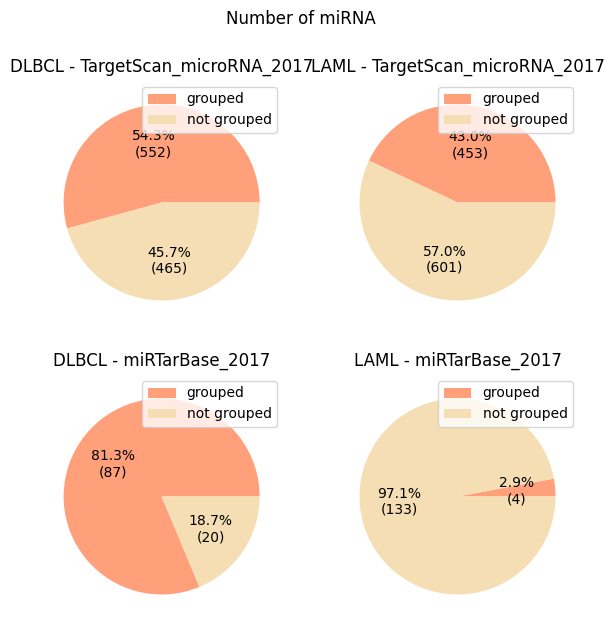

In [45]:
import matplotlib.pyplot as plt

# Helper to display percentage with value
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format
    
labels = ['grouped','not grouped']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 7))
fig.suptitle('Number of miRNA')

dlbc_tar_scan = [len(enrichr_mir_dlbc['grouped']['TargetScan_microRNA_2017']),len(enrichr_mir_dlbc['not grouped']['TargetScan_microRNA_2017'])]
laml_tar_scan = [len(enrichr_mir_laml['grouped']['TargetScan_microRNA_2017']),len(enrichr_mir_laml['not grouped']['TargetScan_microRNA_2017'])]
dlbc_mir_tar = [len(enrichr_mir_dlbc['grouped']['miRTarBase_2017']),len(enrichr_mir_dlbc['not grouped']['miRTarBase_2017'])]
laml_mir_tar = [len(enrichr_mir_laml['grouped']['miRTarBase_2017']),len(enrichr_mir_laml['not grouped']['miRTarBase_2017'])]

ax1.set_title('DLBCL - TargetScan_microRNA_2017')
ax1.pie(dlbc_tar_scan, autopct=autopct_format(dlbc_tar_scan), radius=1, colors=colors)
ax1.legend(labels=labels, loc="best")

ax2.set_title('LAML - TargetScan_microRNA_2017')
ax2.pie(laml_tar_scan, autopct=autopct_format(laml_tar_scan), radius=1, colors=colors)
ax2.legend(labels=labels, loc="best")

ax3.set_title('DLBCL - miRTarBase_2017')
ax3.pie(dlbc_mir_tar, autopct=autopct_format(dlbc_mir_tar), radius=1, colors=colors)
ax3.legend(labels=labels, loc="best")

ax4.set_title('LAML - miRTarBase_2017')
ax4.pie(laml_mir_tar, autopct=autopct_format(laml_mir_tar), radius=1, colors=colors)
ax4.legend(labels=labels, loc="best")

plt.show()

# GeneTrail2

https://genetrail.bioinf.uni-sb.de/help?topic=api not working  
https://github.com/unisb-bioinf/Graviton.py/blob/master/graviton/graviton.py

## Write identifier list for later upload

In [ ]:
# genes_str = '\n'.join(all_groups['-00'])
with open('example.txt', 'w') as f:
    print(genes_str, file=f)

## Doesn't work  
` 
ValueError: Unexpected server response from server: b'<html>\r\n<head><title>502 Bad Gateway</title></head>\r\n<body>\r\n<center><h1>502 Bad Gateway</h1></center>\r\n<hr><center>nginx/1.18.0 (Ubuntu)</center>\r\n</body>\r\n</html>\r\n'
`

In [ ]:
# pip install git+git://github.com/dstoeckel/Graviton.py.git 

In [ ]:
import json

# Load method definitions
from graviton import *
# Load assignment of samples into groups
from dataGroups import *

# Obtain a session
key = getSession()

# Upload the input data to the server
matrixId = uploadFile(key, 'mrnaAllSamples.tsv')

# Compute scores for the input data and the
# data groups using the shrinkage-t-test
# The first call will only create the job object
# on the server, but will not yet compute anything.
# setupScoring(key, 'independent-shrinkage-t-test',
#   file1 = matrixId,
#   sg = json.dumps(groups['sg']),
#   rg = json.dumps(groups['rg'])
# )

# Run the actual computation
scores = runJob(key)['scores']['id'];

# Create a list of categories for which we
# want to compute our enrichments
categories = [
  '9606-gene-go-biologicalprocess',
  '9606-gene-kegg-pathways',
  '9606-gene-reactome-pathways',
  '9606-gene-pfam-proteinfamilies',
]

# Create and run the job for the enrichment.
# We use the GSEA algorithm here.
setupEnrichment(key, 'gsea', scores, categories)
result = runJob(key)['enrichment']['id']

# Download and store the results
downloadResult(key, result, 'mrnaAllSamples.gsea.zip')

# Other tries in nlm

## Polynomial

In [ ]:
# gene_idx=7
# degree=2
# # X = np.array([prom_nlr.values[gene_idx,:],cnv_nlr.values[gene_idx,:],snv_nlr.values[gene_idx,:]]).T
# # y = expr_nlr.values[gene_idx,:]
# X = np.array([df_prom.values[gene_idx,:],df_cnv.values[gene_idx,:],df_snv.values[gene_idx,:]]).T
# y = df_expr.values[gene_idx,:]
# poly = PolynomialFeatures(degree, interaction_only=False)
# tmp_X = poly.fit_transform(X)
# print(poly.get_feature_names_out())
# model = sm.OLS(y,tmp_X)
# res = model.fit()
# print(res.summary())
# print(y)
# print(res.predict(tmp_X))

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LassoCV
# from sklearn.pipeline import make_pipeline

# nlr_params = []
# nlr_pvalues = []
# nlr_scores = []
# degree = 3


# for i in range(gene_count):
#         X = np.array([prom_nlr.values[i,:],cnv_nlr.values[i,:],snv_nlr.values[i,:]]).T
#         y = expr_nlr.values[i,:]

#         poly = PolynomialFeatures(degree, interaction_only=False) 
#         tmp_X = poly.fit_transform(X)
        
#         model = sm.OLS(y,tmp_X)
#         res = model.fit()

#         nlr_params.append(res.params[1:])
#         nlr_pvalues.append(res.pvalues[1:])
#         nlr_scores.append(res.rsquared)
        
#     # print(res.summary())
#     # print(res.pvalues)
    
# nlr_params = np.array(nlr_params)
# nlr_pvalues = np.array(nlr_pvalues)
# nlr_significant_params = np.where(nlr_pvalues < 0.05, nlr_params, 0)
# print(nlr_params[:5])
# print(nlr_pvalues[:5])
# print(nlr_scores[:5])
# print(nlr_significant_params[:5])

## SVR

In [ ]:
# from sklearn.svm import SVR
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import ShuffleSplit

# svr = SVR(kernel='rbf')
# svr.fit(X, y)
# y_pred = svr.predict(X)
# print(y_pred)
# print(y)
# print(svr.score(X,y))
# # print(svr.coef_);
# cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
# print(np.mean(cross_val_score(svr, X, y, cv=cv)))
# plt.scatter(X[:,0], y, color='darkorange', label='data')
# plt.scatter(X[:,0], y_pred, color='navy', lw=2, label='RBF model')